In [185]:
#!pip install tldextract

# DisInfo Project Analysis V1 201804
# (based on OpenWPM-scan of Haye list on 201804 & earlier lightbeam-scan by Hossein on 201803)
#%pylab inline --no-import-all 

import pandas as pd
import sqlite3
import seaborn as sns
from ggplot import ggplot, aes, geom_boxplot, ggtitle, labs
from numpy import nan
#from time import time
from glob import glob
#from datetime import datetime
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
from scipy import stats
#import scikit_posthocs as sp
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
#!pip install tldextract
from tldextract import extract as tldextract  # pip install tldextract
DPI = 120  # used for graphs. check at: http://www.infobyip.com/detectmonitordpi.php

In [2]:
#Function to remove the http, https of site_url_url
def strip_site_url(site_url):
    """Removes leading http:// or https:// and trailing '/'"""
    site_url = site_url.lower()
    if site_url.startswith('http'):
        site_url = site_url.replace('https://', '').replace('http://', '')
    if site_url.endswith('/'):
        site_url = site_url[:-1]
    return site_url

def strip_www(site_url):
    """Removes leading http:// or https:// and trailing '/'"""
    site_url = site_url.lower()
    if site_url.startswith('www'):
        site_url = site_url.replace('www.','').replace('www.','')
    if site_url.endswith('/'):
        site_url = site_url[:-1]
    return site_url

'''def strip_tld(tld):
    """Removes ac,co, edu, gov, nhs, gov '"""
    tld = tld.lower()
    if tld.startswith('ac','co','edu'):
        tld = tld.str.split('.').str[1]
    #if site_url.endswith('/'):
        #site_url = site_url[:-1]
    return tld'''
#Function to strip and extract the domains of site_url_url
def extract_domain(site_url):
    """Returns domain+tld from a full domain"""
    site_url = strip_site_url(site_url)  # just to be sure
    ext = tldextract(site_url)
    ret = ".".join([ss for ss in ext[-2:] if ss])
    # In case of gov.ie, or IPs, our 'ret' works better than 'ext.registered_domain'
    return ret

#Function to extract the domains of host
def extract_host(host):
    """Returns domain+tld from a full domain"""
    ext = tldextract(host)
    ret = ".".join([ss for ss in ext[-2:] if ss])
    return ret

#Function to extract the TLD of the website_urls
def extract_tld(site_url):
    """Returns domain+tld from a full domain"""
    site_url = strip_site_url(site_url)  # just to be sure
    ext = tldextract(site_url)
    ret = ".".join([ss for ss in ext[-1:] if ss])
    return ret



In [3]:
#Read successful crawls

#Connection to the SQLite Database US to create US_S(United States Success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-us.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
US_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled US site_urls',(US_S.site_url_url.count()))
success=US_S[US_S.bool_success==1].count()['bool_success']
print('success US', success)

#Connection to the SQLite Database NL and doing the query to create NL_S(Netherland Success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-nl.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
NL_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled NL site_urls',(NL_S.site_url_url.count()))
success=NL_S[NL_S.bool_success==1].count()['bool_success']
print('success NL', success)

#Connection to the SQLite Database DE and doing the query to create DE_S (Germany success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-de.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
DE_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)

print('crawled DE site_urls',(DE_S.site_url_url.count()))
success=DE_S[DE_S.bool_success==1].count()['bool_success']
print('success DE', success)


#Connection to the SQLite Database  BE and doing the query to create BE_S (Belgium success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-be.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
BE_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled BE site_urls',(BE_S.site_url_url.count()))
success=BE_S[BE_S.bool_success==1].count()['bool_success']
print('success BE', success)


#Connection to the SQLite Database  CA and doing the query to create CA_S (Canada success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-ca.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
CA_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled CA site_urls',(CA_S.site_url_url.count()))
success=CA_S[CA_S.bool_success==1].count()['bool_success']
print('success CA', success)


#Connection to the SQLite Database  CH and doing the query to create CH_S (Switzerland success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-ch.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
CH_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled CH site_urls',(CH_S.site_url_url.count()))
success=CH_S[CH_S.bool_success==1].count()['bool_success']
print('success CH', success)


#Connection to the SQLite Database  ES and doing the query to create ES_S (Spain success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-es.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
ES_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled ES site_urls',(ES_S.site_url_url.count()))
success=ES_S[ES_S.bool_success==1].count()['bool_success']
print('success ES', success)




#Connection to the SQLite Database  FR and doing the query to create FR_S (France success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-fr.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
FR_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled FR site_urls',(FR_S.site_url_url.count()))
success=FR_S[FR_S.bool_success==1].count()['bool_success']
print('success FR', success)



#Connection to the SQLite Database  IT and doing the query to create IT_S (Italy success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-it.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
IT_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled IT site_urls',(IT_S.site_url_url.count()))
success=IT_S[IT_S.bool_success==1].count()['bool_success']
print('success IT', success)



#Connection to the SQLite Database  PL and doing the query to create PL_S (Poland success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-pl.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
PL_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled PL site_urls',(PL_S.site_url_url.count()))
success=PL_S[PL_S.bool_success==1].count()['bool_success']
print('success PL', success)

#Connection to the SQLite Database  PT and doing the query to create PT_S (Poland success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-pt.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
PT_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled PT site_urls',(PT_S.site_url_url.count()))
success=PT_S[PT_S.bool_success==1].count()['bool_success']
print('success PT', success)



#Connection to the SQLite Database  RO and doing the query to create RO_S (Romania success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-ro.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
RO_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled RO site_urls',(RO_S.site_url_url.count()))
success=RO_S[RO_S.bool_success==1].count()['bool_success']
print('success RO', success)



#Connection to the SQLite Database  UK and doing the query to create UK_S (United Kingdom success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-uk.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
UK_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled UK site_urls',(UK_S.site_url_url.count()))
success=UK_S[UK_S.bool_success==1].count()['bool_success']
print('success UK', success)

#Connection to the SQLite Database  AT and doing the query to create AT_S (Poland success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-at.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
AT_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled AT site_urls',(AT_S.site_url_url.count()))
success=AT_S[AT_S.bool_success==1].count()['bool_success']
print('success AT', success)

#Connection to the SQLite Database CZ and doing the query to create CZ_S (Poland success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-cz.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
CZ_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled CZ site_urls',(CZ_S.site_url_url.count()))
success=CZ_S[CZ_S.bool_success==1].count()['bool_success']
print('success CZ', success)


#Connection to the SQLite Database  GR and doing the query to create GR_S (Poland success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-gr.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
GR_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled GR site_urls',(GR_S.site_url_url.count()))
success=GR_S[GR_S.bool_success==1].count()['bool_success']
print('success GR', success)


#Connection to the SQLite Database  HU and doing the query to create HU_S (Poland success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-hu.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
HU_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled HU site_urls',(HU_S.site_url_url.count()))
success=HU_S[HU_S.bool_success==1].count()['bool_success']
print('success HU', success)


#Connection to the SQLite Database  HU and doing the query to create HU_S (Poland success) data frame
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-se.sqlite')
#Query to get all website_urls and bool_success and add them in a dataframe 
SE_S=pd.read_sql_query("""SELECT site_url_url, bool_success 
                    FROM site_url_visits s 
                    LEFT JOIN CrawlHistory h ON
s.site_url_url=replace(replace(h.arguments, '[http://]http://', ''), '[https://]https://', '') AND command='GET'                     
""", con)
    
print('crawled SE site_urls',(SE_S.site_url_url.count()))
success=SE_S[SE_S.bool_success==1].count()['bool_success']
print('success SE', success)


crawled US sites 2271
success US 2005
crawled NL sites 2271
success NL 2020
crawled DE sites 2271
success DE 2018
crawled BE sites 2271
success BE 2025
crawled CA sites 2271
success CA 2011
crawled CH sites 2271
success CH 1989
crawled ES sites 2271
success ES 2031
crawled FR sites 2271
success FR 2025
crawled IT sites 2271
success IT 2043
crawled PL sites 2271
success PL 2012
crawled PT sites 2271
success PT 2026
crawled RO sites 2271
success RO 2015
crawled UK sites 2271
success UK 2015
crawled AT sites 2271
success AT 2022
crawled CZ sites 2271
success CZ 2022
crawled GR sites 2271
success GR 2019
crawled HU sites 2271
success HU 2004
crawled SE sites 2271
success SE 2017


In [5]:
#Comparing the success per vantage point

US_S.rename(columns={'bool_success':'bool_success_US'}, inplace=True)
NL_S.rename(columns={'site_url_url': 'site_url_NL', 'bool_success':'bool_success_NL'}, inplace=True)
DE_S.rename(columns={'site_url_url': 'site_url_DE', 'bool_success':'bool_success_DE'}, inplace=True)
BE_S.rename(columns={'site_url_url': 'site_url_BE', 'bool_success':'bool_success_BE'}, inplace=True)
CA_S.rename(columns={'site_url_url': 'site_url_CA', 'bool_success':'bool_success_CA'}, inplace=True)
CH_S.rename(columns={'site_url_url': 'site_url_CH', 'bool_success':'bool_success_CH'}, inplace=True)
ES_S.rename(columns={'site_url_url': 'site_url_ES', 'bool_success':'bool_success_ES'}, inplace=True)
FR_S.rename(columns={'site_url_url': 'site_url_FR', 'bool_success':'bool_success_FR'}, inplace=True)
IT_S.rename(columns={'site_url_url': 'site_url_IT', 'bool_success':'bool_success_IT'}, inplace=True)
PL_S.rename(columns={'site_url_url': 'site_url_PL', 'bool_success':'bool_success_PL'}, inplace=True)
PT_S.rename(columns={'site_url_url': 'site_url_PT', 'bool_success':'bool_success_PT'}, inplace=True)
RO_S.rename(columns={'site_url_url': 'site_url_RO', 'bool_success':'bool_success_RO'}, inplace=True)
UK_S.rename(columns={'site_url_url': 'site_url_UK', 'bool_success':'bool_success_UK'}, inplace=True)
AT_S.rename(columns={'site_url_url': 'site_url_AT', 'bool_success':'bool_success_AT'}, inplace=True)
CZ_S.rename(columns={'site_url_url': 'site_url_CZ', 'bool_success':'bool_success_CZ'}, inplace=True)
GR_S.rename(columns={'site_url_url': 'site_url_GR', 'bool_success':'bool_success_GR'}, inplace=True)
HU_S.rename(columns={'site_url_url': 'site_url_HU', 'bool_success':'bool_success_HU'}, inplace=True)
SE_S.rename(columns={'site_url_url': 'site_url_SE', 'bool_success':'bool_success_SE'}, inplace=True)

check_success = pd.concat([US_S, NL_S,DE_S,BE_S,CA_S,CH_S,ES_S,FR_S,IT_S,PL_S,PT_S,RO_S,UK_S,AT_S,CZ_S,GR_S,HU_S,SE_S], axis=1)
check_success.drop(['site_url_NL', 'site_url_DE','site_url_BE','site_url_CA','site_url_CH','site_url_ES','site_url_FR','site_url_IT','site_url_PL','site_url_PT','site_url_RO','site_url_UK','site_url_AT','site_url_CZ','site_url_GR','site_url_HU','site_url_SE' ], axis=1, inplace=True)

check_success

,site_url,bool_success_US,bool_success_NL,bool_success_DE,bool_success_BE,bool_success_CA,bool_success_CH,bool_success_ES,bool_success_FR,bool_success_IT,bool_success_PL,bool_success_PT,bool_success_RO,bool_success_UK,bool_success_AT,bool_success_CZ,bool_success_GR,bool_success_HU,bool_success_SE
0,http://geoip.hidemyass.com,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,http://univie.ac.at,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,http://kriesi.at,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,1,1
3,http://tuwien.ac.at,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,http://orf.at,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,http://google.at,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,http://derstandard.at,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,http://blogspot.co.at,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,http://uibk.ac.at,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,http://kurier.at,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### JS calls

In [6]:
# Load the measurement data / cookies - VP:US


#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-us.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_US=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)


js_calls_US['VP']='US'
js_calls_US.head()
js_calls_US.shape

#js_calls_US.to_csv('JSUS.csv', sep=',')

(802585, 4)

In [7]:
#DROP DUPLICATES JS US
js_calls_US_u=pd.DataFrame(data=js_calls_US.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_US_u.shape


(24864, 4)

In [8]:
# Load the measurement data / cookies - VP:NL
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-nl.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_NL=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)
js_calls_NL['VP']='NL'
js_calls_NL.head()
js_calls_NL.shape

(769467, 4)

In [9]:
#DROP DUPLICATES JS NL
js_calls_NL_u=pd.DataFrame(data=js_calls_NL.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_NL_u.shape

(23746, 4)

In [10]:
# Load the measurement data / cookies - VP: DE
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-de.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_DE=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_DE['VP']='DE'
js_calls_DE.head()
js_calls_DE.shape

(750056, 4)

In [11]:
#DROP DUPLICATES JS DE
js_calls_DE_u=pd.DataFrame(data=js_calls_DE.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_DE_u.shape

(23754, 4)

In [12]:
# Load the measurement data / cookies - BE
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-be.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_BE=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)
js_calls_BE['VP']='BE'
js_calls_BE.shape

(778363, 4)

In [13]:
#DROP DUPLICATES JS BE
js_calls_BE_u=pd.DataFrame(data=js_calls_BE.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_BE_u.shape

(23285, 4)

In [14]:
# Load the measurement data / cookies - VP: CA
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-ca.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_CA=pd.read_sql_query("""SELECT site_url_url , script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_CA['VP']='CA'
js_calls_CA.head()
js_calls_CA.shape

(857896, 4)

In [15]:
#DROP DUPLICATES JS CA
js_calls_CA_u=pd.DataFrame(data=js_calls_CA.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_CA_u.shape

(24315, 4)

In [16]:
# Load the measurement data / cookies - VP: CH
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-ch.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_CH=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_CH['VP']='CH'
js_calls_CH.head()
js_calls_CH.shape

(811185, 4)

In [17]:
#DROP DUPLICATES CH 
js_calls_CH_u=pd.DataFrame(data=js_calls_CH.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_CH_u.shape

(23969, 4)

In [18]:
# Load the measurement data / cookies - VP: ES
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-es.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_ES=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_ES['VP']='ES'
js_calls_ES.head()
js_calls_ES.shape

(830217, 4)

In [19]:
#DROP DUPLICATES JS ES
js_calls_ES_u=pd.DataFrame(data=js_calls_ES.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_ES_u.shape

(23989, 4)

In [20]:
# Load the measurement data / cookies - VP: FR
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-fr.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_FR=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_FR['VP']='FR'
js_calls_FR.head()
js_calls_FR.shape

(771000, 4)

In [21]:
#DROP DUPLICATES JS FR
js_calls_FR_u=pd.DataFrame(data=js_calls_FR.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_FR_u.groupby('site_url_url').count()
js_calls_FR_u.shape

(23800, 4)

In [22]:
# Load the measurement data / cookies - VP: IT
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-it.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_IT=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_IT['VP']='IT'
js_calls_IT.head()
js_calls_IT.shape

(768839, 4)

In [23]:
#DROP DUPLICATES JS IT
js_calls_IT_u=pd.DataFrame(data=js_calls_IT.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_IT_u.shape

(24368, 4)

In [24]:
# Load the measurement data / cookies - VP: PL
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-pl.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_PL=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_PL['VP']='PL'
js_calls_PL.head()
js_calls_PL.shape

(771566, 4)

In [25]:
#DROP DUPLICATES JS PL
js_calls_PL_u=pd.DataFrame(data=js_calls_PL.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_PL_u.shape

(23272, 4)

In [26]:
# Load the measurement data / cookies - VP: PT
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-pt.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_PT=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_PT['VP']='PT'
js_calls_PT.head()
js_calls_PT.shape

(768815, 4)

In [27]:
#DROP DUPLICATES JS PT
js_calls_PT_u=pd.DataFrame(data=js_calls_PT.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_PT_u.shape

(23603, 4)

In [28]:
# Load the measurement data / cookies - VP: RO
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-ro.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_RO=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_RO['VP']='RO'
js_calls_RO.shape


(820040, 4)

In [29]:
#DROP DUPLICATES JS RO
js_calls_RO_u=pd.DataFrame(data=js_calls_RO.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_RO_u.shape


(23554, 4)

In [30]:
# Load the measurement data / cookies - VP: UK
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-uk.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_UK=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_UK['VP']='UK'
js_calls_UK.head()
js_calls_UK.shape

(826704, 4)

In [31]:
#DROP DUPLICATES JS UK
js_calls_UK_u=pd.DataFrame(data=js_calls_UK.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_UK_u.shape
#js_calls_UK_u.dtypes

(24112, 4)

In [32]:
# Load the measurement data / cookies - VP: AT
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-at.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_AT=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_AT['VP']='AT'
js_calls_AT.head()
js_calls_AT.shape

(852757, 4)

In [33]:
#DROP DUPLICATES JS AT
js_calls_AT_u=pd.DataFrame(data=js_calls_AT.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_AT_u.shape
#js_calls_AT_u.dtypes

(23873, 4)

In [34]:
# Load the measurement data / cookies - VP: CZ
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-cz.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_CZ=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_CZ['VP']='CZ'
js_calls_CZ.head()
js_calls_CZ.shape

(780974, 4)

In [35]:
#DROP DUPLICATES JS CZ
js_calls_CZ_u=pd.DataFrame(data=js_calls_CZ.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_CZ_u.shape
#js_calls_CZ_u.dtypes

(24009, 4)

In [36]:
# Load the measurement data / cookies - VP: GR
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-gr.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_GR=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_GR['VP']='GR'
js_calls_GR.head()
js_calls_GR.shape

(784015, 4)

In [37]:
#DROP DUPLICATES JS GR
js_calls_GR_u=pd.DataFrame(data=js_calls_GR.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_GR_u.shape
#js_calls_GR_u.dtypes

(23386, 4)

In [38]:
# Load the measurement data / cookies - VP: HU
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-hu.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_HU=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_HU['VP']='HU'
js_calls_HU.head(20)
#js_calls_HU.shape

,site_url,js_url,jhost,VP
0,http://geoip.hidemyass.com,dummy file,dummy file,HU
1,http://geoip.hidemyass.com,dummy file,dummy file,HU
2,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,HU
3,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,HU
4,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,HU
5,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,HU
6,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,HU
7,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,HU
8,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,HU
9,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,HU


In [39]:
#DROP DUPLICATES JS HU
js_calls_HU_u=pd.DataFrame(data=js_calls_HU.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_HU_u.shape
#js_calls_HU_u.dtypes

(23679, 4)

In [40]:
# Load the measurement data / cookies - VP: SE
#Connect to SQLite Database
con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-se.sqlite')
#Query to get all cookies and add them in a dataframe
js_calls_SE=pd.read_sql_query("""SELECT site_url_url, script_url as js_url, script_url as jhost
                                FROM site_url_visits s LEFT JOIN javascript j
                                ON s.visit_id=j.visit_id 
                                WHERE script_url is not null
                                ORDER BY s.visit_id""", con)

js_calls_SE['VP']='SE'
js_calls_SE.head(20)
#js_calls_SE.shape

,site_url,js_url,jhost,VP
0,http://geoip.hidemyass.com,dummy file,dummy file,SE
1,http://geoip.hidemyass.com,dummy file,dummy file,SE
2,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,SE
3,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,SE
4,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,SE
5,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,SE
6,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,SE
7,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,SE
8,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,SE
9,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,SE


In [41]:
#DROP DUPLICATES JS SE
js_calls_SE_u=pd.DataFrame(data=js_calls_SE.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
js_calls_SE_u.shape
#js_calls_SE_u.dtypes

(23169, 4)

###  Checking false -1 and 0

In [42]:
#Check if bool_success_US =1 did get cookie data 
check_success_US = pd.merge(js_calls_US_u,US_S, on='site_url_url')
#print(check_success_US.head())
print(check_success_US.groupby('bool_success_US').count().reset_index())

check_success_US['jhost'].replace('None', np.nan, inplace=True)
check_success_US.loc[check_success_US['jhost'].isnull(), 'jhost'] = 'nd'
check_success_US.tail(300)
c_s_us=check_success_US[(check_success_US.jhost=='nd')&(check_success_US.bool_success_US==1)].reset_index()
#print(c_s_us)
#c_s_us.shape
#c_s_us.to_csv('false_positives_us.csv', sep=',')

#Checking if -1 get data or not get data (From 1 data points with -1, 1 did not get data)
u_t=check_success_US[(check_success_US.bool_success_US==-1)] 
print(u_t.head())
print(u_t.groupby('site_url_url').count().reset_index())
u=check_success_US[(check_success_US.jhost=='nd')&(check_success_US.bool_success_US==-1)].reset_index()
#print(u)

#u.shape


#Check if unsuccesful = '0' did not get cookie data
#check_success_US[(check_success_US.jhost=='nd')&(check_success_US.bool_success_US==0)].reset_index()



   bool_success_US  site_url  js_url  jhost     VP
0               -1       539     539    539    539
1                1     24325   24325  24325  24325
                   site_url  \
1269  http://ninemsn.com.au   
1270  http://ninemsn.com.au   
1271  http://ninemsn.com.au   
1272  http://ninemsn.com.au   
1273  http://ninemsn.com.au   

                                                 js_url  \
1269  http://assets.adobedtm.com/582ec2d75884b3f05e4...   
1270  http://cdn-gl.imrworldwide.com/conf/config250....   
1271  http://cdn-gl.imrworldwide.com/novms/html/ls.html   
1272  http://cdn-gl.imrworldwide.com/novms/js/2/nlsS...   
1273  http://fast.nd.demdex.net/dest5.html?d_nsid=0#...   

                                                  jhost  VP  bool_success_US  
1269  http://assets.adobedtm.com/582ec2d75884b3f05e4...  US               -1  
1270  http://cdn-gl.imrworldwide.com/conf/config250....  US               -1  
1271  http://cdn-gl.imrworldwide.com/novms/html/ls.html  US         

In [43]:
#Check if bool_success_NL =1 did get data 
NL_S.rename(columns={'site_url_NL': 'site_url_url'}, inplace=True)
check_success_NL = pd.merge(js_calls_NL_u,NL_S, on='site_url_url')
#check_success_NL.head()
print(check_success_NL.groupby('bool_success_NL').count().reset_index())
check_success_NL['jhost'].replace('None', np.nan, inplace=True)
check_success_NL.loc[check_success_NL['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_NL.tail(300)
c_s_nl=check_success_NL[(check_success_NL.jhost=='nd')&(check_success_NL.bool_success_NL==1)].reset_index()
print(c_s_nl)
#c_s_nl.to_csv('false_positives_nl.csv', sep=',')


#Checking if -1 get data or not get data (From 15 data points with -1, 8 did not get data, the rest does get data)
n_t=check_success_NL[(check_success_NL.bool_success_NL==-1)] 
print(n_t.groupby('site_url_url').count().reset_index())
n=check_success_NL[(check_success_NL.jhost=='nd')&(check_success_NL.bool_success_NL==-1)].reset_index()
print(n)


#Check if unsuccesful = '0' did not get cookie data
check_success_NL[(check_success_NL.jhost=='nd')&(check_success_NL.bool_success_NL==0)].reset_index()

   bool_success_NL  site_url  js_url  jhost     VP
0               -1       903     903    903    903
1                1     22843   22843  22843  22843
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_NL]
Index: []
                              site_url  js_url  jhost  VP  bool_success_NL
0              http://blog.livedoor.jp       9      9   9                9
1                 http://bloomberg.com      39     39  39               39
2                     http://brocku.ca       2      2   2                2
3                 http://challenges.fr      37     37  37               37
4              http://club-internet.fr      37     37  37               37
5                      http://cnet.com      57     57  57               57
6             http://dailyrecord.co.uk      64     64  64               64
7                 http://express.co.uk      42     42  42               42
8                        http://iol.pt      36     36  36               36
9       

,index,site_url,js_url,jhost,VP,bool_success_NL


In [44]:
#Check if bool_success_DE =1 did get data 
DE_S.rename(columns={'site_url_DE': 'site_url_url'}, inplace=True)
check_success_DE = pd.merge(js_calls_DE_u,DE_S, on='site_url_url')
#check_success_DE.head()
print(check_success_DE.groupby('bool_success_DE').count().reset_index())
check_success_DE['jhost'].replace('None', np.nan, inplace=True)
check_success_DE.loc[check_success_DE['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_DE.tail(300)
c_s_de=check_success_DE[(check_success_DE.jhost=='nd')&(check_success_DE.bool_success_DE==1)].reset_index() 
print(c_s_de)
#c_s_de.to_csv('false_positives_de.csv', sep=',')


#Checking if -1 get data or not get data (From 24 data points with -1, 8 did not get data, the rest does get data)
d_t=check_success_DE[(check_success_DE.bool_success_DE==-1)] 
print(d_t.groupby('site_url_url').count().reset_index())
d=check_success_DE[(check_success_DE.jhost=='nd')&(check_success_DE.bool_success_DE==-1)].reset_index()
print(d)
d.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_DE[(check_success_DE.jhost=='nd')&(check_success_DE.bool_success_DE==0)].reset_index()

   bool_success_DE  site_url  js_url  jhost     VP
0               -1       976     976    976    976
1                0         6       6      6      6
2                1     22772   22772  22772  22772
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_DE]
Index: []
                              site_url  js_url  jhost   VP  bool_success_DE
0                       http://163.com      23     23   23               23
1                  http://alternet.org     128    128  128              128
2              http://blog.livedoor.jp       9      9    9                9
3              http://club-internet.fr      25     25   25               25
4                http://craigslist.org       1      1    1                1
5                  http://diabetes.org      23     23   23               23
6                    http://freenet.de      40     40   40               40
7                 http://globalnews.ca      28     28   28               28
8                   htt

,index,site_url,js_url,jhost,VP,bool_success_DE


In [45]:
#Check if bool_success_BE =1 did get data 
BE_S.rename(columns={'site_url_BE': 'site_url_url'}, inplace=True)
check_success_BE = pd.merge(js_calls_BE_u,BE_S, on='site_url_url')
#check_success_BE.head()
print(check_success_BE.groupby('bool_success_BE').count().reset_index())
check_success_BE['jhost'].replace('None', np.nan, inplace=True)
check_success_BE.loc[check_success_BE['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_BE.tail(300)
c_s_be=check_success_BE[(check_success_BE.jhost=='nd')&(check_success_BE.bool_success_BE==1)].reset_index() 
print(c_s_be)
#c_s_be.to_csv('false_positives_be.csv', sep=',')


#Checking if -1 get data or not get data 
b_t=check_success_BE[(check_success_BE.bool_success_BE==-1)] 
print(b_t.groupby('site_url_url').count().reset_index())
b=check_success_BE[(check_success_BE.jhost=='nd')&(check_success_BE.bool_success_BE==-1)].reset_index()
print(b.head())
#b.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_BE[(check_success_BE.jhost=='nd')&(check_success_BE.bool_success_BE==0)].reset_index()

   bool_success_BE  site_url  js_url  jhost     VP
0               -1       832     832    832    832
1                1     22453   22453  22453  22453
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_BE]
Index: []
                              site_url  js_url  jhost  VP  bool_success_BE
0                    http://antena3.ro      36     36  36               36
1              http://blog.livedoor.jp       9      9   9                9
2              http://club-internet.fr      24     24  24               24
3                      http://cnet.com      47     47  47               47
4                http://craigslist.org       1      1   1                1
5                  http://cyberduck.ch      10     10  10               10
6                         http://dn.pt      45     45  45               45
7                 http://express.co.uk      45     45  45               45
8                   http://fortune.com      16     16  16               16
9       

,index,site_url,js_url,jhost,VP,bool_success_BE


In [46]:
#Check if bool_success_CA =1 did get data 
CA_S.rename(columns={'site_url_CA': 'site_url_url'}, inplace=True)
check_success_CA = pd.merge(js_calls_CA_u,CA_S, on='site_url_url')
#check_success_CA.head()
print(check_success_CA.groupby('bool_success_CA').count().reset_index())
check_success_CA['jhost'].replace('None', np.nan, inplace=True)
check_success_CA.loc[check_success_CA['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_CA.tail(300)
c_s_ca=check_success_CA[(check_success_CA.jhost=='nd')&(check_success_CA.bool_success_CA==1)].reset_index() 
print(c_s_ca)
#c_s_ca.to_csv('false_positives_ca.csv', sep=',')


#Checking if -1 get data or not get data 
c_t=check_success_CA[(check_success_CA.bool_success_CA==-1)] 
print(c_t.groupby('site_url_url').count().reset_index())
c=check_success_CA[(check_success_CA.jhost=='nd')&(check_success_CA.bool_success_CA==-1)].reset_index()
print(c.head())
c.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_CA[(check_success_CA.jhost=='nd')&(check_success_CA.bool_success_CA==0)].reset_index()

   bool_success_CA  site_url  js_url  jhost     VP
0               -1      1164    1164   1164   1164
1                1     23151   23151  23151  23151
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_CA]
Index: []
                        site_url  js_url  jhost  VP  bool_success_CA
0              http://bestbuy.ca      18     18  18               18
1        http://blog.livedoor.jp       9      9   9                9
2           http://bloomberg.com      33     33  33               33
3              http://centrum.cz      24     24  24               24
4      http://chicagotribune.com      34     34  34               34
5             http://cmjornal.pt      61     61  61               61
6                http://cnet.com      49     49  49               49
7                 http://cnn.com      52     52  52               52
8          http://craigslist.org       1      1   1                1
9         http://dailymail.co.uk      25     25  25               25

,index,site_url,js_url,jhost,VP,bool_success_CA


In [47]:
#Check if bool_success_CH =1 did get data 
CH_S.rename(columns={'site_url_CH': 'site_url_url'}, inplace=True)
check_success_CH = pd.merge(js_calls_CH_u,CH_S, on='site_url_url')
#check_success_CH.head()
print(check_success_CH.groupby('bool_success_CH').count().reset_index())
check_success_CH['jhost'].replace('None', np.nan, inplace=True)
check_success_CH.loc[check_success_CH['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_CH.tail(300)
c_s_ch=check_success_CH[(check_success_CH.jhost=='nd')&(check_success_CH.bool_success_CH==1)].reset_index() 
print(c_s_ch)
#c_s_ch.to_csv('false_positives_ch.csv', sep=',')


#Checking if -1 get data or not get data 
ch_t=check_success_CH[(check_success_CH.bool_success_CH==-1)] 
print(ch_t.groupby('site_url_url').count().reset_index())
ch=check_success_CH[(check_success_CH.jhost=='nd')&(check_success_CH.bool_success_CH==-1)].reset_index()
print(ch.head())
ch.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_CH[(check_success_CH.jhost=='nd')&(check_success_CH.bool_success_CH==0)].reset_index()

   bool_success_CH  site_url  js_url  jhost     VP
0               -1      1479    1479   1479   1479
1                1     22490   22490  22490  22490
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_CH]
Index: []
                              site_url  js_url  jhost  VP  bool_success_CH
0            http://adelaidenow.com.au      42     42  42               42
1                       http://aol.com      27     27  27               27
2              http://blog.livedoor.jp       9      9   9                9
3                 http://bloomberg.com      28     28  28               28
4           http://businessinsider.com      34     34  34               34
5                    http://cancer.org      20     20  20               20
6                   http://cmjornal.pt      48     48  48               48
7             http://dailyrecord.co.uk      65     65  65               65
8               http://dailystar.co.uk      28     28  28               28
9       

,index,site_url,js_url,jhost,VP,bool_success_CH


In [48]:
#Check if bool_success_ES =1 did get data 
ES_S.rename(columns={'site_url_ES': 'site_url_url'}, inplace=True)
check_success_ES = pd.merge(js_calls_ES_u,ES_S, on='site_url_url')
#check_success_ES.head()
print(check_success_ES.groupby('bool_success_ES').count().reset_index())
check_success_ES['jhost'].replace('None', np.nan, inplace=True)
check_success_ES.loc[check_success_ES['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_ES.tail(300)
c_s_es=check_success_ES[(check_success_ES.jhost=='nd')&(check_success_ES.bool_success_ES==1)].reset_index() 
print(c_s_es)
#c_s_es.to_csv('false_positives_es.csv', sep=',')


#Checking if -1 get data or not get data 
es_t=check_success_ES[(check_success_ES.bool_success_ES==-1)] 
es_t.groupby('site_url_url').count().reset_index()
es=check_success_ES[(check_success_ES.jhost=='nd')&(check_success_ES.bool_success_ES==-1)].reset_index()
print(es.head())
es.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_ES[(check_success_ES.jhost=='nd')&(check_success_ES.bool_success_ES==0)].reset_index()

   bool_success_ES  site_url  js_url  jhost     VP
0               -1       683     683    683    683
1                1     23306   23306  23306  23306
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_ES]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_ES]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_ES


In [49]:
#Check if bool_success_FR=1 did get data 
FR_S.rename(columns={'site_url_FR': 'site_url_url'}, inplace=True)
check_success_FR = pd.merge(js_calls_FR_u,FR_S, on='site_url_url')
#check_success_FR.head()
print(check_success_FR.groupby('bool_success_FR').count().reset_index())
check_success_FR['jhost'].replace('None', np.nan, inplace=True)
check_success_FR.loc[check_success_FR['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_FR.tail(300)
c_s_fr=check_success_FR[(check_success_FR.jhost=='nd')&(check_success_FR.bool_success_FR==1)].reset_index() 
print(c_s_fr)
#c_s_fr.to_csv('false_positives_fr.csv', sep=',')


#Checking if -1 get data or not get data 
fr_t=check_success_FR[(check_success_FR.bool_success_FR==-1)]
fr_t.groupby('site_url_url').count().reset_index()
fr=check_success_FR[(check_success_FR.jhost=='nd')&(check_success_FR.bool_success_FR==-1)].reset_index()
print(fr)
#fr.shape


#Check if unsuccesful = '0' did not get cookie data
#check_success_FR[(check_success_FR.jhost=='nd')&(check_success_FR.bool_success_FR==0)].reset_index()

   bool_success_FR  site_url  js_url  jhost     VP
0               -1       794     794    794    794
1                1     23006   23006  23006  23006
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_FR]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_FR]
Index: []


In [50]:
#Check if bool_success_IT=1 did get data 
IT_S.rename(columns={'site_url_IT': 'site_url_url'}, inplace=True)
check_success_IT = pd.merge(js_calls_IT_u,IT_S, on='site_url_url')
#check_success_IT.head()
print(check_success_IT.groupby('bool_success_IT').count().reset_index())
check_success_IT['jhost'].replace('None', np.nan, inplace=True)
check_success_IT.loc[check_success_IT['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_IT.tail(300)
c_s_it=check_success_IT[(check_success_IT.jhost=='nd')&(check_success_IT.bool_success_IT==1)].reset_index() 
print(c_s_it)
#c_s_it.to_csv('false_positives_it.csv', sep=',')


#Checking if -1 get data or not get data 
it_t=check_success_IT[(check_success_IT.bool_success_IT==-1)]
it_t.groupby('site_url_url').count().reset_index()
it=check_success_IT[(check_success_IT.jhost=='nd')&(check_success_IT.bool_success_IT==-1)].reset_index()
print(it)
#it.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_IT[(check_success_IT.jhost=='nd')&(check_success_IT.bool_success_IT==0)].reset_index()

   bool_success_IT  site_url  js_url  jhost     VP
0               -1       226     226    226    226
1                1     24142   24142  24142  24142
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_IT]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_IT]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_IT


In [51]:
#Check if bool_success_PL=1 did get data 
PL_S.rename(columns={'site_url_PL': 'site_url_url'}, inplace=True)
check_success_PL= pd.merge(js_calls_PL_u,PL_S, on='site_url_url')
print(check_success_PL.groupby('bool_success_PL').count().reset_index())
#check_success_PL.head()
check_success_PL['jhost'].replace('None', np.nan, inplace=True)
check_success_PL.loc[check_success_PL['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_PL.tail(300)
c_s_pl=check_success_PL[(check_success_PL.jhost=='nd')&(check_success_PL.bool_success_PL==1)].reset_index() 
print(c_s_pl)
#c_s_pl.to_csv('false_positives_pl.csv', sep=',')


#Checking if -1 get data or not get data 
pl_t=check_success_PL[(check_success_PL.bool_success_PL==-1)]
pl_t.groupby('site_url_url').count().reset_index()
pl=check_success_PL[(check_success_PL.jhost=='nd')&(check_success_PL.bool_success_PL==-1)].reset_index()
print(pl)
#pl.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_PL[(check_success_PL.jhost=='nd')&(check_success_PL.bool_success_PL==0)].reset_index()

   bool_success_PL  site_url  js_url  jhost     VP
0               -1       865     865    865    865
1                0         7       7      7      7
2                1     22400   22400  22400  22400
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_PL]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_PL]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_PL


In [52]:
#Check if bool_success_PT=1 did get data 
PT_S.rename(columns={'site_url_PT': 'site_url_url'}, inplace=True)
check_success_PT= pd.merge(js_calls_PT_u,PT_S, on='site_url_url')
#check_success_PT.head()
print(check_success_PT.groupby('bool_success_PT').count().reset_index())
check_success_PT['jhost'].replace('None', np.nan, inplace=True)
check_success_PT.loc[check_success_PT['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_PT.tail(300)
c_s_pt=check_success_PT[(check_success_PT.jhost=='nd')&(check_success_PT.bool_success_PT==1)].reset_index() 
print(c_s_pt)
#c_s_pt.to_csv('false_positives_pt.csv', sep=',')


#Checking if -1 get data or not get data 
pt_t=check_success_PT[(check_success_PT.bool_success_PT==-1)]
pt_t.groupby('site_url_url').count().reset_index()
pt=check_success_PT[(check_success_PT.jhost=='nd')&(check_success_PT.bool_success_PT==-1)].reset_index()
print(pt)
#pt.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_PT[(check_success_PT.jhost=='nd')&(check_success_PT.bool_success_PT==0)].reset_index()

   bool_success_PT  site_url  js_url  jhost     VP
0               -1       777     777    777    777
1                1     22826   22826  22826  22826
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_PT]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_PT]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_PT


In [53]:
#Check if bool_success_RO=1 did get data 
RO_S.rename(columns={'site_url_RO': 'site_url_url'}, inplace=True)
check_success_RO= pd.merge(js_calls_RO_u,RO_S, on='site_url_url')
#check_success_RO.head()
print(check_success_RO.groupby('bool_success_RO').count().reset_index())
check_success_RO['jhost'].replace('None', np.nan, inplace=True)
check_success_RO.loc[check_success_RO['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_RO.tail(300)
c_s_ro=check_success_RO[(check_success_RO.jhost=='nd')&(check_success_RO.bool_success_RO==1)].reset_index() 
print(c_s_ro)
#c_s_ro.to_csv('false_positivesrol.csv', sep=',')


#Checking if -1 get data or not get data 
ro_t=check_success_RO[(check_success_RO.bool_success_RO==-1)]
ro_t.groupby('site_url_url').count().reset_index()
ro=check_success_RO[(check_success_RO.jhost=='nd')&(check_success_RO.bool_success_RO==-1)].reset_index()
print(ro)
#ro.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_RO[(check_success_RO.jhost=='nd')&(check_success_RO.bool_success_RO==0)].reset_index()

   bool_success_RO  site_url  js_url  jhost     VP
0               -1       973     973    973    973
1                1     22581   22581  22581  22581
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_RO]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_RO]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_RO


In [54]:
#Check if bool_success_UK=1 did get data 
UK_S.rename(columns={'site_url_UK': 'site_url_url'}, inplace=True)
check_success_UK= pd.merge(js_calls_UK_u,UK_S, on='site_url_url')
#check_success_UK.head()
print(check_success_UK.groupby('bool_success_UK').count().reset_index())
check_success_UK['jhost'].replace('None', np.nan, inplace=True)
check_success_UK.loc[check_success_UK['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_UK.tail(300)
c_s_uk=check_success_UK[(check_success_UK.jhost=='nd')&(check_success_UK.bool_success_UK==1)].reset_index() 
print(c_s_uk)
#c_s_uk.to_csv('false_positives_uk.csv', sep=',')


#Checking if -1 get data or not get data 
uk_t=check_success_UK[(check_success_UK.bool_success_UK==-1)]
uk_t.groupby('site_url_url').count().reset_index()
uk=check_success_UK[(check_success_UK.jhost=='nd')&(check_success_UK.bool_success_UK==-1)].reset_index()
print(uk)
#uk.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_UK[(check_success_UK.jhost=='nd')&(check_success_UK.bool_success_UK==0)].reset_index()

   bool_success_UK  site_url  js_url  jhost     VP
0               -1      1125    1125   1125   1125
1                1     22987   22987  22987  22987
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_UK]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_UK]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_UK


In [55]:
#Check if bool_success_AT=1 did get data 
AT_S.rename(columns={'site_url_AT': 'site_url_url'}, inplace=True)
check_success_AT= pd.merge(js_calls_AT_u,AT_S, on='site_url_url')
#check_success_AT.head()
print(check_success_AT.groupby('bool_success_AT').count().reset_index())
check_success_AT['jhost'].replace('None', np.nan, inplace=True)
check_success_AT.loc[check_success_AT['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_AT.tail(300)
c_s_at=check_success_AT[(check_success_AT.jhost=='nd')&(check_success_AT.bool_success_AT==1)].reset_index() 
print(c_s_at)
#c_s_at.to_csv('false_positives_AT.csv', sep=',')


#Checking if -1 get data or not get data 
at_t=check_success_AT[(check_success_AT.bool_success_AT==-1)]
at_t.groupby('site_url_url').count().reset_index()
at=check_success_AT[(check_success_AT.jhost=='nd')&(check_success_AT.bool_success_AT==-1)].reset_index()
print(at)
#at.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_AT[(check_success_AT.jhost=='nd')&(check_success_AT.bool_success_AT==0)].reset_index()

   bool_success_AT  site_url  js_url  jhost     VP
0               -1       845     845    845    845
1                1     23028   23028  23028  23028
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_AT]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_AT]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_AT


In [56]:
#Check if bool_success_CZ=1 did get data 
CZ_S.rename(columns={'site_url_CZ': 'site_url_url'}, inplace=True)
check_success_CZ= pd.merge(js_calls_CZ_u,CZ_S, on='site_url_url')
print(check_success_CZ.groupby('bool_success_CZ').count().reset_index())
#check_success_CZ.head()
check_success_CZ['jhost'].replace('None', np.nan, inplace=True)
check_success_CZ.loc[check_success_CZ['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_CZ.tail(300)
c_s_cz=check_success_CZ[(check_success_CZ.jhost=='nd')&(check_success_CZ.bool_success_CZ==1)].reset_index() 
print(c_s_cz)
#c_s_cz.to_csv('false_positives_cz.csv', sep=',')


#Checking if -1 get data or not get data 
cz_t=check_success_CZ[(check_success_CZ.bool_success_CZ==-1)]
cz_t.groupby('site_url_url').count().reset_index()
cz=check_success_CZ[(check_success_CZ.jhost=='nd')&(check_success_CZ.bool_success_CZ==-1)].reset_index()
print(cz)
#cz.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_CZ[(check_success_CZ.jhost=='nd')&(check_success_CZ.bool_success_CZ==0)].reset_index()

   bool_success_CZ  site_url  js_url  jhost     VP
0               -1      1125    1125   1125   1125
1                1     22884   22884  22884  22884
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_CZ]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_CZ]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_CZ


In [57]:
#Check if bool_success_GR=1 did get data 
GR_S.rename(columns={'site_url_GR': 'site_url_url'}, inplace=True)
check_success_GR= pd.merge(js_calls_GR_u,GR_S, on='site_url_url')
#check_success_GR.head()
print(check_success_GR.groupby('bool_success_GR').count().reset_index())
check_success_GR['jhost'].replace('None', np.nan, inplace=True)
check_success_GR.loc[check_success_GR['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_GR.tail(300)
c_s_gr=check_success_GR[(check_success_GR.jhost=='nd')&(check_success_GR.bool_success_GR==1)].reset_index() 
print(c_s_gr)
#c_s_gr.to_csv('false_positives_gr.csv', sep=',')


#Checking if -1 get data or not get data 
gr_t=check_success_GR[(check_success_GR.bool_success_GR==-1)]
gr_t.groupby('site_url_url').count().reset_index()
gr=check_success_GR[(check_success_GR.jhost=='nd')&(check_success_GR.bool_success_GR==-1)].reset_index()
print(gr)
#gr.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_GR[(check_success_GR.jhost=='nd')&(check_success_GR.bool_success_GR==0)].reset_index()

   bool_success_GR  site_url  js_url  jhost     VP
0               -1      1269    1269   1269   1269
1                1     22117   22117  22117  22117
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_GR]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_GR]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_GR


In [58]:
#Check if bool_success_HU=1 did get data 
HU_S.rename(columns={'site_url_HU': 'site_url_url'}, inplace=True)
check_success_HU= pd.merge(js_calls_HU_u,HU_S, on='site_url_url')
#check_success_HU.head()
print(check_success_HU.groupby('bool_success_HU').count().reset_index())
check_success_HU['jhost'].replace('None', np.nan, inplace=True)
check_success_HU.loc[check_success_HU['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_HU.tail(300)
c_s_hu=check_success_HU[(check_success_HU.jhost=='nd')&(check_success_HU.bool_success_HU==1)].reset_index() 
print(c_s_hu)
#c_s_hu.to_csv('false_positives_hu.csv', sep=',')


#Checking if -1 get data or not get data 
hu_t=check_success_HU[(check_success_HU.bool_success_HU==-1)]
hu_t.groupby('site_url_url').count().reset_index()
hu=check_success_HU[(check_success_HU.jhost=='nd')&(check_success_HU.bool_success_HU==-1)].reset_index()
print(hu)
#hu.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_HU[(check_success_HU.jhost=='nd')&(check_success_HU.bool_success_HU==0)].reset_index()

   bool_success_HU  site_url  js_url  jhost     VP
0               -1      1272    1272   1272   1272
1                1     22407   22407  22407  22407
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_HU]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_HU]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_HU


In [59]:
#Check if bool_success_SE=1 did get data 
SE_S.rename(columns={'site_url_SE': 'site_url_url'}, inplace=True)
check_success_SE= pd.merge(js_calls_SE_u,SE_S, on='site_url_url')
#check_success_SE.head()
print(check_success_SE.groupby('bool_success_SE').count().reset_index())
check_success_SE['jhost'].replace('None', np.nan, inplace=True)
check_success_SE.loc[check_success_SE['jhost'].isnull(), 'jhost'] = 'nd'
#check_success_SE.tail(300)
c_s_se=check_success_SE[(check_success_SE.jhost=='nd')&(check_success_SE.bool_success_SE==1)].reset_index() 
print(c_s_se)
#c_s_se.to_csv('false_positives_se.csv', sep=',')


#Checking if -1 get data or not get data 
se_t=check_success_SE[(check_success_SE.bool_success_SE==-1)]
se_t.groupby('site_url_url').count().reset_index()
se=check_success_SE[(check_success_SE.jhost=='nd')&(check_success_SE.bool_success_SE==-1)].reset_index()
print(se)
#se.shape


#Check if unsuccesful = '0' did not get cookie data
check_success_SE[(check_success_SE.jhost=='nd')&(check_success_SE.bool_success_SE==0)].reset_index()

   bool_success_SE  site_url  js_url  jhost     VP
0               -1       736     736    736    736
1                1     22433   22433  22433  22433
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_SE]
Index: []
Empty DataFrame
Columns: [index, site_url, js_url, jhost, VP, bool_success_SE]
Index: []


,index,site_url,js_url,jhost,VP,bool_success_SE


### Eliminating -1 and 0 from data

In [60]:
check_success_US=check_success_US.loc[(check_success_US['bool_success_US']!= -1)&(check_success_US['bool_success_US']!= 0)]
#check_success_US.groupby('site_url_url').count()
check_success_NL=check_success_NL.loc[(check_success_NL['bool_success_NL']!= -1)&(check_success_NL['bool_success_NL']!= 0)]
check_success_BE=check_success_BE.loc[(check_success_BE['bool_success_BE']!= -1)&(check_success_BE['bool_success_BE']!= 0)]
check_success_DE=check_success_DE.loc[(check_success_DE['bool_success_DE']!= -1)&(check_success_DE['bool_success_DE']!= 0)]
check_success_CA=check_success_CA.loc[(check_success_CA['bool_success_CA']!= -1)&(check_success_CA['bool_success_CA']!= 0)]
check_success_CH=check_success_CH.loc[(check_success_CH['bool_success_CH']!= -1)&(check_success_CH['bool_success_CH']!= 0)]
check_success_ES=check_success_ES.loc[(check_success_ES['bool_success_ES']!= -1)&(check_success_ES['bool_success_ES']!= 0)]
check_success_FR=check_success_FR.loc[(check_success_FR['bool_success_FR']!= -1)&(check_success_FR['bool_success_FR']!= 0)]
check_success_IT=check_success_IT.loc[(check_success_IT['bool_success_IT']!= -1)&(check_success_IT['bool_success_IT']!= 0)]
check_success_PL=check_success_PL.loc[(check_success_PL['bool_success_PL']!= -1)&(check_success_PL['bool_success_PL']!= 0)]
check_success_PT=check_success_PT.loc[(check_success_PT['bool_success_PT']!= -1)&(check_success_PT['bool_success_PT']!= 0)]
check_success_RO=check_success_RO.loc[(check_success_RO['bool_success_RO']!= -1)&(check_success_RO['bool_success_RO']!= 0)]
check_success_UK=check_success_UK.loc[(check_success_UK['bool_success_UK']!= -1)&(check_success_UK['bool_success_UK']!= 0)]
check_success_CZ=check_success_CZ.loc[(check_success_CZ['bool_success_CZ']!= -1)&(check_success_CZ['bool_success_CZ']!= 0)]
check_success_AT=check_success_AT.loc[(check_success_AT['bool_success_AT']!= -1)&(check_success_AT['bool_success_AT']!= 0)]
check_success_HU=check_success_HU.loc[(check_success_HU['bool_success_HU']!= -1)&(check_success_HU['bool_success_HU']!= 0)]
check_success_GR=check_success_GR.loc[(check_success_GR['bool_success_GR']!= -1)&(check_success_GR['bool_success_GR']!= 0)]
check_success_SE=check_success_SE.loc[(check_success_SE['bool_success_SE']!= -1)&(check_success_SE['bool_success_SE']!= 0)]


In [ ]:
# js_whole_crawl= pd.concat([check_success_US, check_success_NL,check_success_BE,check_success_DE,check_success_CA,check_success_CH, check_success_ES, check_success_FR, check_success_IT,check_success_PL,check_success_PT,check_success_RO,check_success_UK,check_success_AT,check_success_CZ,check_success_GR,check_success_HU,check_success_SE]).sort_values('site_url_url')
# js_whole_crawl.shape


In [61]:
##check after droping -1
check_success_US.head()

,site_url,js_url,jhost,VP,bool_success_US
0,http://geoip.hidemyass.com,dummy file,dummy file,US,1
1,http://geoip.hidemyass.com,https://assets.zendesk.com/embeddable_framewor...,https://assets.zendesk.com/embeddable_framewor...,US,1
2,http://geoip.hidemyass.com,https://bat.bing.com/bat.js,https://bat.bing.com/bat.js,US,1
3,http://geoip.hidemyass.com,https://script.hotjar.com/modules-52e14885345b...,https://script.hotjar.com/modules-52e14885345b...,US,1
4,http://geoip.hidemyass.com,https://static2.hidemyass.com/20180525/web/j/g...,https://static2.hidemyass.com/20180525/web/j/g...,US,1


In [62]:
JS_nd= pd.concat([check_success_US, check_success_NL,check_success_DE,check_success_BE,check_success_CA,check_success_CH,check_success_ES,check_success_FR,check_success_IT, check_success_PL,check_success_PT,check_success_RO,check_success_UK,check_success_AT,check_success_CZ,check_success_GR,check_success_HU,check_success_SE]).sort_values('site_url_url')
print(JS_nd.shape)

JS_nd.drop(['bool_success_US','bool_success_NL','bool_success_DE','bool_success_BE','bool_success_CA','bool_success_CH','bool_success_ES','bool_success_FR','bool_success_IT','bool_success_PL','bool_success_PT','bool_success_RO','bool_success_UK','bool_success_AT','bool_success_CZ','bool_success_GR','bool_success_HU','bool_success_SE'], axis=1, inplace=True)
print(JS_nd.head())


(412151, 22)
     VP                                              jhost  \
742  CH      https://www.google-analytics.com/analytics.js   
743  CZ  https://www.121w.at/wp-content/themes/valenti/...   
742  CZ  https://www.121w.at/wp-content/plugins/cookie-...   
741  CZ                               https://www.121w.at/   
740  CZ  https://tpc.googlesyndication.com/pagead/js/r2...   

                                                js_url        site_url  
742      https://www.google-analytics.com/analytics.js  http://121w.at  
743  https://www.121w.at/wp-content/themes/valenti/...  http://121w.at  
742  https://www.121w.at/wp-content/plugins/cookie-...  http://121w.at  
741                               https://www.121w.at/  http://121w.at  
740  https://tpc.googlesyndication.com/pagead/js/r2...  http://121w.at  


### Filtering without Duplicates

In [65]:
#THERE ARE NOT FIRST PARTY OR STATICS, SO JUST EXECUTE THE STRIPE AND EXTRACT DOMAIN
JS_nd['site_url_url'] =JS_nd["site_url_url"].astype(str).apply(extract_domain)
JS_nd['jhost'] = JS_nd["jhost"].astype(str).apply(extract_domain)

# Q: filter at least same domain
comparison_1pd_JS_nd = JS_nd["jhost"] == JS_nd["site_url_url"].apply(extract_domain)
print(' JS requests',len(comparison_1pd_JS_nd)) 

JS_nd =JS_nd[~comparison_1pd_JS_nd]
print('JS requests after deleting 1pd',len(JS_nd))  
print(JS_nd.head())
'''
# also filter most basic static resources 
# note, images (.png, .jpg, .jpeg, .svg), as well as .js/.html/.... can be/call trackers
comparison_static_JS_nd = JS_nd.js_url.apply(lambda x: x.endswith('.css') or x.endswith('.ttf'))
JS_reqs_nd = JS_nd[~comparison_static_JS_nd]
print(' JS requests after deleting Statics JS requests',len(JS_nd)) 

#http_reqs.to_csv('httpreq.csv', sep=',')
print(JS_nd.head())'''



 JS requests 412151
JS requests after deleting 1pd 321128
     VP                  jhost  \
742  CH   google-analytics.com   
740  CZ  googlesyndication.com   
739  CZ  googlesyndication.com   
738  CZ  googlesyndication.com   
737  CZ            addthis.com   

                                                js_url site_url  
742      https://www.google-analytics.com/analytics.js  121w.at  
740  https://tpc.googlesyndication.com/pagead/js/r2...  121w.at  
739  https://tpc.googlesyndication.com/pagead/js/r2...  121w.at  
738  https://tpc.googlesyndication.com/pagead/js/r2...  121w.at  
737  https://s7.addthis.com/static/sh.1836a2a6d9443...  121w.at  


"\n# also filter most basic static resources \n# note, images (.png, .jpg, .jpeg, .svg), as well as .js/.html/.... can be/call trackers\ncomparison_static_JS_nd = JS_nd.js_url.apply(lambda x: x.endswith('.css') or x.endswith('.ttf'))\nJS_reqs_nd = JS_nd[~comparison_static_JS_nd]\nprint(' JS requests after deleting Statics JS requests',len(JS_nd)) \n\n#http_reqs.to_csv('httpreq.csv', sep=',')\nprint(JS_nd.head())"

In [66]:
print(JS_nd.head())

#JS_nd.to_csv('jjhost3.csv', index=True, header=None)
count_jhost_u=JS_nd.groupby('VP')['jhost'].count()
print(count_jhost_u)

#count_jhost_u.to_csv('jjhost.csv', index=True, header=None)
print(JS_nd.shape)


     VP                  jhost  \
742  CH   google-analytics.com   
740  CZ  googlesyndication.com   
739  CZ  googlesyndication.com   
738  CZ  googlesyndication.com   
737  CZ            addthis.com   

                                                js_url site_url  
742      https://www.google-analytics.com/analytics.js  121w.at  
740  https://tpc.googlesyndication.com/pagead/js/r2...  121w.at  
739  https://tpc.googlesyndication.com/pagead/js/r2...  121w.at  
738  https://tpc.googlesyndication.com/pagead/js/r2...  121w.at  
737  https://s7.addthis.com/static/sh.1836a2a6d9443...  121w.at  
VP
AT    17952
BE    17392
CA    18100
CH    17486
CZ    17820
DE    17730
ES    18231
FR    17914
GR    17141
HU    17347
IT    18961
NL    17760
PL    17350
PT    17752
RO    17584
SE    17385
UK    17946
US    19277
Name: jhost, dtype: int64
(321128, 4)


### DV requested JS

In [68]:
JS_US_u=JS_nd[JS_nd.VP=='US'].sort_values(by='site_url_url')
JS_US_u.drop(['js_url' ], axis=1, inplace=True)
JS_US_u=pd.DataFrame(data=JS_US_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_US_u['VP']='US'


JS_NL_u=JS_nd[JS_nd.VP=='NL'].sort_values(by='site_url_url')
JS_NL_u.drop(['js_url' ], axis=1, inplace=True)
JS_NL_u=pd.DataFrame(data=JS_NL_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_NL_u['VP']='NL'


JS_DE_u=JS_nd[JS_nd.VP=='DE'].sort_values(by='site_url_url')
JS_DE_u.drop(['js_url' ], axis=1, inplace=True)
JS_DE_u=pd.DataFrame(data=JS_DE_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_DE_u['VP']='DE'


JS_BE_u=JS_nd[JS_nd.VP=='BE'].sort_values(by='site_url_url')
JS_BE_u.drop(['js_url' ], axis=1, inplace=True)
JS_BE_u=pd.DataFrame(data=JS_BE_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_BE_u['VP']='BE'

JS_CA_u=JS_nd[JS_nd.VP=='CA'].sort_values(by='site_url_url')
JS_CA_u.drop(['js_url' ], axis=1, inplace=True)
JS_CA_u=pd.DataFrame(data=JS_CA_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_CA_u['VP']='CA'

JS_CH_u=JS_nd[JS_nd.VP=='CH'].sort_values(by='site_url_url')
JS_CH_u.drop(['js_url' ], axis=1, inplace=True)
JS_CH_u=pd.DataFrame(data=JS_CH_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_CH_u['VP']='CH'
JS_ES_u=JS_nd[JS_nd.VP=='ES'].sort_values(by='site_url_url')
JS_ES_u.drop(['js_url' ], axis=1, inplace=True)
JS_ES_u=pd.DataFrame(data=JS_ES_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_ES_u['VP']='ES'

JS_FR_u=JS_nd[JS_nd.VP=='FR'].sort_values(by='site_url_url')
JS_FR_u.drop(['js_url' ], axis=1, inplace=True)
JS_FR_u=pd.DataFrame(data=JS_FR_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_FR_u['VP']='FR'

JS_IT_u=JS_nd[JS_nd.VP=='IT'].sort_values(by='site_url_url')
JS_IT_u.drop(['js_url' ], axis=1, inplace=True)
JS_IT_u=pd.DataFrame(data=JS_IT_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_IT_u['VP']='IT'

JS_PL_u=JS_nd[JS_nd.VP=='PL'].sort_values(by='site_url_url')
JS_PL_u.drop(['js_url' ], axis=1, inplace=True)
JS_PL_u=pd.DataFrame(data=JS_PL_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_PL_u['VP']='PL'

JS_PT_u=JS_nd[JS_nd.VP=='PT'].sort_values(by='site_url_url')
JS_PT_u.drop(['js_url' ], axis=1, inplace=True)
JS_PT_u=pd.DataFrame(data=JS_PT_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_PT_u['VP']='PT'

JS_RO_u=JS_nd[JS_nd.VP=='RO'].sort_values(by='site_url_url')
JS_RO_u.drop(['js_url' ], axis=1, inplace=True)
JS_RO_u=pd.DataFrame(data=JS_RO_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_RO_u['VP']='RO'

JS_UK_u=JS_nd[JS_nd.VP=='UK'].sort_values(by='site_url_url')
JS_UK_u.drop(['js_url' ], axis=1, inplace=True)
JS_UK_u=pd.DataFrame(data=JS_UK_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_UK_u['VP']='UK'

JS_AT_u=JS_nd[JS_nd.VP=='AT'].sort_values(by='site_url_url')
JS_AT_u.drop(['js_url' ], axis=1, inplace=True)
JS_AT_u=pd.DataFrame(data=JS_AT_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_AT_u['VP']='AT'

JS_CZ_u=JS_nd[JS_nd.VP=='CZ'].sort_values(by='site_url_url')
JS_CZ_u.drop(['js_url' ], axis=1, inplace=True)
JS_CZ_u=pd.DataFrame(data=JS_CZ_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_CZ_u['VP']='CZ'

JS_GR_u=JS_nd[JS_nd.VP=='GR'].sort_values(by='site_url_url')
JS_GR_u.drop(['js_url' ], axis=1, inplace=True)
JS_GR_u=pd.DataFrame(data=JS_GR_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_GR_u['VP']='GR'

JS_HU_u=JS_nd[JS_nd.VP=='HU'].sort_values(by='site_url_url')
JS_HU_u.drop(['js_url' ], axis=1, inplace=True)
JS_HU_u=pd.DataFrame(data=JS_HU_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_HU_u['VP']='HU'

JS_SE_u=JS_nd[JS_nd.VP=='SE'].sort_values(by='site_url_url')
JS_SE_u.drop(['js_url' ], axis=1, inplace=True)
JS_SE_u=pd.DataFrame(data=JS_SE_u.drop_duplicates(subset=['jhost','site_url_url'],keep='last'))
JS_SE_u['VP']='SE'

print(JS_US_u.shape)
print(JS_NL_u.shape)
print(JS_DE_u.shape)
print(JS_BE_u.shape)
print(JS_CA_u.shape)
print(JS_CH_u.shape)
print(JS_ES_u.shape)
print(JS_IT_u.shape)
print(JS_FR_u.shape)
print(JS_PL_u.shape)
print(JS_PT_u.shape)
print(JS_RO_u.shape)
print(JS_UK_u.shape)
print(JS_AT_u.shape)
print(JS_CZ_u.shape)
print(JS_GR_u.shape)
print(JS_HU_u.shape)
print(JS_SE_u.shape)

(11213, 3)
(10374, 3)
(10358, 3)
(10338, 3)
(10653, 3)
(10205, 3)
(10598, 3)
(11025, 3)
(10439, 3)
(10274, 3)
(10440, 3)
(10379, 3)
(10346, 3)
(10466, 3)
(10408, 3)
(10109, 3)
(10116, 3)
(10290, 3)


In [71]:
print(JS_US_u.shape)
print(JS_NL_u.shape)
print(JS_DE_u.shape)
print(JS_BE_u.shape)
print(JS_CA_u.shape)
print(JS_CH_u.shape)
print(JS_ES_u.shape)
print(JS_IT_u.shape)
print(JS_FR_u.shape)
print(JS_PL_u.shape)
print(JS_PT_u.shape)
print(JS_RO_u.shape)
print(JS_UK_u.shape)
print(JS_AT_u.shape)
print(JS_CZ_u.shape)
print(JS_GR_u.shape)
print(JS_HU_u.shape)
print(JS_SE_u.shape)


(11213, 3)
(10374, 3)
(10358, 3)
(10338, 3)
(10653, 3)
(10205, 3)
(10598, 3)
(11025, 3)
(10439, 3)
(10274, 3)
(10440, 3)
(10379, 3)
(10346, 3)
(10466, 3)
(10408, 3)
(10109, 3)
(10116, 3)
(10290, 3)


In [74]:
JS_requests_all= pd.concat([JS_US_u,JS_NL_u,JS_DE_u,JS_BE_u,JS_CA_u,JS_CH_u,JS_ES_u,JS_IT_u,JS_FR_u,JS_PL_u,JS_PT_u,JS_RO_u,JS_UK_u,JS_AT_u,JS_CZ_u,JS_GR_u,JS_HU_u,JS_SE_u]).reset_index()
JS_requests_all.head()
JS_requests_all.shape


(188031, 4)

## Classification with Ghostery

In [75]:

def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x

url="https://raw.githubusercontent.com/18F/third-party-services/master/data/libraries/ghostery-library.csv"
gh=pd.read_csv(url)

gh.rename(columns={'Category Description': 'Category_Description'}, inplace=True)
gh.drop(['Category_Description' ], axis=1, inplace=True)
gh.head()

gh['Service'] = gh['Service'].apply(remove_whitespace)
gh['Service']=gh['Service'].str.lower()

JS_requests_all['Service'] = JS_requests_all['jhost'].apply(lambda x : str(x).split('.')[0])


def lookup_service():
    import re
    t={}
    
    for r in JS_requests_all.Service:
        for i in gh.Service:
            if re.search(r, i):
                t[i]=r 
    return t

dummy = lookup_service()


a = []
for i in JS_requests_all.Service:
    if i in list(dummy.values()):
         a.append(list(dummy.keys())[list(dummy.values()).index(i)])
    else:
        a.append(np.NaN)

        
JS_requests_all['Service2']=pd.Series(a,index=JS_requests_all.index)
JS_requests_all.loc[JS_requests_all['Service2'].isnull(),'Service2'] = JS_requests_all['Service']
print(JS_requests_all)
gh.rename(columns={'Service': 'Service2'}, inplace=True)
JS_requests_all=pd.merge(JS_requests_all,gh, on='Service2')
JS_requests_all.groupby('Service').count()

#https://stackoverflow.com/questions/8023306/get-key-by-value-in-dictionary #GET THE VALUE OF THE KEY OF A DICTIONARY

        index  VP                  jhost   site_url            Service  \
0         715  US             dummy file    121w.at         dummy file   
1         716  US          onesignal.com    121w.at          onesignal   
2         717  US        doubleclick.net    121w.at        doubleclick   
3         724  US            addthis.com    121w.at            addthis   
4         733  US   google-analytics.com    121w.at   google-analytics   
5         721  US  googlesyndication.com    121w.at  googlesyndication   
6        7515  US  googletagservices.com    163.com  googletagservices   
7        7498  US               mtty.com    163.com               mtty   
8        7500  US              baidu.com    163.com              baidu   
9        7505  US                126.net    163.com                126   
10       7506  US  googlesyndication.com    163.com  googlesyndication   
11       7510  US        baidustatic.com    163.com        baidustatic   
12       7512  US        doubleclick.n

,index,VP,jhost,site_url,Service2,Category
Service,,,,,,
,502,502,502,502,502,502
247-inc,18,18,18,18,18,18
33across,29,29,29,29,29,29
abtasty,184,184,184,184,184,184
ad6media,1,1,1,1,1,1
addthis,821,821,821,821,821,821
adform,844,844,844,844,844,844
adgear,5,5,5,5,5,5
adhese,130,130,130,130,130,130


In [80]:
#IF HERE THE CLASSIICATION WORKS CHECK IN COOKIES THAT IT HASS TO BE DONE AFTER THE DATA IS MERGE AND
#MAYBE NO OTHER OPERATION IS DONE AFTER
#### i need to kno each service per VP
JS_requests_all.head()

classification=JS_requests_all.groupby('VP')['Category'].value_counts().unstack().stack(dropna=False).reset_index(name="Count").set_index(['VP', 'Category'])
print(classification)
#JS_requests_all.groupby('VP')['Category'].count()

                         Count
VP Category                   
AT Advertising            2100
   Audio/Video Player       66
   Comments                  8
   Customer Interaction    179
   Essential               456
   Site Analytics          728
   Social Media            819
BE Advertising            2060
   Audio/Video Player       65
   Comments                  9
   Customer Interaction    176
   Essential               445
   Site Analytics          714
   Social Media            812
CA Advertising            2159
   Audio/Video Player       66
   Comments                  7
   Customer Interaction    179
   Essential               464
   Site Analytics          757
   Social Media            810
CH Advertising            2064
   Audio/Video Player       66
   Comments                  8
   Customer Interaction    175
   Essential               460
   Site Analytics          702
   Social Media            792
CZ Advertising            2096
   Audio/Video Player       67
...     

In [ ]:
#JS_requests_all.to_csv('Classification_jhost_JScalls_Uniquehost.csv', index=True, header=None)
classfication.to_csv('Classification_jhost_JScalls_Uniquehost_perVP.csv', index=True, header=None)

# Creatin DV Unique JS calls per host - Keeping the last JS call of a host

In [84]:
JS_US_u=pd.DataFrame(JS_US_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_US_u['VP']='US'

JS_NL_u=pd.DataFrame(JS_NL_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_NL_u['VP']='NL'

JS_DE_u=pd.DataFrame(JS_DE_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_DE_u['VP']='DE'

JS_BE_u=pd.DataFrame(JS_BE_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_BE_u['VP']='BE'

JS_CA_u=pd.DataFrame(JS_CA_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_CA_u['VP']='CA'

JS_CH_u=pd.DataFrame(JS_CH_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_CH_u['VP']='CH'

JS_ES_u=pd.DataFrame(JS_ES_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_ES_u['VP']='ES'

JS_FR_u=pd.DataFrame(JS_FR_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_FR_u['VP']='FR'

JS_IT_u=pd.DataFrame(JS_IT_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_IT_u['VP']='IT'

JS_PL_u=pd.DataFrame(JS_PL_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_PL_u['VP']='PL'

JS_PT_u=pd.DataFrame(JS_PT_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_PT_u['VP']='PT'

JS_RO_u=pd.DataFrame(JS_RO_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_RO_u['VP']='RO'

JS_UK_u=pd.DataFrame(JS_UK_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_UK_u['VP']='UK'

JS_AT_u=pd.DataFrame(JS_AT_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_AT_u['VP']='AT'

JS_CZ_u=pd.DataFrame(JS_CZ_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_CZ_u['VP']='CZ'

JS_GR_u=pd.DataFrame(JS_GR_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_GR_u['VP']='GR'

JS_HU_u=pd.DataFrame(JS_HU_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_HU_u['VP']='HU'

JS_SE_u=pd.DataFrame(JS_SE_u.groupby('site_url_url')['jhost'].count().sort_values(ascending=False))
JS_SE_u['VP']='SE'

In [85]:
#UNIQUE counted JS
jsdv_unique= pd.concat([JS_US_u,JS_NL_u,JS_DE_u,JS_BE_u,JS_CA_u,JS_CH_u,JS_ES_u,JS_IT_u,JS_FR_u,JS_PL_u,JS_PT_u,JS_RO_u,JS_UK_u,JS_AT_u,JS_CZ_u,JS_GR_u,JS_HU_u,JS_SE_u]).reset_index()
print(jsdv_unique.shape)
print(jsdv_unique.head())
print(jsdv_unique.shape)
#jsdv_unique.to_csv('jhostDV.csv', index=True, header=None)

jsdv_unique.jhost.plot(kind='hist', title='Unique JS Calls')
plt.savefig('jscallshistogram',bbox_inches='tight')



(30278, 3)
               site_url  jhost  VP
0          thesun.co.uk     42  US
1        thetimes.co.uk     36  US
2     techadvisor.co.uk     36  US
3     timesonline.co.uk     35  US
4  thesundaytimes.co.uk     35  US
(30278, 3)


In [86]:
print(jsdv_unique.jhost.describe())
jsdv_unique.describe()

count    30278.000000
mean         6.210153
std          5.716583
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         42.000000
Name: jhost, dtype: float64


,jhost
count,30278.000000
mean,6.210153
std,5.716583
min,1.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,42.000000


In [87]:
x=jsdv_unique.jhost.kurtosis()
print('Kurtosis:', x)
y=jsdv_unique.jhost.skew()
print('Skweness:', y)

Kurtosis: 2.75133592001
Skweness: 1.63168121191


In [91]:
print(jsdv_unique.head())

jsdv_unique=jsdv_unique.sort_values(by='site_url_url')
#jsdv_unique=jsdv_unique.sort_values(by='jhost',ascending=False)
jsdv_unique.head(100)
jsdv_unique['TLD']= jsdv_unique.site_url_url.apply(extract_tld)

jsdv_unique['tld2'] = jsdv_unique['TLD'].apply(lambda x : str(x).split('.')[-1])
jsdv_unique.drop(['TLD' ], axis=1, inplace=True)
jsdv_unique.rename(columns={'tld2': 'TLD'}, inplace=True)

print(jsdv_unique.shape)
print(jsdv_unique.head())


#jsdv_unique.to_csv('jhostDV.csv', index=True, header=None)

print(jsdv_unique.groupby('VP').describe())
ggplot(jsdv_unique,aes(x='jsdv_unique.VP',y='jsdv_unique.jhost'))+geom_boxplot()+labs('VPs', 'JS host')+ggtitle("JS calls per VP")

count_jsdv_unique=jsdv_unique.groupby('VP')['TLD'].value_counts().unstack().stack(dropna=False).reset_index(name="Count").set_index(['VP', 'TLD'])

print(count_jsdv_unique.head())
count_vp_tld_JS=pd.DataFrame(data=count_jsdv_unique)
count_vp_tld_JS.to_csv('JS_VP_TLD.csv', index=True, header=None)

      site_url  jhost  VP TLD
22493  121w.at      6  AT  at
17446  121w.at      6  PT  at
9012   121w.at      6  CH  at
10687  121w.at      6  ES  at
24179  121w.at      6  CZ  at
(30278, 4)
      site_url  jhost  VP TLD
22493  121w.at      6  AT  at
15760  121w.at      6  PL  at
12396  121w.at      6  IT  at
29244  121w.at      6  SE  at
640    121w.at      6  US  at
     jhost                                               
     count      mean       std  min  25%  50%   75%   max
VP                                                       
AT  1684.0  6.214964  5.740485  1.0  2.0  4.0  9.00  34.0
BE  1690.0  6.117160  5.585484  1.0  2.0  4.0  8.00  35.0
CA  1680.0  6.341071  5.896141  1.0  2.0  4.0  9.00  35.0
CH  1653.0  6.173624  5.641594  1.0  2.0  4.0  8.00  34.0
CZ  1688.0  6.165877  5.622988  1.0  2.0  4.0  9.00  36.0
DE  1679.0  6.169148  5.687007  1.0  2.0  4.0  8.00  34.0
ES  1693.0  6.259894  5.736205  1.0  2.0  4.0  9.00  34.0
FR  1692.0  6.169622  5.618374  1.0  2.0  4.0  8.

### STATS 

### BROADBAND CONNECTION

In [92]:
control_var= pd.read_csv('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\indata\\country_selecc_dummies.csv')
control_var.head()
control_var.rename(columns={'CC': 'VP'}, inplace=True)

bb_control= pd.merge(control_var,jsdv_unique, on='VP')
bb_control.head()
bb_control['bb_2017']=bb_control.bb_2017.astype('int64')###CONVERT TO INT MBJIGUT868TUFJRND C

bb_control.dtypes

Country                                       object
VP                                            object
population_2017                                int64
GDP_2016                                      object
bb_2017_1                                      int64
bb_2017                                        int64
IDI_2017                                     float64
ICT_idx                                        int64
Internet_Fq_Use_2016                           int64
Indiv_using_int_%popu                          int64
indiv_u_int                                    int64
Rule_law_2016                                  int64
rol                                            int64
behav_targeting_%_companies_using_it_2016      int64
behav_targ                                     int64
site_url                                      object
jhost                                          int64
TLD                                           object
dtype: object

In [95]:
#BROADBAND 

broadband_h= bb_control[bb_control.bb_2017==2].sort_values(by='site_url')
bb_h_g= pd.DataFrame(data=broadband_h)
#print(bb_h_g.head())
#print("High broadband group mean:",bb_h_g.jhost.mean())
print('high broadband\n\n',bb_h_g.describe())


bb_low_g=bb_control[bb_control.bb_2017==1].sort_values(by='site_url')
bb_l_g= pd.DataFrame(data=bb_low_g) 
bb_l_g.head()
#print("low bb group mean:",bb_low_g.jhost.mean())
print('low bb\n\n',bb_l_g.describe())


bb_control_g=bb_control[bb_control.bb_2017==0].sort_values(by='site_url')
bb_c_g= pd.DataFrame(data=bb_control_g)
bb_c_g.head()
#print("control group mean:",bb_c_g.jhost.mean())
print('control\n\n',bb_c_g.describe())

scipy.stats.kruskal(bb_h_g.jhost, bb_l_g.jhost, bb_c_g.jhost)

print('high broadband vs low broadband:',scipy.stats.mannwhitneyu(bb_h_g.jhost, bb_low_g.jhost, alternative='less'))
print('high broadband vs control group:',scipy.stats.mannwhitneyu(bb_h_g.jhost,  bb_c_g.jhost, alternative='less'))
print('low broadband vs control group:',scipy.stats.mannwhitneyu(bb_low_g.jhost,  bb_c_g.jhost, alternative='less'))


sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups\n Unique Cookies Count\n (1)Low Broadband, (0) Control Group (US,CA,CH), and (2))Low broadband', fontsize=24)
sns.boxplot(x="bb_2017", y="jhost", data=bb_control,palette="BuGn_r",width=0.4)


plt.savefig('bb_JS',bbox_inches='tight')



high broadband

        population_2017     bb_2017_1  bb_2017      IDI_2017       ICT_idx  \
count     1.686600e+04  1.686600e+04  16866.0  16866.000000  16866.000000   
mean      4.194019e+07  1.429227e+07      2.0      7.700524      1.699514   
std       2.498910e+07  1.028076e+07      0.0      0.714703      0.458483   
min       1.076819e+07  3.686911e+06      2.0      6.480000      1.000000   
25%       1.708151e+07  4.448950e+06      2.0      7.040000      1.000000   
50%       4.652802e+07  1.416781e+07      2.0      7.790000      2.000000   
75%       6.580857e+07  2.533496e+07      2.0      8.390000      2.000000   
max       8.252165e+07  3.252962e+07      2.0      8.650000      2.000000   

       Internet_Fq_Use_2016  Indiv_using_int_%popu   indiv_u_int  \
count          16866.000000           16866.000000  16866.000000   
mean              68.500949              79.179118      1.599964   
std               13.341141              11.988377      0.489920   
min              

In [96]:
#ICT INDEX

ict_h= bb_control[bb_control.ICT_idx==2].sort_values(by='site_url')
ict_h_g= pd.DataFrame(data=ict_h)
#print(ict_h_g.head())
#print("High ICT group mean:",bb_h_g.jhost.mean())
print('high ICT\n\n',ict_h_g.describe())


ict_low_g=bb_control[bb_control.ICT_idx==1].sort_values(by='site_url')
ict_l_g= pd.DataFrame(data=ict_low_g) 
ict_l_g.head()
#print("low ICT group mean:",ict_low_g.jhost.mean())
print('low ICT\n\n',ict_l_g.describe())


ict_control_g=bb_control[bb_control.ICT_idx==0].sort_values(by='site_url')
ict_c_g= pd.DataFrame(data=ict_control_g)
ict_c_g.head()
#print("control group mean:",ict_c_g.jhost.mean())
print('control\n\n',ict_c_g.describe())

scipy.stats.kruskal(ict_h_g.jhost, ict_l_g.jhost, ict_c_g.jhost)

print('high ICT vs low ICT:',scipy.stats.mannwhitneyu(ict_h_g.jhost, ict_low_g.jhost, alternative='less'))
print('high ICT vs control group:',scipy.stats.mannwhitneyu(ict_h_g.jhost,  ict_c_g.jhost, alternative='less'))
print('low ICT vs control group:',scipy.stats.mannwhitneyu(ict_low_g.jhost,  ict_c_g.jhost, alternative='less'))


sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups\n Unique JS Count\n (1)Low ICT, (0) Control Group (US,CA,CH), and (2)High ICT', fontsize=24)
sns.boxplot(x="ICT_idx", y="jhost", data=bb_control,palette="BuGn_r",width=0.4)


plt.savefig('ictidx_JS',bbox_inches='tight')


high ICT

        population_2017     bb_2017_1       bb_2017      IDI_2017  ICT_idx  \
count     1.685500e+04  1.685500e+04  16855.000000  16855.000000  16855.0   
mean      3.302299e+07  1.245851e+07      1.699970      8.018701      2.0   
std       2.773602e+07  1.116414e+07      0.458284      0.491224      0.0   
min       8.772865e+06  2.514600e+06      1.000000      7.160000      2.0   
25%       1.057882e+07  3.686911e+06      1.000000      7.790000      2.0   
50%       1.708151e+07  7.184200e+06      2.000000      8.020000      2.0   
75%       6.580857e+07  2.533496e+07      2.000000      8.410000      2.0   
max       8.252165e+07  3.252962e+07      2.000000      8.650000      2.0   

       Internet_Fq_Use_2016  Indiv_using_int_%popu   indiv_u_int  \
count          16855.000000           16855.000000  16855.000000   
mean              74.193592              84.997627      1.900386   
std                9.560799               7.461049      0.299494   
min               57.00

In [97]:
#Internet use- Percentage of population using internet

int_h= bb_control[bb_control.indiv_u_int==2].sort_values(by='site_url')
int_h_g= pd.DataFrame(data=int_h)
#print(int_h_g.head())
#print("High Internet use group mean:",int_h_g.jhost.mean())
print('high % population using Internet\n\n',int_h_g.describe())


int_low_g=bb_control[bb_control.indiv_u_int==1].sort_values(by='site_url')
int_l_g= pd.DataFrame(data=int_low_g) 
int_l_g.head()
#print("low Internet usage group mean:",ict_low_g.jhost.mean())
print('low Internet usage\n\n',int_l_g.describe())


int_control_g=bb_control[bb_control.indiv_u_int==0].sort_values(by='site_url')
int_c_g= pd.DataFrame(data=int_control_g)
int_c_g.head()
#print("control group mean:",ict_c_g.jhost.mean())
print('control\n\n',int_c_g.describe())

scipy.stats.kruskal(int_h_g.jhost, int_l_g.jhost, int_c_g.jhost)

print('high Internet usage vs low Internet usage:',scipy.stats.mannwhitneyu(int_h_g.jhost, int_low_g.jhost, alternative='less'))
print('high Internet usage vs control group:',scipy.stats.mannwhitneyu(int_h_g.jhost,  int_c_g.jhost, alternative='less'))
print('low Interenet usage vs control group:',scipy.stats.mannwhitneyu(int_low_g.jhost,  int_c_g.jhost, alternative='less'))


sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups\n Unique JS Count\n (1)Low % population using Internet , (0) Control Group (US,CA,CH), and (2))High % populatio using internet', fontsize=24)
sns.boxplot(x="indiv_u_int", y="jhost", data=bb_control,palette="BuGn_r",width=0.4)


plt.savefig('internet_use_JS',bbox_inches='tight')


high % population using Internet

        population_2017     bb_2017_1       bb_2017      IDI_2017  \
count     1.684800e+04  1.684800e+04  16848.000000  16848.000000   
mean      3.293591e+07  1.238161e+07      1.600605      7.989257   
std       2.781680e+07  1.123077e+07      0.489789      0.544218   
min       8.772865e+06  2.514600e+06      1.000000      6.930000   
25%       9.995153e+06  3.148731e+06      1.000000      7.790000   
50%       1.708151e+07  7.184200e+06      2.000000      8.020000   
75%       6.580857e+07  2.533496e+07      2.000000      8.410000   
max       8.252165e+07  3.252962e+07      2.000000      8.650000   

            ICT_idx  Internet_Fq_Use_2016  Indiv_using_int_%popu  indiv_u_int  \
count  16848.000000          16848.000000           16848.000000      16848.0   
mean       1.900760             75.590100              85.996676          2.0   
std        0.298993              7.813244               5.723325          0.0   
min        1.000000         

In [98]:
#RULE OF LAW

ROL_h= bb_control[bb_control.rol==2].sort_values(by='site_url')
ROL_h_g= pd.DataFrame(data=ROL_h)
#print(ROL_h_g.head())
#print("High Internet use group mean:",ROL_h_g.jhost.mean())
print('high Rule of Law\n\n',int_h_g.describe())


ROL_low_g=bb_control[bb_control.rol==1].sort_values(by='site_url')
ROL_l_g= pd.DataFrame(data=ROL_low_g) 
ROL_l_g.head()
#print("low Internet usage group mean:",ict_low_g.jhost.mean())
print('low Rule of Law\n\n',ROL_l_g.describe())


ROL_control_g=bb_control[bb_control.rol==0].sort_values(by='site_url')
ROL_c_g= pd.DataFrame(data=ROL_control_g)
ROL_c_g.head()
#print("control group mean:",ict_c_g.jhost.mean())
print('control\n\n',ROL_c_g.describe())

scipy.stats.kruskal(ROL_h_g.jhost, ROL_l_g.jhost, ROL_c_g.jhost)

print('high Rule of Law vs low Rule of Law:',scipy.stats.mannwhitneyu(ROL_h_g.jhost, ROL_low_g.jhost, alternative='less'))
print('high Ruel of Law vs control group:',scipy.stats.mannwhitneyu(ROL_h_g.jhost,  ROL_c_g.jhost, alternative='less'))
print('low Ruleof Law vs control group:',scipy.stats.mannwhitneyu(ROL_low_g.jhost,  ROL_c_g.jhost, alternative='less'))


sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups\n Unique JS Count\n (1)Low  Rule of Law , (0) Control Group (US,CA,CH), and (2))High Rule of Law', fontsize=24)
sns.boxplot(x="rol", y="jhost", data=bb_control,palette="BuGn_r",width=0.4)


plt.savefig('Rule_Law_JS',bbox_inches='tight')


high Rule of Law

        population_2017     bb_2017_1       bb_2017      IDI_2017  \
count     1.684800e+04  1.684800e+04  16848.000000  16848.000000   
mean      3.293591e+07  1.238161e+07      1.600605      7.989257   
std       2.781680e+07  1.123077e+07      0.489789      0.544218   
min       8.772865e+06  2.514600e+06      1.000000      6.930000   
25%       9.995153e+06  3.148731e+06      1.000000      7.790000   
50%       1.708151e+07  7.184200e+06      2.000000      8.020000   
75%       6.580857e+07  2.533496e+07      2.000000      8.410000   
max       8.252165e+07  3.252962e+07      2.000000      8.650000   

            ICT_idx  Internet_Fq_Use_2016  Indiv_using_int_%popu  indiv_u_int  \
count  16848.000000          16848.000000           16848.000000      16848.0   
mean       1.900760             75.590100              85.996676          2.0   
std        0.298993              7.813244               5.723325          0.0   
min        1.000000             65.000000   

In [99]:
#% OF COMPANIES USING BEHAVIORAL TARGETING

ads_h= bb_control[bb_control.behav_targ==2].sort_values(by='site_url')
ads_h_g= pd.DataFrame(data=ads_h)
#print(ads_h_g.head())
#print("High Internet use group mean:",ads_h_g.jhost.mean())
print('high use of behavioral ads\n\n',ads_h_g.describe())


ads_low_g=bb_control[bb_control.behav_targ==1].sort_values(by='site_url')
ads_l_g= pd.DataFrame(data=ads_low_g) 
ads_l_g.head()
#print("low Internet usage group mean:",ads_low_g.jhost.mean())
print('low use of behavioral ads\n\n',ads_l_g.describe())


ads_control_g=bb_control[bb_control.behav_targ==0].sort_values(by='site_url')
ads_c_g= pd.DataFrame(data=ads_control_g)
ads_c_g.head()
#print("control group mean:",ads_c_g.jhost.mean())
print('control\n\n',ads_c_g.describe())

scipy.stats.kruskal(ads_h_g.jhost, ads_l_g.jhost, ads_c_g.jhost)

print('high use of behaviroal ads vs low use of behavioral ads:',scipy.stats.mannwhitneyu(ads_h_g.jhost, ads_low_g.jhost, alternative='less'))
print('high use of behavioral ads vs control group:',scipy.stats.mannwhitneyu(ads_h_g.jhost,  ads_c_g.jhost, alternative='less'))
print('low use of behavioral adsvs control group:',scipy.stats.mannwhitneyu(ads_low_g.jhost,  ads_c_g.jhost, alternative='less'))


sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups\n Unique JS Count\n (1)Low  use of behavioral ads , (0) Control Group (US,CA,CH), and (2))High use of behavioral ads', fontsize=24)
sns.boxplot(x="behav_targ", y="jhost", data=bb_control,palette="BuGn_r",width=0.4)


plt.savefig('use_OBA_JS',bbox_inches='tight')


high use of behavioral ads

        population_2017     bb_2017_1       bb_2017      IDI_2017  \
count     1.348500e+04  1.348500e+04  13485.000000  13485.000000   
mean      2.728315e+07  8.836439e+06      1.749796      7.534986   
std       1.979151e+07  8.060338e+06      0.433146      0.660989   
min       8.772865e+06  2.514600e+06      1.000000      6.480000   
25%       1.030957e+07  3.464636e+06      1.000000      7.130000   
50%       1.964435e+07  7.047821e+06      2.000000      7.790000   
75%       4.652802e+07  1.416781e+07      2.000000      8.240000   
max       6.698908e+07  2.805500e+07      2.000000      8.490000   

            ICT_idx  Internet_Fq_Use_2016  Indiv_using_int_%popu  \
count  13485.000000          13485.000000           13485.000000   
mean       1.625584             63.892696              76.639748   
std        0.483990             12.200745               9.566082   
min        1.000000             42.000000              60.000000   
25%        1.00000

### Correlation

In [100]:
#NOTE HERE I AM USING ONLY VP, AND THE HYPOTHESIS IS NOT SIGNIFICANT.. WHAT IF I USE VP AND TLD ?
#COMPARISON OF MEANS MAYBE INSTEAD OF SC 

#Check:: THere are 4 site_urls less when I combine the data about traffic with DV. DO I HAVE THE TRAFFIC FOR THEM??

# Comparing website_urls trafic vs cookies 
#Hypothesis:
#H0: There is no [monotonic] association between the two variables
#HA: There is [monotonic] association between the two variables

web_traffic= pd.read_csv('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\indata\\majestic_million-20180421.csv')
web_traffic.head()
web_traffic.drop(['RefSubNets','RefIPs','IDN_Domain','IDN_TLD','PrevGlobalRank','PrevTldRank','PrevRefSubNets','PrevRefIPs','TLD' ], axis=1, inplace=True)
web_traffic.rename(columns={'Domain': 'site_url'}, inplace=True)
web_traffic.head()
w_t= pd.merge(web_traffic,jsdv_unique, on='site_url')
w_t.tail()
#print(w_t.shape)

#check
#w_t.to_csv('wt.csv', sep=',')

#stats.spearmanr(w_t['rank_global'], w_t['name'])#whole variables

,GlobalRank,TldRank,site_url,jhost,VP,TLD
30237,619007,1898,edu.ro,2,GR,ro
30238,619007,1898,edu.ro,2,IT,ro
30239,619007,1898,edu.ro,2,AT,ro
30240,619007,1898,edu.ro,2,PT,ro
30241,619007,1898,edu.ro,2,FR,ro


In [101]:
#whole vp correlation JS vs global rank
print(stats.spearmanr(w_t['GlobalRank'], w_t['jhost']))
w_t.plot(kind='scatter',x='GlobalRank',y='jhost', title='Spearman Rho Correlation - Unique JS vs Global Rank')
plt.savefig('globalrank_JS',bbox_inches='tight')


SpearmanrResult(correlation=-0.094672615471839833, pvalue=3.6584939482454368e-61)


### Education

In [102]:
#COMPARISON OF MEANS MAYBE INSTEAD OF SC 


edu= pd.read_csv('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\indata\\IDI_2017.csv')
edu.head()
edu.drop(['population_2017','GDP_2016','broadband_2017','IDI_2017','pop_using_int','worried_use_pd_cecere' ], axis=1, inplace=True)

edu.head()
edu_c= pd.merge(edu,jsdv_unique, on='VP')
edu_c.tail()
edu_c.shape

#check
#edu_c.to_csv('educheck.csv', sep=',')

(30278, 8)

In [103]:
print(stats.spearmanr(edu_c['HDI_edu_index'], edu_c['jhost']))
edu_c.plot(kind='scatter',x='HDI_edu_index',y='jhost', title='Spearman Rho\nUnique JS- Education vs Trackers')
plt.savefig('Edu_JS',bbox_inches='tight')

SpearmanrResult(correlation=0.0079124126023359959, pvalue=0.16858337697335257)


In [207]:
edu_high_g=edu_c[edu_c.HDI_edu_index_2=='H'].sort_values(by='site_url')
edu_h_g= pd.DataFrame(data=edu_high_g)
print(edu_h_g.head())
#print("High edu group mean:",edu_h_g.jhost.mean())
print('HIGH',edu_h_g.describe())

edu_low_g=edu_c[edu_c.HDI_edu_index_2=='L'].sort_values(by='site_url')
edu_l_g= pd.DataFrame(data=edu_low_g)
edu_l_g.head()
#print("low edu group mean:",edu_l_g.jhost.mean())
print('LOW',edu_l_g.describe())

scipy.stats.kruskal(edu_h_g.jhost, edu_l_g.jhost)

              Country  VP  HDI_edu_index HDI_edu_index_2  \
8395          Germany  DE          0.926               H   
18519     Netherlands  NL          0.924               H   
25256          Sweden  SE          0.913               H   
26941  United Kingdom  UK          0.910               H   
18520     Netherlands  NL          0.924               H   

      worried_use_pd_cecere2 site_url  jhost  TLD  
8395                       H  121w.at      6   at  
18519                      H  121w.at      6   at  
25256                      L  121w.at      6   at  
26941                      L  121w.at      6   at  
18520                      H  163.com      8  com  
HIGH        HDI_edu_index        jhost
count    6729.000000  6729.000000
mean        0.918255     6.147719
std         0.006867     5.628553
min         0.910000     1.000000
25%         0.913000     2.000000
50%         0.924000     4.000000
75%         0.924000     8.000000
max         0.926000    41.000000
LOW        HDI_e

KruskalResult(statistic=0.016250542667071152, pvalue=0.89856238820973899)

### Culture 

In [105]:
cul= pd.read_csv('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\indata\\IDI_2017.csv')
cul.head()
cul.drop(['population_2017','GDP_2016','broadband_2017','IDI_2017','pop_using_int','HDI_edu_index' ], axis=1, inplace=True)

print(cul.head())
cul_c= pd.merge(cul,jsdv_unique, on='VP')
print(cul_c.shape)
cul_c.head()

       Country  VP HDI_edu_index_2  worried_use_pd_cecere  \
0      Austria  AT               L                     43   
1    Australia  AU               C                      0   
2      Belgium  BE               L                     53   
3       Canada  CA               C                      0   
4  Switzerland  CH               C                      0   

  worried_use_pd_cecere2  
0                      L  
1                      C  
2                      H  
3                      C  
4                      C  
(30278, 8)


,Country,VP,HDI_edu_index_2,worried_use_pd_cecere,worried_use_pd_cecere2,site_url,jhost,TLD
0,Austria,AT,L,43,L,121w.at,6,at
1,Austria,AT,L,43,L,1and1.fr,7,fr
2,Austria,AT,L,43,L,1und1.de,15,de
3,Austria,AT,L,43,L,2017nikeairmax.us,1,us
4,Austria,AT,L,43,L,20min.ch,19,ch


In [106]:
print(stats.spearmanr(cul_c['worried_use_pd_cecere'], cul_c['jhost']))
cul_c.plot(kind='scatter',x='worried_use_pd_cecere',y='jhost', title='Spearman Rho\nUnique JS- Culture vs Trackers')
plt.savefig('culture_JS',bbox_inches='tight')

SpearmanrResult(correlation=-0.0061297280910333918, pvalue=0.28616429169244928)


In [209]:
high_g=cul_c[cul_c.worried_use_pd_cecere2=='H'].sort_values(by='site_url')
cul_h_g= pd.DataFrame(data=high_g)
print(cul_h_g.head())
#print("High concer group mean:",cul_h_g.jhost.mean())
print('HIGH',cul_h_g.describe())


cul_low_g=cul_c[cul_c.worried_use_pd_cecere2=='L'].sort_values(by='site_url')
cul_l_g= pd.DataFrame(data=cul_low_g)
cul_l_g.head()
#print("low concern group mean:",cul_l_g.jhost.mean())
print('LOW',cul_l_g.describe())


cul_control_g=cul_c[cul_c.worried_use_pd_cecere2=='C'].sort_values(by='site_url')
cul_c_g= pd.DataFrame(data=cul_control_g)
cul_c_g.head()
#print("control group mean:",cul_c_g.jhost.mean())
print(cul_c_g.describe())

scipy.stats.kruskal(cul_h_g.jhost, cul_l_g.jhost, cul_c_g.jhost)


       Country  VP HDI_edu_index_2  worried_use_pd_cecere  \
1684   Belgium  BE               L                     53   
8395   Germany  DE               H                     57   
11767   France  FR               L                     58   
13459   Greece  GR               L                     62   
16810    Italy  IT               L                     61   

      worried_use_pd_cecere2 site_url  jhost TLD  
1684                       H  121w.at      6  at  
8395                       H  121w.at      6  at  
11767                      H  121w.at      6  at  
13459                      H  121w.at      6  at  
16810                      H  121w.at      6  at  
HIGH        worried_use_pd_cecere         jhost
count           16874.000000  16874.000000
mean               55.805500      6.171862
std                 5.308085      5.660842
min                45.000000      1.000000
25%                52.000000      2.000000
50%                58.000000      4.000000
75%                61

KruskalResult(statistic=2.6247385721425331, pvalue=0.26918153220526564)

### Legal Framework

### DLA Pipper

In [108]:
#IV DLA 
l_f_DLA= pd.read_csv('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\indata\\IV_dum_DLA.csv')
print(l_f_DLA.head())

jsdv_unique['tld']= jsdv_unique.site_url.apply(extract_tld)
print(jsdv_unique.head())
 
l_f_u_DLA= pd.merge(l_f_DLA,jsdv_unique, on='tld').sort_values(by='site_url')
l_f_u_DLA
l_f_u_DLA.shape
#print(l_f_u_DLA.shape)


      Country  guidance  opt_in  implied_consent     tld
0     Austria         0       1                0      at
1     Austria         0       1                0   ac.at
2     Austria         0       1                0   co.at
3  Australia          2       2                2      au
4  Australia          2       2                2  com.au
      site_url  jhost  VP TLD tld
22493  121w.at      6  AT  at  at
15760  121w.at      6  PL  at  at
12396  121w.at      6  IT  at  at
29244  121w.at      6  SE  at  at
640    121w.at      6  US  at  at


(30278, 9)

In [109]:
# con = sqlite3.connect('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\third_crawl\\crawl-data-cz.sqlite')
# #Query to get all cookies and add them in a dataframe
# site_urls=pd.read_sql_query("""SELECT site_url_url as site_url
#                             FROM site_url_visits s 
#                               """, con)
# site_urls['site_url']=site_urls.site_url.apply(extract_tld)


# site_urls.to_csv('tld2.csv', sep=',')

In [110]:
#TEST HYPOTHESIS WITH DIFFERENCES OF MEANS
# HA: countries that have Opt-in consent has less cookies than the ones who do not have it 
#Mann-Whitney(-Wilcoxon) 

#print(l_f_u_DLA.dtypes)

no_optin=l_f_u_DLA[l_f_u_DLA.opt_in==0].sort_values(by='site_url') #ony check republic, no data ye
no_optin_g= pd.DataFrame(data=no_optin)
#print(no_optin_g.head())
print("no Opt in group mean:",no_optin_g.jhost.mean())
print(no_optin_g.shape)

optin=l_f_u_DLA[l_f_u_DLA.opt_in==1].sort_values(by='site_url')
optin_g= pd.DataFrame(data=optin)
optin_g.head()
print("Opt in group mean:",optin_g.jhost.mean())
print(optin_g.shape)

# optin_unknown=l_f_u_DLA[l_f_u_DLA.opt_in==3].sort_values(by='site_url')
# optin_unk_g= pd.DataFrame(data=optin_unknown)
# optin_unk_g.head()
# print("Opt in unknown/no clear group mean:",optin_unk_g.jhost.mean())
# print(optin_unk_g.shape)

optin_control=l_f_u_DLA[l_f_u_DLA.opt_in==2].sort_values(by='site_url')
optin_control_g= pd.DataFrame(data=optin_control)
optin_control_g.head()
print("Opt in control group mean:",optin_control_g.jhost.mean())
print(optin_control_g.shape)

scipy.stats.kruskal(no_optin_g.jhost, optin_g.jhost, optin_control_g.jhost)

print(optin_g.jhost.describe())
print(no_optin_g.jhost.describe())
print(optin_control_g.jhost.describe())
print(scipy.stats.kruskal(optin_g.jhost, no_optin_g.jhost, optin_control_g.jhost))

print('mean rank',l_f_u_DLA.jhost.rank)
print('Opt in vs no Opt in required:',scipy.stats.mannwhitneyu(optin_g.jhost, no_optin_g.jhost, alternative='less'))
print('Opt in vs control group:',scipy.stats.mannwhitneyu(optin_g.jhost, optin_control_g.jhost, alternative='less'))
print('no opt in required vs control group:',scipy.stats.mannwhitneyu(no_optin_g.jhost, optin_control_g.jhost, alternative='less'))


sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups\n Unique JS Count\n (1)Opt in required, (2) Control Group (US,CA,CH), and (0) No opt in', fontsize=24)
sns.boxplot(x="opt_in", y="jhost", data=l_f_u_DLA,palette="BuGn_r",width=0.4)

#print(l_f_u_DLA.groupby('opt_in').boxplot(column='jhost',figsize=[8,12], return_type='axes'))
plt.savefig('optin_DLA_JS',bbox_inches='tight')

#l_f_u_DLA.drop(['Country','guidance','implied_consent','TLD','tld','site_url','VP' ], axis=1, inplace=True)
#sp.posthoc_dunn(l_f_u_DLA, val_col= l_f_u_DLA.jhost,group_col=l_f_u_DLA.opt_in)


no Opt in group mean: 6.400906002265006
(5298, 9)
Opt in group mean: 6.056756369882622
(13972, 9)
Opt in control group mean: 6.313045058139535
(11008, 9)
count    13972.000000
mean         6.056756
std          5.761688
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         42.000000
Name: jhost, dtype: float64
count    5298.000000
mean        6.400906
std         5.932737
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        41.000000
Name: jhost, dtype: float64
count    11008.000000
mean         6.313045
std          5.546022
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: jhost, dtype: float64
KruskalResult(statistic=25.416739727948617, pvalue=3.0256946273251969e-06)
mean rank <bound method NDFrame.rank of 0         6
17        6
16        6
14        6
13        6
12        6
11        6
10        6
9         6
15        6
7      

In [111]:
#TEST HYPOTHESIS WITH DIFFERENCES OF MEANS
# HA: countries that have Guidance has more cookies than the ones who do not have it 
#Mann-Whitney(-Wilcoxon) 

#print(l_f_u_DLA.dtypes)

no_guidance=l_f_u_DLA[l_f_u_DLA.guidance==0].sort_values(by='site_url')
no_guidance_g= pd.DataFrame(data=no_guidance)
#print(no_guidance_g.head())
print("no guidance group mean:",no_guidance_g.jhost.mean())
print(no_guidance_g.shape)

#no_guidance_g.drop(['Country','opt_in','implied_consent','TLD','tld','site_url','VP' ], axis=1, inplace=True)
#no_guidance_g.to_csv('no_guidance.csv', sep=',')


guidance=l_f_u_DLA[l_f_u_DLA.guidance==1].sort_values(by='site_url')
guidance_g= pd.DataFrame(data=guidance)
guidance_g.head()
print("Guidance group mean:",guidance_g.jhost.mean())
print(guidance_g.shape)

#guidance_g.drop(['Country','opt_in','implied_consent','TLD','tld','site_url','VP' ], axis=1, inplace=True)
#guidance_g.to_csv('guidance.csv', sep=',')

guidance_control=l_f_u_DLA[l_f_u_DLA.guidance==2].sort_values(by='site_url')
guidance_control_g= pd.DataFrame(data=guidance_control)
guidance_control_g.head()
print("Guidance control group mean:",guidance_control_g.jhost.mean())
print(guidance_control_g.shape)

#guidance_control_g.drop(['Country','opt_in','implied_consent','TLD','tld','site_url','VP' ], axis=1, inplace=True)
#guidance_control_g.to_csv('control.csv', sep=',')

print(no_guidance_g.jhost.describe())
print(guidance_g.jhost.describe())
print(guidance_control_g.jhost.describe())
print(scipy.stats.kruskal(no_guidance_g.jhost, guidance_g.jhost, guidance_control_g.jhost))


print('Guidance vs No guidance :',scipy.stats.mannwhitneyu( guidance_g.jhost,no_guidance_g.jhost,alternative='less'))
print('No guidance vs control group:',scipy.stats.mannwhitneyu( no_guidance_g.jhost,guidance_control_g.jhost,alternative='less'))
print('Guidance vs control group:',scipy.stats.mannwhitneyu(guidance_g.jhost, guidance_control_g.jhost,alternative='less'))

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups \n Unique JS count\n(0) No guidance, (1)Guidance, (2) Control Group (US,CA,CH) ', fontsize=24)
sns.boxplot(x="guidance", y="jhost", data=l_f_u_DLA,palette="BuGn_r",width=0.4)

plt.savefig('guidance_DLA_JS',bbox_inches='tight')


#l_f_u_DLA.drop(['Country','opt_in','implied_consent','TLD','tld','site_url','VP' ], axis=1, inplace=True)
#l_f_u_DLA.to_csv('guidanceT.csv', sep=',')

#sp.posthoc_dunn(l_f_u_DLA, val_col= l_f_u_DLA.jhost,group_col=l_f_u_DLA.guidance)


no guidance group mean: 5.806154789898783
(9781, 9)
Guidance group mean: 6.507218885024765
(9489, 9)
Guidance control group mean: 6.313045058139535
(11008, 9)
count    9781.000000
mean        5.806155
std         5.526572
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        41.000000
Name: jhost, dtype: float64
count    9489.000000
mean        6.507219
std         6.070255
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max        42.000000
Name: jhost, dtype: float64
count    11008.000000
mean         6.313045
std          5.546022
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: jhost, dtype: float64
KruskalResult(statistic=106.94358240359507, pvalue=5.9909561877242208e-24)
Guidance vs No guidance : MannwhitneyuResult(statistic=50039198.0, pvalue=1.0)
No guidance vs control group: MannwhitneyuResult(statistic=50194011.0, pvalue=1.11600814075

In [112]:
#TEST HYPOTHESIS WITH DIFFERENCES OF MEANS
# HA: countries that have Implicit consent has more cookies than the ones who do not have it 
#Mann-Whitney(-Wilcoxon) 

#print(l_f_u_DLA.dtypes)

no_implied_c=l_f_u_DLA[l_f_u_DLA.implied_consent==0].sort_values(by='site_url')
no_implied_c_g= pd.DataFrame(data=no_implied_c)
#print(no_implied_c_g.head())
print("Implied Consent no acceptable group mean:",no_implied_c_g.jhost.mean())
print(no_implied_c_g.shape)

implied=l_f_u_DLA[l_f_u_DLA.implied_consent==1].sort_values(by='site_url')
implied_g= pd.DataFrame(data=implied)
implied_g.head()
print("Implied Consent acceptable group mean:",implied_g.jhost.mean())
print(implied_g.shape)

# implied_unknown=l_f_u_DLA[l_f_u_DLA.implied_consent==3].sort_values(by='site_url')#Check Republica dn Sweden no data yet
# implied_unk_g= pd.DataFrame(data=implied_unknown)
# implied_unk_g.head()
# print("Opt in no aplicable/no clear group mean:",implied_unk_g.jhost.mean())
# print(implied_unk_g.shape)

implied_control=l_f_u_DLA[l_f_u_DLA.implied_consent==2].sort_values(by='site_url')
implied_control_g= pd.DataFrame(data=implied_control)
implied_control_g.head()
print("Implied control group mean:",implied_control_g.jhost.mean())
print(implied_control_g.shape)

scipy.stats.kruskal(no_implied_c_g.jhost, implied_g.jhost, implied_control_g.jhost)
print(no_implied_c_g.jhost.describe())
print(implied_g.jhost.describe())
print(implied_control_g.jhost.describe())
print(scipy.stats.kruskal(no_implied_c_g.jhost, implied_g.jhost, implied_control_g.jhost))



print('Implied consent no aceptable vs Implied Consent acceptable:',scipy.stats.mannwhitneyu(no_implied_c_g.jhost, implied_g.jhost,alternative='less'))
print('Implied Consent no acceptable group mean vs control group:',scipy.stats.mannwhitneyu(no_implied_c_g.jhost, implied_control_g.jhost,alternative='less'))
print('Implied Consent acceptable vs control group:',scipy.stats.mannwhitneyu(implied_g.jhost, implied_control_g.jhost,alternative='less'))

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7,10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups \n Unique Counted JS\n(0) No acceptable Implied consent, (1)implied consent acceptable,(2) Control Group (US,CA,CH) ', fontsize=24)
sns.boxplot(x="implied_consent", y="jhost", data=l_f_u_DLA,palette="BuGn_r",width=0.4)

plt.savefig('implied_consent_DLA_JS',bbox_inches='tight')


Implied Consent no acceptable group mean: 5.662566137566137
(7560, 9)
Implied Consent acceptable group mean: 6.466951323654996
(11710, 9)
Implied control group mean: 6.313045058139535
(11008, 9)
count    7560.000000
mean        5.662566
std         5.758883
min         1.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        41.000000
Name: jhost, dtype: float64
count    11710.000000
mean         6.466951
std          5.823042
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         42.000000
Name: jhost, dtype: float64
count    11008.000000
mean         6.313045
std          5.546022
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: jhost, dtype: float64
KruskalResult(statistic=255.51362578566938, pvalue=3.2803571866365732e-56)
Implied consent no aceptable vs Implied Consent acceptable: MannwhitneyuResult(statistic=38378124.0, pvalue=6.5963774253577823

### Regresssion DLA

In [113]:
sns.heatmap(l_f_u_DLA.corr())

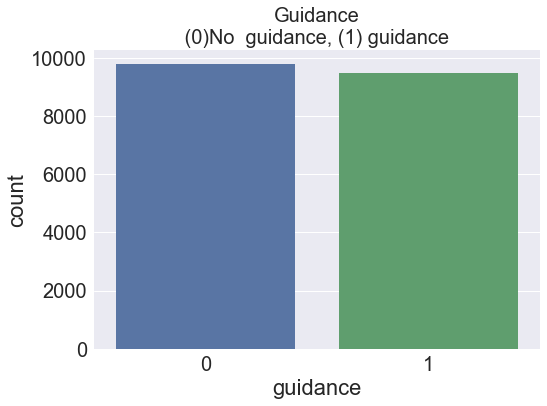

In [180]:
sns.countplot(x="guidance", data=l_f_u_DLA).set_title('Guidance\n (0)No  guidance, (1) guidance ', fontsize=20)
#fig.suptitle('Guidance\n (0)No  guidance, (1) guidance , (2) Control Group (US,CA,CH) ', fontsize=24)
plt.show()

In [115]:
l_f_u_DLA.groupby('guidance').median()

,opt_in,implied_consent,jhost
guidance,,,
0,1,0,4
1,1,1,4
2,2,2,5


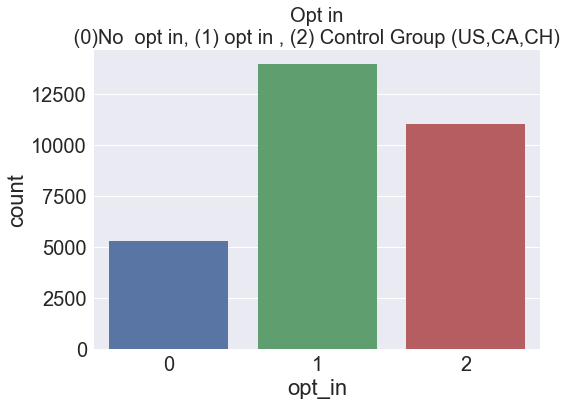

In [116]:
sns.countplot(x="opt_in", data=l_f_u_DLA).set_title('Opt in\n (0)No  opt in, (1) opt in , (2) Control Group (US,CA,CH) ', fontsize=20)
#fig.suptitle('Guidance\n (0)No  guidance, (1) guidance , (2) Control Group (US,CA,CH) ', fontsize=24)
plt.show()

In [117]:
l_f_u_DLA.groupby('opt_in').median()

,guidance,implied_consent,jhost
opt_in,,,
0,1,1,5
1,0,1,4
2,2,2,5


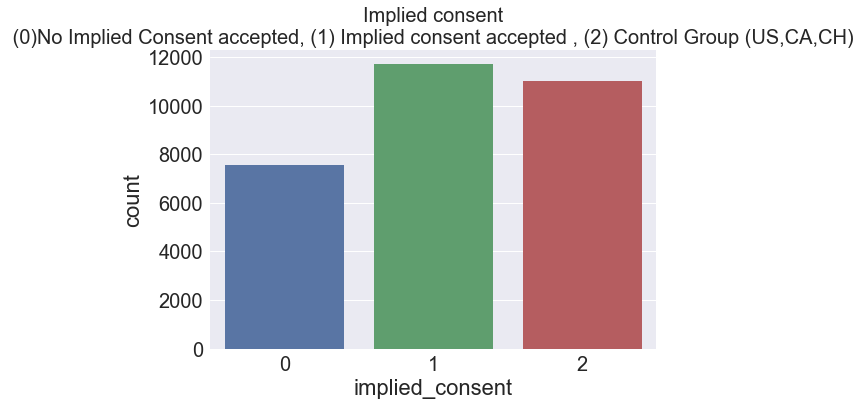

In [118]:
sns.countplot(x="implied_consent", data=l_f_u_DLA).set_title('Implied consent\n (0)No Implied Consent accepted, (1) Implied consent accepted , (2) Control Group (US,CA,CH) ', fontsize=20)
#fig.suptitle('Guidance\n (0)No  guidance, (1) guidance , (2) Control Group (US,CA,CH) ', fontsize=24)
plt.show()

In [119]:
l_f_u_DLA.groupby('implied_consent').median()

,guidance,opt_in,jhost
implied_consent,,,
0,0,1,3
1,1,1,5
2,2,2,5


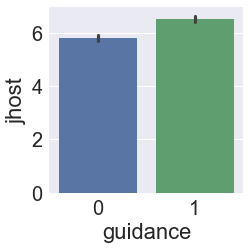

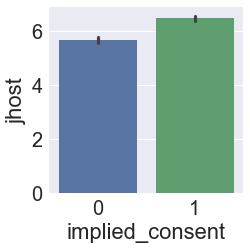

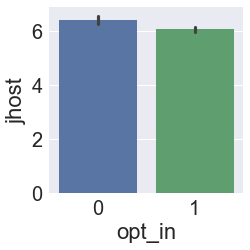

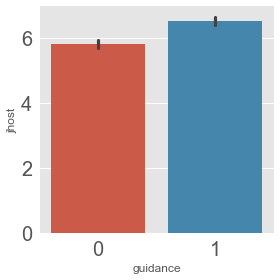

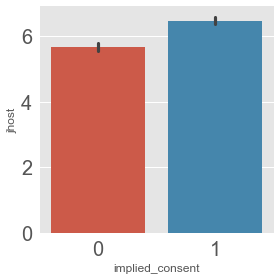

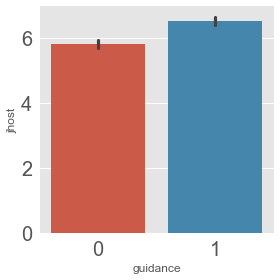

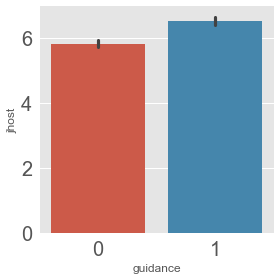

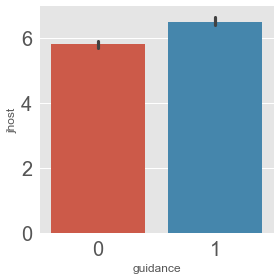

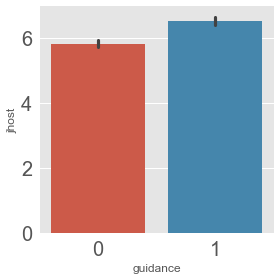

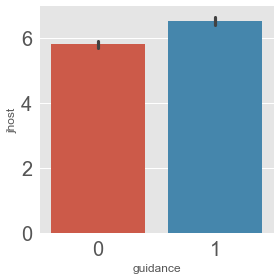

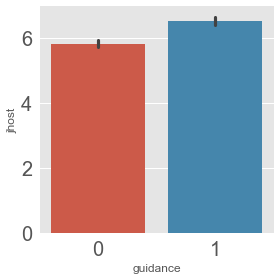

In [193]:
sns.factorplot(x='guidance', y='jhost', kind='bar', data=l_f_u_DLA)
plt.show()

In [194]:
sns.factorplot(x='implied_consent', y='jhost', kind='bar', data=l_f_u_DLA)
plt.show()

<function matplotlib.pyplot.show>

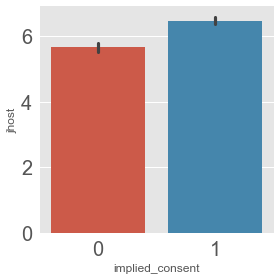

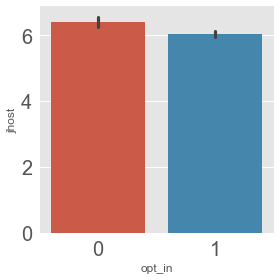

In [195]:
sns.factorplot(x='opt_in', y='jhost', kind='bar', data=l_f_u_DLA)
plt.show()

In [196]:
l_f_u_DLA=l_f_u_DLA[l_f_u_DLA.implied_consent!=2]

l_f_u_DLA_model=pd.DataFrame(data=l_f_u_DLA)
l_f_u_DLA_model.head()
#l_f_u_DLA_model.to_csv('RegressionDLA_JS_Unique.csv', sep=',')

#l_f_u_DLA2.tail(20)


In [121]:
l_f_u_DLA2 = pd.get_dummies(l_f_u_DLA, columns =['guidance', 'opt_in', 'implied_consent'])
l_f_u_DLA2.head()


,Country,tld,site_url,jhost,VP,TLD,guidance_0,guidance_1,opt_in_0,opt_in_1,implied_consent_0,implied_consent_1
0,Austria,at,121w.at,6,AT,at,1,0,0,1,1,0
17,Austria,at,121w.at,6,FR,at,1,0,0,1,1,0
16,Austria,at,121w.at,6,PT,at,1,0,0,1,1,0
14,Austria,at,121w.at,6,ES,at,1,0,0,1,1,0
13,Austria,at,121w.at,6,CZ,at,1,0,0,1,1,0


In [122]:
print(stats.spearmanr(l_f_u_DLA2['opt_in_1'], l_f_u_DLA2['jhost']))
l_f_u_DLA2.plot(kind='scatter',x='opt_in_1',y='jhost', title='Spearman Rho\nUnique JS- Copt in expected vs Trackers')
#plt.savefig('culture_JS',bbox_inches='tight')

SpearmanrResult(correlation=-0.016673496513402587, pvalue=0.020636699645970449)


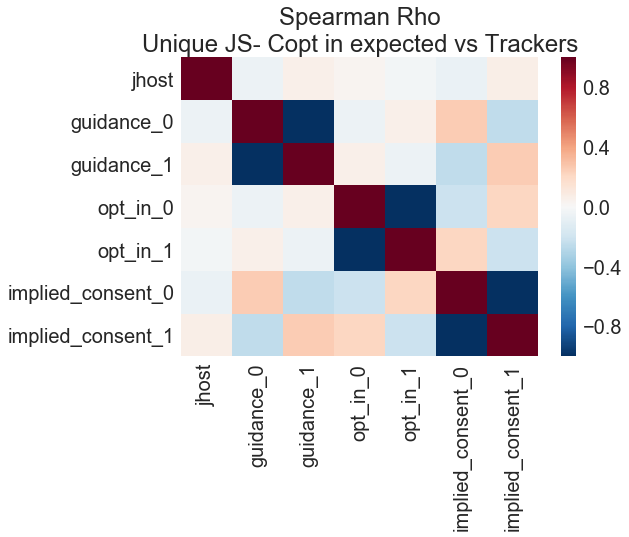

,jhost,guidance_0,guidance_1,opt_in_0,opt_in_1,implied_consent_0,implied_consent_1
jhost,1.000000,-0.060316,0.060316,0.026443,-0.026443,-0.067589,0.067589
guidance_0,-0.060316,1.000000,-1.000000,-0.060711,0.060711,0.253772,-0.253772
guidance_1,0.060316,-1.000000,1.000000,0.060711,-0.060711,-0.253772,0.253772
opt_in_0,0.026443,-0.060711,0.060711,1.000000,-1.000000,-0.216503,0.216503
opt_in_1,-0.026443,0.060711,-0.060711,-1.000000,1.000000,0.216503,-0.216503
implied_consent_0,-0.067589,0.253772,-0.253772,-0.216503,0.216503,1.000000,-1.000000
implied_consent_1,0.067589,-0.253772,0.253772,0.216503,-0.216503,-1.000000,1.000000


In [123]:
sns.heatmap(l_f_u_DLA2.corr())
plt.show()
l_f_u_DLA2.corr()


# print(stats.spearmanr(cul_c['worried_use_pd_cecere'], cul_c['jhost']))
# cul_c.plot(kind='scatter',x='worried_use_pd_cecere',y='jhost', title='Spearman Rho\nUnique JS- Culture vs Trackers')
# plt.savefig('culture_JS',bbox_inches='tight')


In [124]:
model1 = smf.glm(formula = "l_f_u_DLA2.jhost ~ C(l_f_u_DLA2.guidance_0)+C(l_f_u_DLA2.opt_in_0)+C(l_f_u_DLA2.implied_consent_1)", data=l_f_u_DLA, family=sm.families.NegativeBinomial()).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       l_f_u_DLA2.jhost   No. Observations:                19270
Model:                            GLM   Df Residuals:                    19266
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                  0.768486667492
Method:                          IRLS   Log-Likelihood:                -55716.
Date:                Fri, 08 Jun 2018   Deviance:                       12553.
Time:                        00:35:27   Pearson chi2:                 1.48e+04
No. Iterations:                     8                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.7830      0.015    122.184      0.000       1.754       1.812
C(l_f_u_DLA2.guidance_0)[T.1]           -0.0824      0.014     -5.853      0.000      -0.110      -0.055
C(l_f_u_DLA2.opt_in_0)[T.1]              0.0387      0.016      2.481      0.013       0.008       0.069
C(l_f_u_DLA2.implied_consent_1)[T.1]     0.1018      0.015      6.890      0.000       0.073       0.131
========================================================================================================
"""

In [125]:
model2 = smf.glm(formula = "l_f_u_DLA2.jhost ~ l_f_u_DLA2.guidance_1+l_f_u_DLA2.opt_in_1+l_f_u_DLA2.implied_consent_0", data=l_f_u_DLA, family=sm.families.NegativeBinomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       l_f_u_DLA2.jhost   No. Observations:                19270
Model:                            GLM   Df Residuals:                    19266
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                  0.768486667492
Method:                          IRLS   Log-Likelihood:                -55716.
Date:                Fri, 08 Jun 2018   Deviance:                       12553.
Time:                        00:35:27   Pearson chi2:                 1.48e+04
No. Iterations:                     8                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.8411      0.016    116.628      0.000       1.810       1.872
l_f_u_DLA2.guidance_1            0.0824      0.014      5.853      0.000       0.055       0.110
l_f_u_DLA2.opt_in_1             -0.0387      0.016     -2.481      0.013      -0.069      -0.008
l_f_u_DLA2.implied_consent_0    -0.1018      0.015     -6.890      0.000      -0.131      -0.073
================================================================================================
"""

In [126]:
model3 = smf.glm(formula = "l_f_u_DLA2.jhost ~ l_f_u_DLA2.guidance_1+l_f_u_DLA2.guidance_0+l_f_u_DLA2.opt_in_1+l_f_u_DLA2.opt_in_0+l_f_u_DLA2.implied_consent_0+l_f_u_DLA2.implied_consent_1", data=l_f_u_DLA, family=sm.families.NegativeBinomial()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       l_f_u_DLA2.jhost   No. Observations:                19270
Model:                            GLM   Df Residuals:                    19266
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                  0.759043227807
Method:                          IRLS   Log-Likelihood:                -55717.
Date:                Fri, 08 Jun 2018   Deviance:                       12555.
Time:                        00:35:31   Pearson chi2:                 1.46e+04
No. Iterations:                   100                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     2.396e+09   4.06e+11      0.006      0.995   -7.94e+11    7.99e+11
l_f_u_DLA2.guidance_1        -2.426e+09   4.11e+11     -0.006      0.995   -8.09e+11    8.04e+11
l_f_u_DLA2.guidance_0        -2.426e+09   4.11e+11     -0.006      0.995   -8.09e+11    8.04e+11
l_f_u_DLA2.opt_in_1           1.455e+09   2.47e+11      0.006      0.995   -4.82e+11    4.85e+11
l_f_u_DLA2.opt_in_0           1.455e+09   2.47e+11      0.006      0.995   -4.82e+11    4.85e+11
l_f_u_DLA2.implied_consent_0 -1.426e+09   2.42e+11     -0.006      0.995   -4.75e+11    4.72e+11
l_f_u_DLA2.implied_consent_1 -1.426e+09   2.42e+11     -0.006      0.995   -4.75e+11    4.72e+11
================================================================================================
"""

In [127]:
model4= smf.glm(formula = "l_f_u_DLA_model.jhost ~ l_f_u_DLA_model.guidance+l_f_u_DLA_model.opt_in+l_f_u_DLA_model.implied_consent", data=l_f_u_DLA_model, family=sm.families.NegativeBinomial()).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                   
=================================================================================
Dep. Variable:     l_f_u_DLA_model.jhost   No. Observations:                19270
Model:                               GLM   Df Residuals:                    19266
Model Family:           NegativeBinomial   Df Model:                            3
Link Function:                       log   Scale:                  0.768486667492
Method:                             IRLS   Log-Likelihood:                -55716.
Date:                   Fri, 08 Jun 2018   Deviance:                       12553.
Time:                           00:35:32   Pearson chi2:                 1.48e+04
No. Iterations:                        8                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.7393      0.018     97.720      0.000       1.704       1.774
l_f_u_DLA_model.guidance            0.0824      0.014      5.853      0.000       0.055       0.110
l_f_u_DLA_model.opt_in             -0.0387      0.016     -2.481      0.013      -0.069      -0.008
l_f_u_DLA_model.implied_consent     0.1018      0.015      6.890      0.000       0.073       0.131
===================================================================================================
"""

In [128]:
#
# .%load_ext rpy2.ipython
# c<-'hello'
# c

### FIELD FISHER OPT IN

In [129]:
#IV FF
l_f_FF= pd.read_csv('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\indata\\IV_dum_FF.csv')
print(l_f_FF.head())

jsdv_unique['tld']= jsdv_unique.site_url.apply(extract_tld)
print(jsdv_unique.head())
 
l_f_u_FF= pd.merge(l_f_FF,jsdv_unique, on='tld')
l_f_u_FF.shape
#l_f_u_FF
#print(l_f_u_FF.shape)
#I nee dto match tld .com with us legal framework, how?

      Country  opt_in     tld
0     Austria       0      at
1     Austria       0   ac.at
2     Austria       0   co.at
3  Australia        2      au
4  Australia        2  com.au
      site_url  jhost  VP TLD tld
22493  121w.at      6  AT  at  at
15760  121w.at      6  PL  at  at
12396  121w.at      6  IT  at  at
29244  121w.at      6  SE  at  at
640    121w.at      6  US  at  at


(30278, 7)

In [130]:
#TEST HYPOTHESIS WITH DIFFERENCES OF MEANS
# HA: countries that have Opt-in consent has less cookies than the ones who do not have it 
#Mann-Whitney(-Wilcoxon) 

#print(l_f_u_FF.dtypes)

no_optin=l_f_u_FF[l_f_u_FF.opt_in==0].sort_values(by='site_url')
no_optin_g= pd.DataFrame(data=no_optin)
#print(no_optin_g.head())
print("no Opt in group mean:",no_optin_g.jhost.mean())
print(no_optin_g.shape)

optin=l_f_u_FF[l_f_u_FF.opt_in==1].sort_values(by='site_url')
optin_g= pd.DataFrame(data=optin)
optin_g.head()
print("Opt in group mean:",optin_g.jhost.mean())
print(optin_g.shape)


optin_control=l_f_u_FF[l_f_u_FF.opt_in==2].sort_values(by='site_url')
optin_control_g= pd.DataFrame(data=optin_control)
optin_control_g.head()
print("Opt in control group mean:",optin_control_g.jhost.mean())
print(optin_control_g.shape)

print(no_optin_g.jhost.describe())
print(optin_g.jhost.describe())
print(optin_control_g.jhost.describe())
print(scipy.stats.kruskal(no_optin_g.jhost, optin_g.jhost,optin_control_g.jhost))

print('Opt in vs no Opt in required:',scipy.stats.mannwhitneyu(optin_g.jhost, no_optin_g.jhost, alternative='less'))
print('Opt in vs control group:',scipy.stats.mannwhitneyu(optin_g.jhost, optin_control_g.jhost, alternative='less'))
print('no opt in required vs control group:',scipy.stats.mannwhitneyu(no_optin_g.jhost, optin_control_g.jhost, alternative='less'))


sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups\n Unique JS Count\n (1)Opt in required, (2) Control Group (US,CA,CH), and (0) No opt in', fontsize=24)
sns.boxplot(x="opt_in", y="jhost", data=l_f_u_FF,palette="BuGn_r",width=0.4)

plt.savefig('optin_FF_JS',bbox_inches='tight')


no Opt in group mean: 6.023748738348275
(16843, 7)
Opt in group mean: 7.0370828182941905
(2427, 7)
Opt in control group mean: 6.313045058139535
(11008, 7)
count    16843.000000
mean         6.023749
std          5.542393
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         42.000000
Name: jhost, dtype: float64
count    2427.000000
mean        7.037083
std         7.352806
min         1.000000
25%         2.000000
50%         4.000000
75%        10.000000
max        41.000000
Name: jhost, dtype: float64
count    11008.000000
mean         6.313045
std          5.546022
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: jhost, dtype: float64
KruskalResult(statistic=20.524627188777117, pvalue=3.4924792491378144e-05)
Opt in vs no Opt in required: MannwhitneyuResult(statistic=20142749.5, pvalue=0.12231275885278475)
Opt in vs control group: MannwhitneyuResult(statistic=12936283.0, p

### TABLE ELSA-COMBINING MORE IV VARIABLES FROM THE 2 FIRMS AND OTHER RESOURCES

In [215]:
l_f= pd.read_csv('C:\\Users\\elsar_000\\Desktop\\Git\\CookieLaws18\\indata\\IV_dum.csv')
print(l_f.head())

jsdv_unique['tld']= jsdv_unique.site_url.apply(extract_tld)
print(jsdv_unique.head())
 
l_f_u= pd.merge(l_f,jsdv_unique, on='tld')
l_f_u.shape
#l_f_u

#I nee dto match tld .com with us legal framework, how? --ADDED TLD TO THE SAME DUMMY VARIABLE

      Country  consent  Fines  Guidance  Enforcement  box_enfo  Info_user  \
0     Austria        1      1         0            1         0          3   
1     Austria        1      1         0            1         0          3   
2     Austria        1      1         0            1         0          3   
3  Australia         2      2         2            0         2          0   
4  Australia         2      2         2            0         2          0   

   box_info  Exceptions  Normalize_DPA_budget  box_nor_enfo     tld  
0         2           1                  11.6             2      at  
1         2           1                  11.6             2   ac.at  
2         2           1                  11.6             2   co.at  
3         0           0                   0.0             0      au  
4         0           0                   0.0             0  com.au  
      site_url  jhost  VP TLD tld
22493  121w.at      6  AT  at  at
15760  121w.at      6  PL  at  at
12396  121w.at 

(30278, 16)

In [203]:
#TEST HYPOTHESIS WITH DIFFERENCES OF MEANS
# HA: countries that have consent has less cookies than the ones who do not have it 
#Mann-Whitney(-Wilcoxon) 

#print(l_f_u.dtypes)

no_consent_e=l_f_u[l_f_u.consent==0].sort_values(by='site_url')
no_consent_g_e= pd.DataFrame(data=no_consent_e)
#print(no_consent_g_e.head())
print("no consent group mean:",no_consent_g_e.jhost.mean())
print(no_consent_g_e.shape)

consent_e=l_f_u[l_f_u.consent==1].sort_values(by='site_url')
consent_g_e= pd.DataFrame(data=consent_e)
consent_g_e.head()
print("consent group mean:",consent_g_e.jhost.mean())
print(consent_g_e.shape)

consent_control_e=l_f_u[l_f_u.consent==2].sort_values(by='site_url')
consent_control_g_e= pd.DataFrame(data=consent_control_e)
consent_control_g_e.head()
print("consent control group mean:",consent_control_g_e.jhost.mean())
print(consent_control_g_e.shape)

print(no_consent_g_e.jhost.describe())
print(consent_g_e.jhost.describe())
print(consent_control_g_e.jhost.describe())

print(scipy.stats.kruskal(no_consent_g_e.jhost, consent_g_e.jhost, consent_control_g_e.jhost))

print('consent vs no consent:',scipy.stats.mannwhitneyu(consent_g_e.jhost, no_consent_g_e.jhost,alternative='less'))
print('consent vs control group:',scipy.stats.mannwhitneyu(consent_g_e.jhost, consent_control_g_e.jhost,alternative='less'))
print('no consent vs control group:',scipy.stats.mannwhitneyu(no_consent_g_e.jhost, consent_control_g_e.jhost,alternative='less'))

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7,10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups \n Unique Counted JS\n(0) No  consent, (1) Consent , (2) Control Group (US,CA,CH) ', fontsize=24)
sns.boxplot(x="consent", y="jhost", data=l_f_u,palette="BuGn_r",width=0.4)

plt.savefig('implied_consent_elsa_JS2',bbox_inches='tight')


no consent group mean: 6.047664901299952
(6231, 16)
consent group mean: 6.200935654574737
(13039, 16)
consent control group mean: 6.313045058139535
(11008, 16)
count    6231.000000
mean        6.047665
std         5.271974
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        41.000000
Name: jhost, dtype: float64
count    13039.000000
mean         6.200936
std          6.051357
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         42.000000
Name: jhost, dtype: float64
count    11008.000000
mean         6.313045
std          5.546022
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: jhost, dtype: float64
KruskalResult(statistic=31.497091972464279, pvalue=1.4470827954788133e-07)
consent vs no consent: MannwhitneyuResult(statistic=39299965.0, pvalue=0.00011390844361195438)
consent vs control group: MannwhitneyuResult(statistic=68973359.0,

In [133]:
# HA: countries that have fines has less cookies than the ones who do not have it 
#Mann-Whitney(-Wilcoxon) 

no_fines=l_f_u[l_f_u.Fines==0].sort_values(by='site_url')
no_fines_g= pd.DataFrame(data=no_fines)
print("No fines group mean:",no_fines.jhost.mean())
print(no_fines.shape)

fines=l_f_u[l_f_u.Fines==1].sort_values(by='site_url')
fines_g= pd.DataFrame(data=fines)
print("Fines group mean:",fines_g.jhost.mean())
print(fines.shape)

fines_control=l_f_u[l_f_u.Fines==2].sort_values(by='site_url')
fines_control_g= pd.DataFrame(data=fines_control)
print("Fines control group mean:",fines_control_g.jhost.mean())
print(fines_control_g.shape)

print(no_fines_g.jhost.describe())
print(fines.jhost.describe())
print(fines_control_g.jhost.describe())
print(scipy.stats.kruskal(no_fines_g.jhost, fines.jhost, fines_control_g.jhost))

print('Fines vs No Fines:',scipy.stats.mannwhitneyu(fines.jhost, no_fines_g.jhost,alternative='less'))
print('Fines vs control group:',scipy.stats.mannwhitneyu(fines.jhost, fines_control_g.jhost,alternative='less'))
print('No Fines vs control group:',scipy.stats.mannwhitneyu(no_fines_g.jhost, fines_control_g.jhost,alternative='less'))

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups \n Unique counted JS Calls\n(2) Control Group(US,CA,CH), (1)Fines, (0) No Fines  ', fontsize=24)
sns.boxplot(x="Fines", y="jhost", data=l_f_u,palette="BuGn_r",width=0.4)

plt.savefig('fines_Elsa_JS',bbox_inches='tight')


No fines group mean: 6.580250096686863
(7757, 16)
Fines group mean: 5.86241639885347
(11513, 16)
Fines control group mean: 6.313045058139535
(11008, 16)
count    7757.000000
mean        6.580250
std         5.901998
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        42.000000
Name: jhost, dtype: float64
count    11513.000000
mean         5.862416
std          5.731226
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: jhost, dtype: float64
count    11008.000000
mean         6.313045
std          5.546022
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: jhost, dtype: float64
KruskalResult(statistic=188.91970807372766, pvalue=9.4755980611431974e-42)
Fines vs No Fines: MannwhitneyuResult(statistic=39667665.5, pvalue=2.3169786398506572e-40)
Fines vs control group: MannwhitneyuResult(statistic=58722622.0, pvalue=4.653

In [134]:
# HA: countries that have guidance have more cookies than the ones who do not have it 
#Mann-Whitney(-Wilcoxon) 

no_guidance_e=l_f_u[l_f_u.Guidance==0].sort_values(by='site_url')
no_guidance_g_e= pd.DataFrame(data=no_guidance_e)
print("No Guidance group mean:",no_guidance_g_e.jhost.mean())


guidance_e=l_f_u[l_f_u.Guidance==1].sort_values(by='site_url')
guidance_g_e= pd.DataFrame(data=guidance_e)
print("Guidance group mean:",guidance_g_e.jhost.mean())



guidance_control_e=l_f_u[l_f_u.Guidance==2].sort_values(by='site_url')
guidance_control_g_e= pd.DataFrame(data=guidance_control_e)
print("Guidance control group mean:",guidance_control_g_e.jhost.mean())

print(no_guidance_g_e.jhost.describe())
print(guidance_g_e.jhost.describe())
print(guidance_control_g_e.jhost.describe())
print(scipy.stats.kruskal(no_guidance_g_e.jhost, guidance_g_e.jhost, guidance_control_g_e.jhost))

print('Guidance vs No Guidance:',scipy.stats.mannwhitneyu(guidance_g_e.jhost,no_guidance_g_e.jhost,alternative='less'))
print('No guidance vs control group:',scipy.stats.mannwhitneyu(no_guidance_g_e.jhost, guidance_control_g_e.jhost,alternative='less'))
print('Guidance vs control group:',scipy.stats.mannwhitneyu(guidance_g_e.jhost, guidance_control_g_e.jhost,alternative='less'))

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups \n Unique counted JS Calls\n(0) No guidance, (1)Guidance, (2) Control Group (US,CA,CH) ', fontsize=24)
sns.boxplot(x="Guidance", y="jhost", data=l_f_u,palette="BuGn_r",width=0.4)

plt.savefig('guidance_Elsa_JS',bbox_inches='tight')


No Guidance group mean: 6.057335581787521
Guidance group mean: 6.206434095770939
Guidance control group mean: 6.313045058139535
count    7116.000000
mean        6.057336
std         5.855685
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        41.000000
Name: jhost, dtype: float64
count    12154.000000
mean         6.206434
std          5.784360
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         42.000000
Name: jhost, dtype: float64
count    11008.000000
mean         6.313045
std          5.546022
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: jhost, dtype: float64
KruskalResult(statistic=46.005708427641586, pvalue=1.0232631792678673e-10)
Guidance vs No Guidance: MannwhitneyuResult(statistic=45241956.5, pvalue=0.99999996577186423)
No guidance vs control group: MannwhitneyuResult(statistic=36992447.5, pvalue=1.021636170711728e-10

In [205]:
# HA: countries that have more authorities have more cookies have more cookies than the ones who do not have it 
#Mann-Whitney(-Wilcoxon) 

control_enforcement=l_f_u[l_f_u.box_enfo==2].sort_values(by='site_url')
control_enforcement_g= pd.DataFrame(data=control_enforcement)
print("control Enforcement group mean:",control_enforcement.jhost.mean())
print(control_enforcement_g.shape)


less_enforcement_authorities=l_f_u[l_f_u.box_enfo==0].sort_values(by='site_url')
less_enforcement_authorities_g= pd.DataFrame(data=less_enforcement_authorities)
print("Less Enforcement Authorities group mean:",less_enforcement_authorities_g.jhost.mean())
print(less_enforcement_authorities_g.shape)

more_enforcement_auth=l_f_u[l_f_u.box_enfo==1].sort_values(by='site_url')
more_enforcement_auth_g= pd.DataFrame(data=more_enforcement_auth)
print("More  Enforcement Authorities group mean:",more_enforcement_auth_g.jhost.mean())
print(more_enforcement_auth_g.shape)

print(control_enforcement_g.jhost.describe())
print(less_enforcement_authorities_g.jhost.describe())
print(more_enforcement_auth_g.jhost.describe())

print(scipy.stats.kruskal(control_enforcement_g.jhost, less_enforcement_authorities_g.jhost, more_enforcement_auth_g.jhost)) #NO DATA YET OF OTHER COUNTRIES
box=pd.concat

print('More Enforcement vs Less enforcement:',scipy.stats.mannwhitneyu(more_enforcement_auth_g.jhost,less_enforcement_authorities_g.jhost,alternative='less'))
print('More enforcemnte vs control group:',scipy.stats.mannwhitneyu(more_enforcement_auth_g.jhost, control_enforcement_g.jhost,alternative='less'))
print('Less enforcement vs control group:',scipy.stats.mannwhitneyu(less_enforcement_authorities_g.jhost, control_enforcement_g.jhost,alternative='less'))

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups \n Unique counted JS Calls\n(2) Control Group (US,CA,CH), (1)More enforcement, (0) Less enforcement ', fontsize=24)
sns.boxplot(x="box_enfo", y="jhost", data=l_f_u,palette="BuGn_r",width=0.4)

plt.savefig('enfo_c_elsa_JS',bbox_inches='tight')


control Enforcement group mean: 6.313045058139535
(11008, 16)
Less Enforcement Authorities group mean: 6.2592704250829065
(16585, 16)
More  Enforcement Authorities group mean: 5.4849162011173185
(2685, 16)
count    11008.000000
mean         6.313045
std          5.546022
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: jhost, dtype: float64
count    16585.000000
mean         6.259270
std          5.889823
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         42.000000
Name: jhost, dtype: float64
count    2685.000000
mean        5.484916
std         5.251025
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        29.000000
Name: jhost, dtype: float64
KruskalResult(statistic=41.640285347681477, pvalue=9.0766779043326946e-10)
More Enforcement vs Less enforcement: MannwhitneyuResult(statistic=21100293.5, pvalue=5.8169874720454262e-06)
More 

In [136]:
#enforcement with budget dpa
h_enforcement=l_f_u[l_f_u.Normalize_DPA_budget>=10.7].sort_values(by='site_url')
h_e= pd.DataFrame(data=h_enforcement)
#print(h_e.head())
#print("High enforcement mean:",h_e.jhost.median())
print('high enfo',h_e.jhost.describe())


low_e=l_f_u[(l_f_u.Normalize_DPA_budget>1)&(l_f_u.Normalize_DPA_budget<10.7)].sort_values(by='site_url')
l_e= pd.DataFrame(data=low_e)
l_e.head()
#print("low enfo group mean:",l_e.jhost.median())
print('low enfor',l_e.jhost.describe())


control_enfo=l_f_u[l_f_u.Normalize_DPA_budget==0].sort_values(by='site_url')
control_enfo_e= pd.DataFrame(data=control_enfo)
control_enfo_e.tail(100)
#print("control group mean:",control_enfo_e.jhost.mean())
print('control enfor', control_enfo_e.jhost.describe())

print(scipy.stats.kruskal(h_e.jhost, l_e.jhost, control_enfo_e.jhost))

print('High Budget for Enforcement vs Low budget for enfo:',scipy.stats.mannwhitneyu(h_e.jhost, l_e.jhost,alternative='less'))
print('High Busget or Enforcement vs control group:',scipy.stats.mannwhitneyu(h_e.jhost, control_enfo_e.jhost,alternative='less'))
print('Low Budget for Enforcement vs control group:',scipy.stats.mannwhitneyu(l_e.jhost, control_enfo_e.jhost,alternative='less'))

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups \n Unique counted JS Calls\n(0) Control Group(US,CA,CH), (2)High Enfo, (1) Low Enfo  ', fontsize=24)
sns.boxplot(x="box_nor_enfo", y="jhost", data=l_f_u,palette="BuGn_r",width=0.4)

plt.savefig('enfo_budget_elsa_JS',bbox_inches='tight')


high enfo count    11835.000000
mean         6.474609
std          6.307478
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         42.000000
Name: jhost, dtype: float64
low enfor count    6253.000000
mean        5.481369
std         4.710647
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        30.000000
Name: jhost, dtype: float64
control enfor count    11008.000000
mean         6.313045
std          5.546022
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: jhost, dtype: float64
KruskalResult(statistic=29.345559793462556, pvalue=4.2431917370451615e-07)
High Budget for Enforcement vs Low budget for enfo: MannwhitneyuResult(statistic=37635433.0, pvalue=0.97182595135538552)
High Busget or Enforcement vs control group: MannwhitneyuResult(statistic=63682370.5, pvalue=0.0016222766484792371)
Low Budget for Enforcement vs control group: Mannw

In [137]:
# HA: countries that provide more information to users have less cookies 
#Mann-Whitney(-Wilcoxon) 

control_info=l_f_u[l_f_u.Info_user==0].sort_values(by='site_url')
control_info_g= pd.DataFrame(data=control_info)
print("Control group mean:",control_info_g.jhost.mean())
print(control_info_g.shape)


low_info=l_f_u[(l_f_u.Info_user==1)|(l_f_u.Info_user==2)].sort_values(by='site_url')
low_info_g= pd.DataFrame(data=low_info)
print("Low info group mean:",low_info_g.jhost.mean())
print(low_info_g.shape)

high_info=l_f_u[(l_f_u.Info_user==3)|(l_f_u.Info_user==4)].sort_values(by='site_url')
high_info_g= pd.DataFrame(data=high_info)
print("High Info group mean:",high_info_g.jhost.mean())
print(high_info_g.shape)

print(control_info_g.jhost.describe())
print(low_info_g.jhost.describe())
print(high_info_g.jhost.describe())
print(scipy.stats.kruskal(control_info_g.jhost, low_info_g.jhost, high_info_g.jhost)) #NO DATA YET OF OTHER COUNTRIES

print('High Info vs Low Info:',scipy.stats.mannwhitneyu(high_info_g.jhost, low_info_g.jhost,alternative='less'))
print('High Info vs control group:',scipy.stats.mannwhitneyu(high_info_g.jhost, control_info_g.jhost,alternative='less'))
print('Low Info vs control group:',scipy.stats.mannwhitneyu(low_info_g.jhost, control_info_g.jhost,alternative='less'))

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.set(font_scale =2)
fig.suptitle('Comparison among groups \n Unique counted JS Calls\n(0) Control Group(US,CA,CH), (2)High Info, (1) Low Info  ', fontsize=24)
sns.boxplot(x="box_info", y="jhost", data=l_f_u,palette="BuGn_r",width=0.4)

plt.savefig('info_elsa_JS',bbox_inches='tight')


Control group mean: 6.313045058139535
(11008, 16)
Low info group mean: 6.395701533928417
(11539, 16)
High Info group mean: 5.78670288449101
(7731, 16)
count    11008.000000
mean         6.313045
std          5.546022
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: jhost, dtype: float64
count    11539.000000
mean         6.395702
std          5.952426
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         42.000000
Name: jhost, dtype: float64
count    7731.000000
mean        5.786703
std         5.574003
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        32.000000
Name: jhost, dtype: float64
KruskalResult(statistic=75.115316517895465, pvalue=4.885581527699826e-17)
High Info vs Low Info: MannwhitneyuResult(statistic=41824252.5, pvalue=7.3021517581740046e-14)
High Info vs control group: MannwhitneyuResult(statistic=39636096.0, pvalue=

## Regression Elsa 

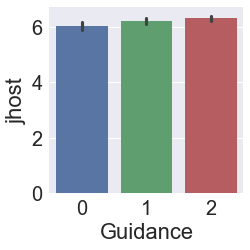

In [219]:
sns.factorplot(x='Guidance', y='jhost', kind='bar', data=l_f_u)
plt.show()

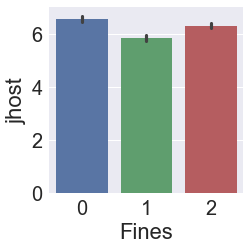

In [220]:
sns.factorplot(x='Fines', y='jhost', kind='bar', data=l_f_u)
plt.show()

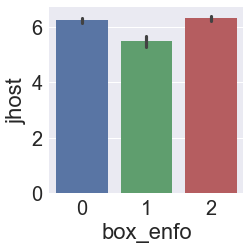

In [221]:
sns.factorplot(x='box_enfo', y='jhost', kind='bar', data=l_f_u)
plt.show()

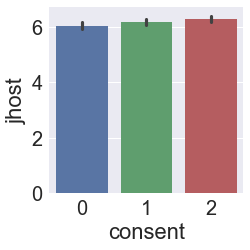

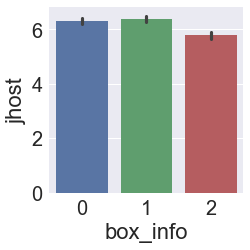

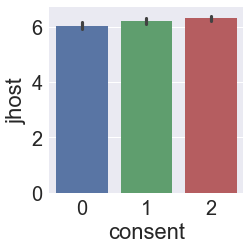

In [224]:
sns.factorplot(x='consent', y='jhost', kind='bar', data=l_f_u)
plt.show()

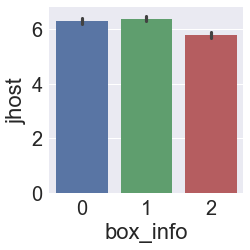

In [225]:
sns.factorplot(x='box_info', y='jhost', kind='bar', data=l_f_u)
plt.show()

In [231]:
l_f_u=l_f_u[l_f_u.consent!=2]

l_f_u_model=pd.DataFrame(data=l_f_u)
l_f_u_model.head()
#l_f_u_model.to_csv('Regression_Elsa_Unique_JScalls.csv', sep=',')

#l_f_u_DLA2.tail(20)

,Country,consent,Fines,Guidance,Enforcement,box_enfo,Info_user,box_info,Exceptions,Normalize_DPA_budget,box_nor_enfo,tld,site_url,jhost,VP,TLD
0,Austria,1,1,0,1,0,3,2,1,11.6,2,at,121w.at,6,AT,at
1,Austria,1,1,0,1,0,3,2,1,11.6,2,at,121w.at,6,PL,at
2,Austria,1,1,0,1,0,3,2,1,11.6,2,at,121w.at,6,IT,at
3,Austria,1,1,0,1,0,3,2,1,11.6,2,at,121w.at,6,SE,at
4,Austria,1,1,0,1,0,3,2,1,11.6,2,at,121w.at,6,US,at


In [227]:
l_f_u_2 = pd.get_dummies(l_f_u, columns =['Guidance','consent','Fines','box_info','box_enfo'])
l_f_u_2.head()

,Country,Enforcement,Info_user,Exceptions,Normalize_DPA_budget,box_nor_enfo,tld,site_url,jhost,VP,...,Guidance_0,Guidance_1,consent_0,consent_1,Fines_0,Fines_1,box_info_1,box_info_2,box_enfo_0,box_enfo_1
0,Austria,1,3,1,11.6,2,at,121w.at,6,AT,...,1,0,0,1,0,1,0,1,1,0
1,Austria,1,3,1,11.6,2,at,121w.at,6,PL,...,1,0,0,1,0,1,0,1,1,0
2,Austria,1,3,1,11.6,2,at,121w.at,6,IT,...,1,0,0,1,0,1,0,1,1,0
3,Austria,1,3,1,11.6,2,at,121w.at,6,SE,...,1,0,0,1,0,1,0,1,1,0
4,Austria,1,3,1,11.6,2,at,121w.at,6,US,...,1,0,0,1,0,1,0,1,1,0


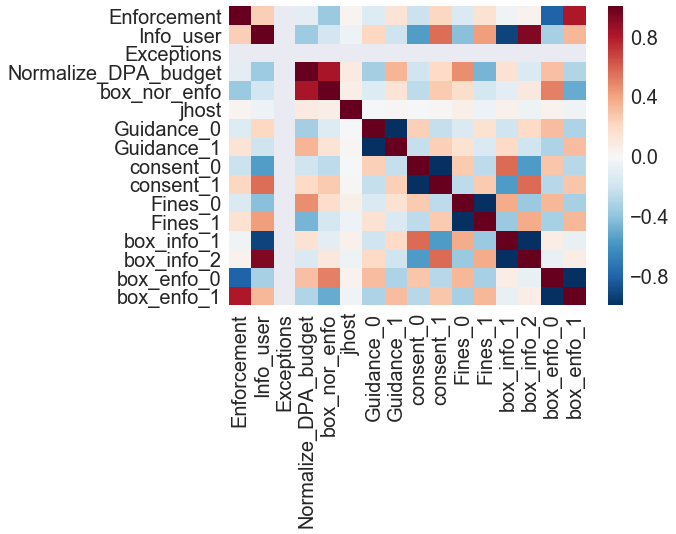

,Enforcement,Info_user,Exceptions,Normalize_DPA_budget,box_nor_enfo,jhost,Guidance_0,Guidance_1,consent_0,consent_1,Fines_0,Fines_1,box_info_1,box_info_2,box_enfo_0,box_enfo_1
Enforcement,1.000000,0.242498,NaN,-0.107574,-0.370538,0.028560,-0.140059,0.140059,-0.216026,0.216026,-0.150416,0.150416,-0.040237,0.040237,-0.809336,0.809336
Info_user,0.242498,1.000000,NaN,-0.366817,-0.184968,-0.056338,0.207220,-0.207220,-0.555193,0.555193,-0.421134,0.421134,-0.924987,0.924987,-0.330566,0.330566
Exceptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normalize_DPA_budget,-0.107574,-0.366817,NaN,1.000000,0.826105,0.092508,-0.336356,0.336356,-0.199758,0.199758,0.462172,-0.462172,0.151806,-0.151806,0.298059,-0.298059
box_nor_enfo,-0.370538,-0.184968,NaN,0.826105,1.000000,0.070180,-0.134614,0.134614,-0.265254,0.265254,0.178230,-0.178230,-0.106982,0.106982,0.507643,-0.507643
jhost,0.028560,-0.056338,NaN,0.092508,0.070180,1.000000,-0.012383,0.012383,-0.012338,0.012338,0.060581,-0.060581,0.051368,-0.051368,0.046147,-0.046147
Guidance_0,-0.140059,0.207220,NaN,-0.336356,-0.134614,-0.012383,1.000000,-1.000000,0.239312,-0.239312,-0.151618,0.151618,-0.201636,0.201636,0.307874,-0.307874
Guidance_1,0.140059,-0.207220,NaN,0.336356,0.134614,0.012383,-1.000000,1.000000,-0.239312,0.239312,0.151618,-0.151618,0.201636,-0.201636,-0.307874,0.307874
consent_0,-0.216026,-0.555193,NaN,-0.199758,-0.265254,-0.012338,0.239312,-0.239312,1.000000,-1.000000,0.262139,-0.262139,0.565836,-0.565836,0.278145,-0.278145
consent_1,0.216026,0.555193,NaN,0.199758,0.265254,0.012338,-0.239312,0.239312,-1.000000,1.000000,-0.262139,0.262139,-0.565836,0.565836,-0.278145,0.278145


In [228]:
sns.heatmap(l_f_u_2.corr())
plt.show()
l_f_u_2.corr()

In [235]:
model2 = smf.glm(formula = "l_f_u_2.jhost ~ l_f_u_2.Guidance_1+l_f_u_2.consent_1+l_f_u_2.Fines_1+l_f_u_2.box_info_2+l_f_u_2.box_enfo_1", data=l_f_u_2, family=sm.families.NegativeBinomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          l_f_u_2.jhost   No. Observations:                19270
Model:                            GLM   Df Residuals:                    19264
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                  0.745757712501
Method:                          IRLS   Log-Likelihood:                -55687.
Date:                Fri, 08 Jun 2018   Deviance:                       12496.
Time:                        13:12:42   Pearson chi2:                 1.44e+04
No. Iterations:                     9                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.8539      0.016    114.155      0.000       1.822       1.886
l_f_u_2.Guidance_1    -0.0475      0.017     -2.844      0.004      -0.080      -0.015
l_f_u_2.consent_1      0.1875      0.020      9.549      0.000       0.149       0.226
l_f_u_2.Fines_1       -0.0736      0.016     -4.599      0.000      -0.105      -0.042
l_f_u_2.box_info_2    -0.1861      0.019     -9.897      0.000      -0.223      -0.149
l_f_u_2.box_enfo_1    -0.1449      0.023     -6.414      0.000      -0.189      -0.101
======================================================================================
"""

In [237]:
model2 = smf.glm(formula = "l_f_u_2.jhost ~ l_f_u_2.Guidance_0+l_f_u_2.consent_0+l_f_u_2.Fines_0+l_f_u_2.box_info_1+l_f_u_2.box_enfo_0", data=l_f_u_2, family=sm.families.NegativeBinomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          l_f_u_2.jhost   No. Observations:                19270
Model:                            GLM   Df Residuals:                    19264
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                  0.745757712501
Method:                          IRLS   Log-Likelihood:                -55687.
Date:                Fri, 08 Jun 2018   Deviance:                       12496.
Time:                        13:16:42   Pearson chi2:                 1.44e+04
No. Iterations:                     9                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.5893      0.021     77.099      0.000       1.549       1.630
l_f_u_2.Guidance_0     0.0475      0.017      2.844      0.004       0.015       0.080
l_f_u_2.consent_0     -0.1875      0.020     -9.549      0.000      -0.226      -0.149
l_f_u_2.Fines_0        0.0736      0.016      4.599      0.000       0.042       0.105
l_f_u_2.box_info_1     0.1861      0.019      9.897      0.000       0.149       0.223
l_f_u_2.box_enfo_0     0.1449      0.023      6.414      0.000       0.101       0.189
======================================================================================
"""

### COMPARISON AMONG TLD

      jhost                                               
      count      mean       std  min  25%  50%   75%   max
TLD                                                       
at   1334.0  4.841829  4.890521  1.0  2.0  3.0   6.0  23.0
au   1543.0  7.724563  4.959887  1.0  3.0  7.0  11.0  21.0
be   1376.0  6.855378  6.723431  1.0  2.0  4.0  10.0  29.0
ca   1476.0  6.149729  5.329668  1.0  2.0  4.0   9.0  27.0
ch   1309.0  6.372804  6.063759  1.0  2.0  3.0   9.0  24.0
com  2760.0  7.484783  6.351358  1.0  3.0  6.0  10.0  33.0
cz   1494.0  5.960509  4.999442  1.0  2.0  5.0   7.0  30.0
de   1169.0  7.895637  7.514442  1.0  2.0  4.0  14.0  41.0
es   1220.0  6.481967  5.978949  1.0  2.0  3.0  11.0  28.0
fr   1378.0  8.295356  6.516545  1.0  3.0  6.0  13.0  31.0
gr   1270.0  4.778740  4.595783  1.0  2.0  3.0   6.0  21.0
hu   1259.0  5.038920  3.509367  1.0  2.0  5.0   7.0  17.0
it   1250.0  5.102400  4.501658  1.0  2.0  3.0   7.0  35.0
jp    928.0  6.640086  4.468249  1.0  3.0  5.0  10.0  24

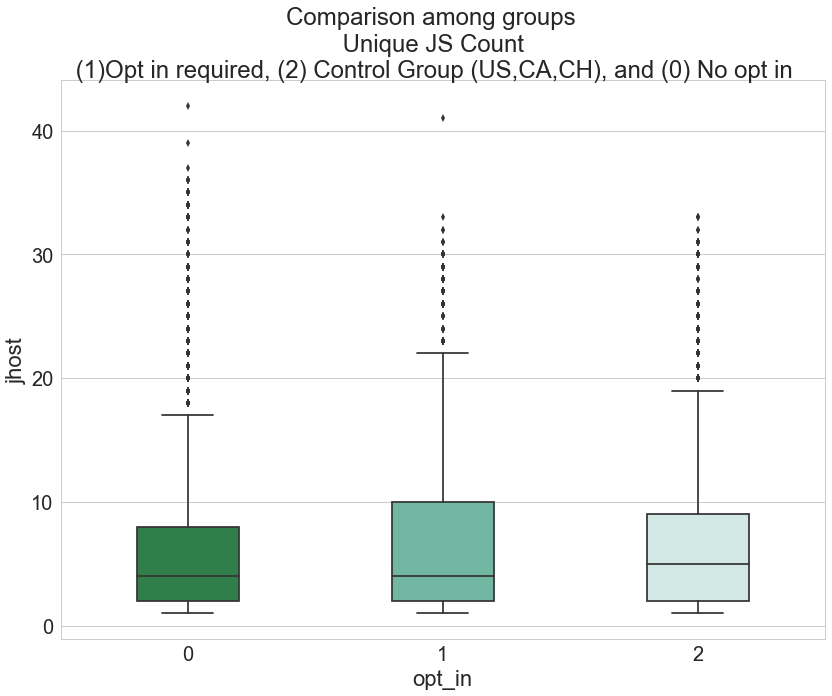

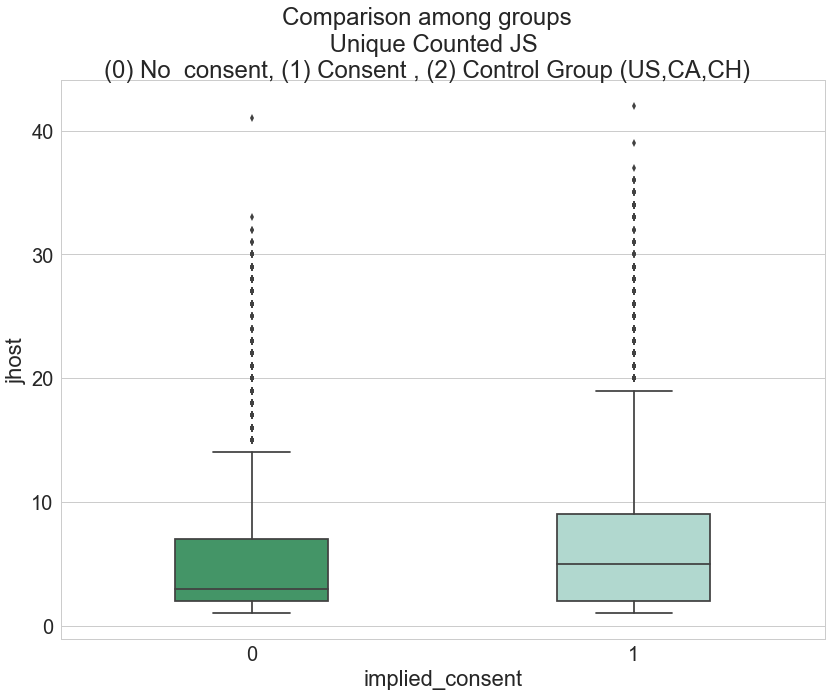

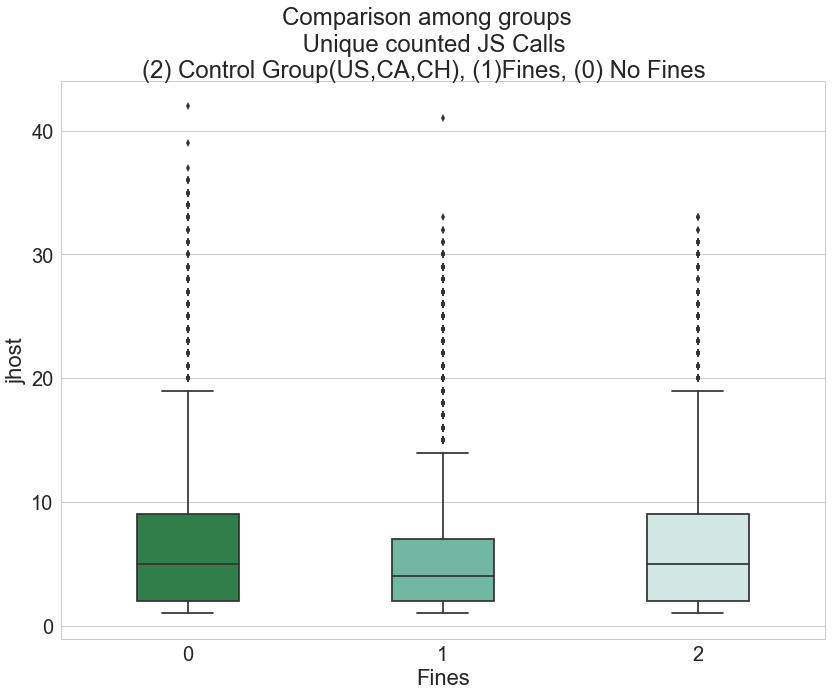

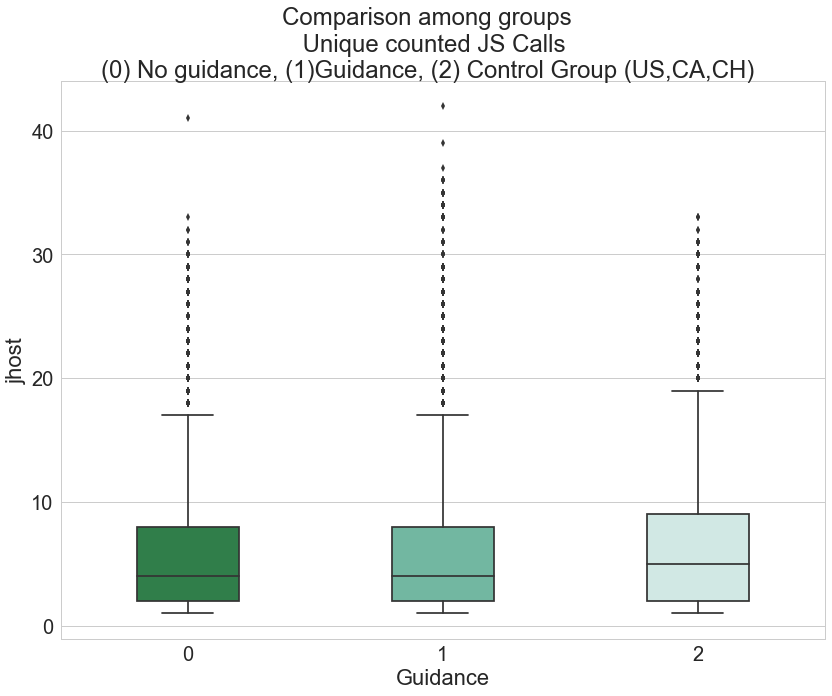

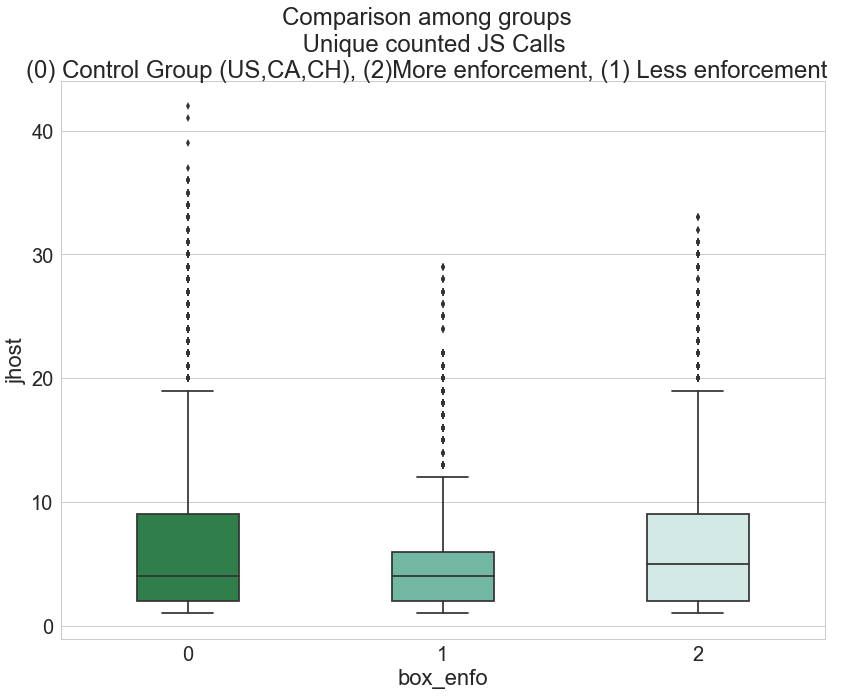

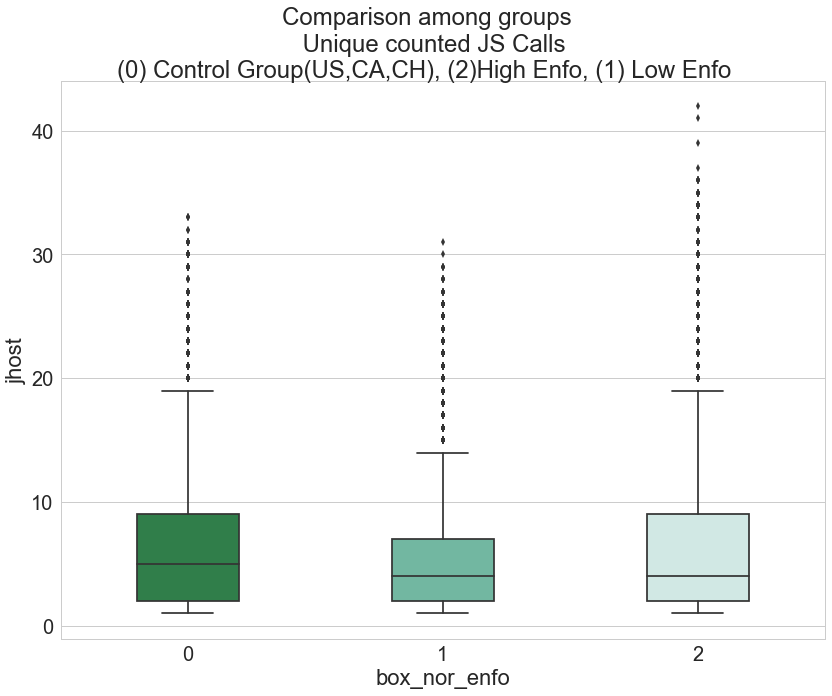

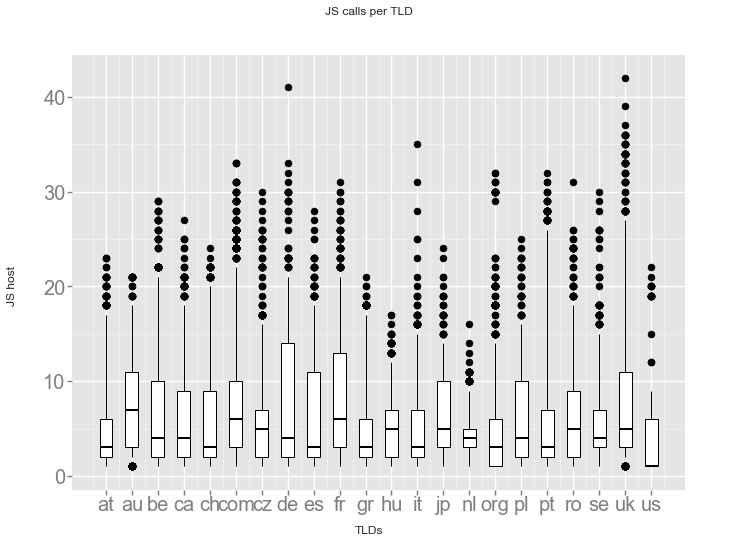

<ggplot: (-9223371995597056824)>

In [138]:
print(jsdv_unique.groupby('TLD').describe())

ggplot(jsdv_unique,aes(x='jsdv_unique.TLD',y='jsdv_unique.jhost'))+geom_boxplot()+labs('TLDs', 'JS host')+ggtitle("JS calls per TLD")

In [139]:
jsdv_unique.head()

,site_url,jhost,VP,TLD,tld
22493,121w.at,6,AT,at,at
15760,121w.at,6,PL,at,at
12396,121w.at,6,IT,at,at
29244,121w.at,6,SE,at,at
640,121w.at,6,US,at,at


In [140]:
js_be_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_US=jsdv_unique[(jsdv_unique.VP=='US')&(jsdv_unique.tld=='se')].sort_values(by='site_url')



In [141]:
js_be_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_NL=jsdv_unique[(jsdv_unique.VP=='NL')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [142]:
js_be_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_DE=jsdv_unique[(jsdv_unique.VP=='DE')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [143]:
js_be_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_BE=jsdv_unique[(jsdv_unique.VP=='BE')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [144]:
js_be_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_CA=jsdv_unique[(jsdv_unique.VP=='CA')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [145]:
js_be_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_CH=jsdv_unique[(jsdv_unique.VP=='CH')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [146]:
js_be_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_ES=jsdv_unique[(jsdv_unique.VP=='ES')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [147]:
js_be_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_FR=jsdv_unique[(jsdv_unique.VP=='FR')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [148]:
js_be_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_IT=jsdv_unique[(jsdv_unique.VP=='IT')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [149]:
js_be_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_PL=jsdv_unique[(jsdv_unique.VP=='PL')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [150]:
js_be_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_PT=jsdv_unique[(jsdv_unique.VP=='PT')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [151]:
js_be_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_RO=jsdv_unique[(jsdv_unique.VP=='RO')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [152]:
js_be_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_UK=jsdv_unique[(jsdv_unique.VP=='UK')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [153]:
js_be_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_AT=jsdv_unique[(jsdv_unique.VP=='AT')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [154]:
js_be_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_CZ=jsdv_unique[(jsdv_unique.VP=='CZ')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [155]:
js_be_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_GR=jsdv_unique[(jsdv_unique.VP=='GR')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [156]:
js_be_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_HU=jsdv_unique[(jsdv_unique.VP=='HU')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [157]:
js_be_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='be')].sort_values(by='site_url')
js_ca_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='ca')].sort_values(by='site_url')
js_ch_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='ch')].sort_values(by='site_url')
js_org_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='org')].sort_values(by='site_url')
js_com_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='com')].sort_values(by='site_url')
js_de_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='de')].sort_values(by='site_url')
js_es_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='es')].sort_values(by='site_url')
js_fr_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='fr')].sort_values(by='site_url')
js_it_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='it')].sort_values(by='site_url')
js_nl_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='nl')].sort_values(by='site_url')
js_pl_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='pl')].sort_values(by='site_url')
js_pt_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='pt')].sort_values(by='site_url')
js_ro_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='ro')].sort_values(by='site_url')
js_uk_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='uk')].sort_values(by='site_url')
js_us_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='us')].sort_values(by='site_url')
js_at_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='at')].sort_values(by='site_url')
js_cz_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='cz')].sort_values(by='site_url')
js_gr_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='gr')].sort_values(by='site_url')
js_hu_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='hu')].sort_values(by='site_url')
js_se_SE=jsdv_unique[(jsdv_unique.VP=='SE')&(jsdv_unique.tld=='se')].sort_values(by='site_url')


In [158]:
scipy.stats.kruskal(js_pt_US.jhost,js_pt_NL.jhost, js_pt_DE.jhost,js_pt_BE.jhost,js_pt_CA.jhost,js_pt_CH.jhost,js_pt_ES.jhost,js_pt_FR.jhost,js_pt_IT.jhost,js_pt_PL.jhost,js_pt_PT.jhost,js_pt_RO.jhost,js_pt_UK.jhost,js_pt_AT.jhost,js_pt_CZ.jhost,js_pt_GR.jhost,js_pt_HU.jhost,js_pt_SE.jhost)

KruskalResult(statistic=1.7431701714119114, pvalue=0.9999988008291627)

In [159]:
scipy.stats.kruskal(js_com_US.jhost,js_com_NL.jhost, js_com_DE.jhost,js_com_BE.jhost,js_com_CA.jhost,js_com_CH.jhost,js_com_ES.jhost,js_com_FR.jhost,js_com_IT.jhost,js_com_PL.jhost,js_com_PT.jhost,js_com_RO.jhost,js_com_UK.jhost,js_com_AT.jhost,js_com_CZ.jhost,js_com_GR.jhost,js_com_HU.jhost,js_com_SE.jhost)

KruskalResult(statistic=18.58616809891862, pvalue=0.3527960158574267)

     jhost
tld       
at     4.0
be     5.0
ca     4.0
ch     3.5
com    7.0
cz     4.0
de     4.0
es     4.0
fr     7.0
gr     3.0
hu     3.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     4.0
ro     5.0
se     4.0
uk     4.5
us     1.0


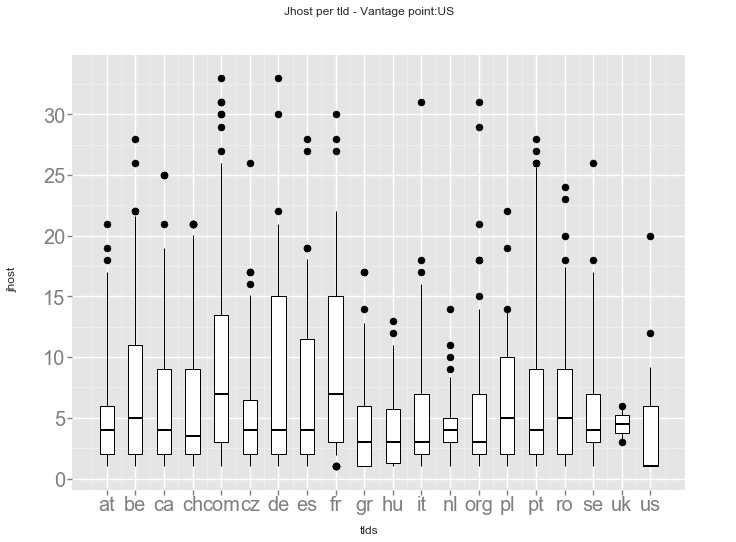

<ggplot: (-9223371995607867427)>


KruskalResult(statistic=88.007809472458007, pvalue=3.2838914906545387e-11)

In [160]:
js_US_boxplot=pd.concat([js_be_US,js_ca_US, js_ch_US,js_org_US,js_com_US,js_de_US,js_es_US,js_fr_US,js_it_US,js_nl_US,js_pl_US,js_pt_US,js_ro_US,js_uk_US,js_us_US,js_at_US,js_cz_US,js_gr_US,js_hu_US,js_se_US])
js_us=js_US_boxplot.groupby('tld').median()
print(js_us)
js_US_boxplot2= pd.DataFrame(data=js_US_boxplot)
print(ggplot(js_US_boxplot2,aes(x='js_US_boxplot2.tld',y='js_US_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:US"))
scipy.stats.kruskal(js_be_US.jhost,js_ca_US.jhost, js_ch_US.jhost,js_org_US.jhost,js_com_US.jhost,js_de_US.jhost,js_es_US.jhost,js_fr_US.jhost,js_it_US.jhost,js_nl_US.jhost,js_pl_US.jhost,js_pt_US.jhost,js_ro_US.jhost,js_uk_US.jhost,js_us_US.jhost,js_at_US.jhost,js_cz_US.jhost,js_gr_US.jhost,js_se_US.jhost)


     jhost
tld       
at     3.0
be     4.0
ca     4.0
ch     3.0
com    5.0
cz     5.0
de     4.0
es     3.0
fr     5.5
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     3.0
ro     5.0
se     4.0
uk     5.0
us     1.0


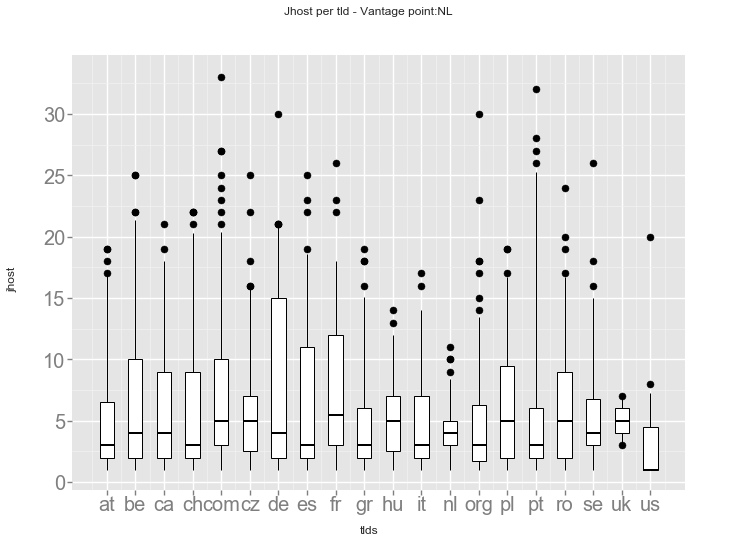

<ggplot: (41246906688)>


KruskalResult(statistic=55.596629974950723, pvalue=1.0317821750328926e-05)

In [161]:
js_NL_boxplot=pd.concat([js_be_NL,js_ca_NL, js_ch_NL,js_org_NL,js_com_NL,js_de_NL,js_es_NL,js_fr_NL,js_it_NL,js_nl_NL,js_pl_NL,js_pt_NL,js_ro_NL,js_uk_NL,js_us_NL,js_at_NL,js_cz_NL,js_gr_NL,js_hu_NL,js_se_NL])
js_nl=js_NL_boxplot.groupby('tld').median()
print(js_nl)
js_NL_boxplot2= pd.DataFrame(data=js_NL_boxplot)
print(ggplot(js_NL_boxplot2,aes(x='js_NL_boxplot2.tld',y='js_NL_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:NL"))

scipy.stats.kruskal(js_be_NL.jhost,js_ca_NL.jhost, js_ch_NL.jhost,js_org_NL.jhost,js_com_NL.jhost,js_de_NL.jhost,js_es_NL.jhost,js_fr_NL.jhost,js_it_NL.jhost,js_nl_NL.jhost,js_pl_NL.jhost,js_pt_NL.jhost,js_ro_NL.jhost,js_uk_NL.jhost,js_us_NL.jhost,js_at_NL.jhost,js_cz_NL.jhost,js_gr_NL.jhost,js_se_NL.jhost)


     jhost
tld       
at     3.5
be     5.0
ca     4.0
ch     3.5
com    6.0
cz     5.0
de     4.0
es     3.0
fr     5.0
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     3.5
ro     5.0
se     4.0
uk     5.0
us     1.0


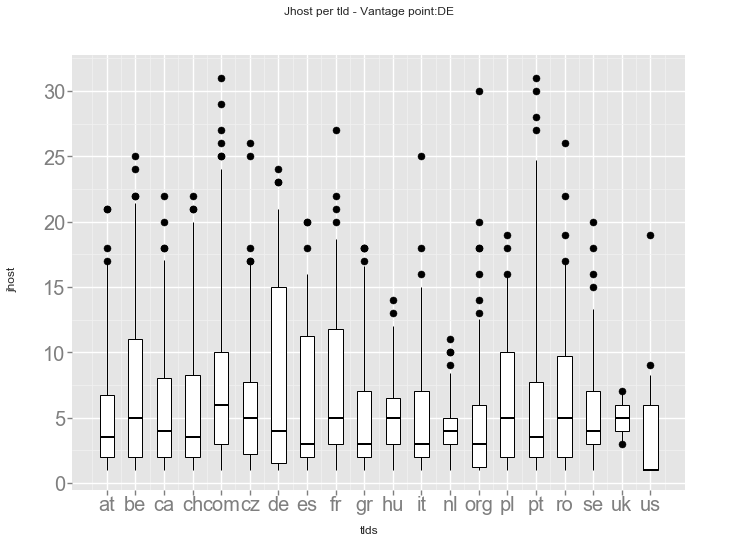

<ggplot: (41259559814)>


KruskalResult(statistic=53.301055910955405, pvalue=4.2155897433575545e-05)

In [162]:
js_DE_boxplot=pd.concat([js_be_DE,js_ca_DE, js_ch_DE,js_org_DE,js_com_DE,js_de_DE,js_es_DE,js_fr_DE,js_it_DE,js_nl_DE,js_pl_DE,js_pt_DE,js_ro_DE,js_uk_DE,js_us_DE,js_at_DE,js_cz_DE,js_gr_DE,js_hu_DE,js_se_DE])
js_de=js_DE_boxplot.groupby('tld').median()
print(js_de)
js_DE_boxplot2= pd.DataFrame(data=js_DE_boxplot)
print(ggplot(js_DE_boxplot2,aes(x='js_DE_boxplot2.tld',y='js_DE_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:DE"))

scipy.stats.kruskal(js_be_DE.jhost,js_ca_DE.jhost, js_ch_DE.jhost,js_org_DE.jhost,js_com_DE.jhost,js_de_DE.jhost,js_es_DE.jhost,js_fr_DE.jhost,js_it_DE.jhost,js_nl_DE.jhost,js_pl_DE.jhost,js_pt_DE.jhost,js_ro_DE.jhost,js_uk_DE.jhost,js_us_DE.jhost,js_at_DE.jhost,js_cz_DE.jhost,js_gr_DE.jhost,js_hu_DE.jhost,js_se_DE.jhost)


     jhost
tld       
at     3.5
be     4.0
ca     4.0
ch     3.0
com    5.0
cz     5.0
de     4.0
es     3.0
fr     6.0
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     6.5
pt     3.0
ro     4.5
se     4.0
uk     5.0
us     1.0


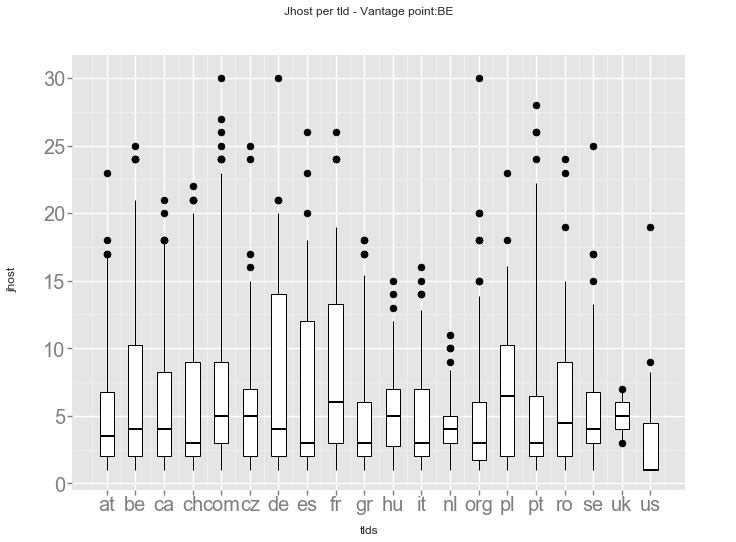

<ggplot: (-9223371995607848907)>


KruskalResult(statistic=62.690304172365657, pvalue=1.4416739406398515e-06)

In [163]:
js_BE_boxplot=pd.concat([js_be_BE,js_ca_BE, js_ch_BE,js_org_BE,js_com_BE,js_de_BE,js_es_BE,js_fr_BE,js_it_BE,js_nl_BE,js_pl_BE,js_pt_BE,js_ro_BE,js_uk_BE,js_us_BE,js_at_BE,js_cz_BE,js_gr_BE,js_hu_BE,js_se_BE])
js_be=js_BE_boxplot.groupby('tld').median()
print(js_be)
js_BE_boxplot2= pd.DataFrame(data=js_BE_boxplot)
print(ggplot(js_BE_boxplot2,aes(x='js_BE_boxplot2.tld',y='js_BE_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:BE"))

scipy.stats.kruskal(js_be_BE.jhost,js_ca_BE.jhost, js_ch_BE.jhost,js_org_BE.jhost,js_com_BE.jhost,js_de_BE.jhost,js_es_BE.jhost,js_fr_BE.jhost,js_it_BE.jhost,js_nl_BE.jhost,js_pl_BE.jhost,js_pt_BE.jhost,js_ro_BE.jhost,js_uk_BE.jhost,js_us_BE.jhost,js_at_BE.jhost,js_cz_BE.jhost,js_gr_BE.jhost,js_hu_BE.jhost,js_se_BE.jhost)


     jhost
tld       
at     3.0
be     4.0
ca     4.0
ch     3.5
com    7.0
cz     5.0
de     4.0
es     3.0
fr     6.0
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     6.0
pt     3.0
ro     5.0
se     4.0
uk     5.0
us     1.0


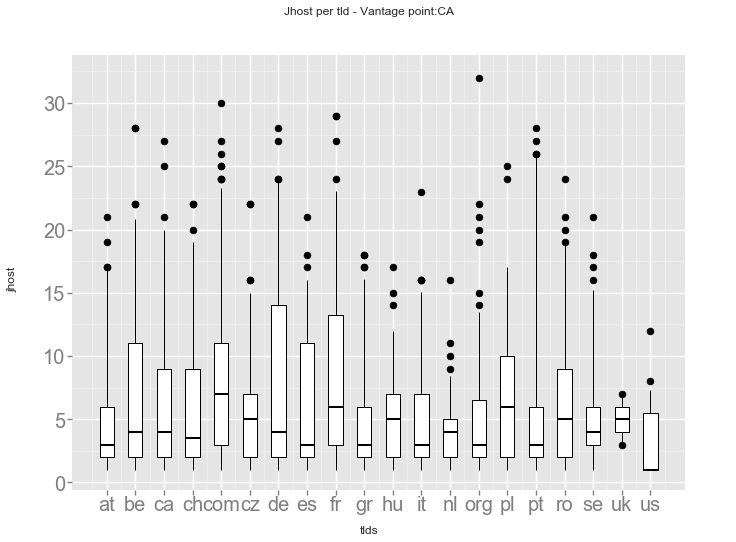

<ggplot: (-9223371995596799607)>


KruskalResult(statistic=74.691476559028359, pvalue=1.5013332087228727e-08)

In [164]:
js_CA_boxplot=pd.concat([js_be_CA,js_ca_CA, js_ch_CA,js_org_CA,js_com_CA,js_de_CA,js_es_CA,js_fr_CA,js_it_CA,js_nl_CA,js_pl_CA,js_pt_CA,js_ro_CA,js_uk_CA,js_us_CA,js_at_CA,js_cz_CA,js_gr_CA,js_hu_CA,js_se_CA])
js_ca=js_CA_boxplot.groupby('tld').median()
print(js_ca)
js_CA_boxplot2= pd.DataFrame(data=js_CA_boxplot)
print(ggplot(js_CA_boxplot2,aes(x='js_CA_boxplot2.tld',y='js_CA_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:CA"))

scipy.stats.kruskal(js_be_CA.jhost,js_ca_CA.jhost, js_ch_CA.jhost,js_org_CA.jhost,js_com_CA.jhost,js_de_CA.jhost,js_es_CA.jhost,js_fr_CA.jhost,js_it_CA.jhost,js_nl_CA.jhost,js_pl_CA.jhost,js_pt_CA.jhost,js_ro_CA.jhost,js_uk_CA.jhost,js_us_CA.jhost,js_at_CA.jhost,js_cz_CA.jhost,js_gr_CA.jhost,js_hu_CA.jhost,js_se_CA.jhost)


     jhost
tld       
at     4.0
be     4.5
ca     4.0
ch     3.5
com    6.0
cz     5.0
de     4.0
es     3.0
fr     5.5
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     4.0
ro     5.0
se     4.0
uk     5.0
us     1.0


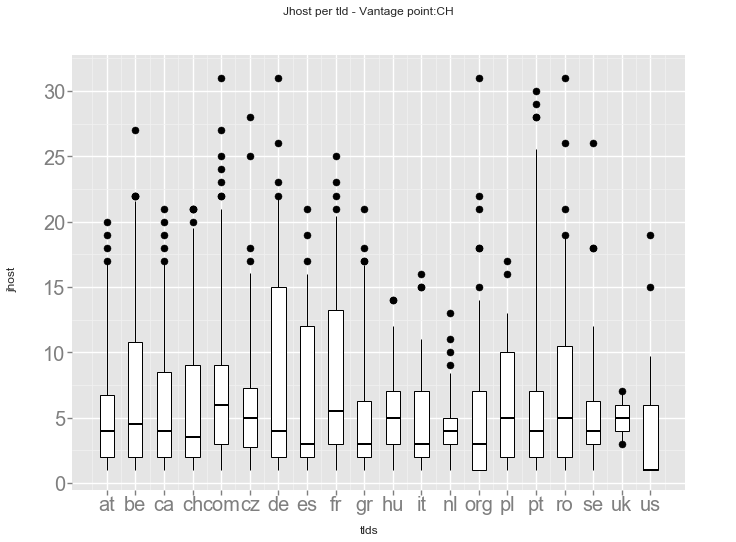

<ggplot: (41242595406)>


KruskalResult(statistic=51.493908417659135, pvalue=7.8740780089704891e-05)

In [165]:
js_CH_boxplot=pd.concat([js_be_CH,js_ca_CH, js_ch_CH,js_org_CH,js_com_CH,js_de_CH,js_es_CH,js_fr_CH,js_it_CH,js_nl_CH,js_pl_CH,js_pt_CH,js_ro_CH,js_uk_CH,js_us_CH,js_at_CH,js_cz_CH,js_gr_CH,js_hu_CH,js_se_CH])
js_ch=js_CH_boxplot.groupby('tld').median()
print(js_ch)
js_CH_boxplot2= pd.DataFrame(data=js_CH_boxplot)
print(ggplot(js_CH_boxplot2,aes(x='js_CH_boxplot2.tld',y='js_CH_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:CH"))

scipy.stats.kruskal(js_be_CH.jhost,js_ca_CH.jhost, js_ch_CH.jhost,js_org_CH.jhost,js_com_CH.jhost,js_de_CH.jhost,js_es_CH.jhost,js_fr_CH.jhost,js_it_CH.jhost,js_nl_CH.jhost,js_pl_CH.jhost,js_pt_CH.jhost,js_ro_CH.jhost,js_uk_CH.jhost,js_us_CH.jhost,js_at_CH.jhost,js_cz_CH.jhost,js_gr_CH.jhost,js_hu_CH.jhost,js_se_CH.jhost)


     jhost
tld       
at     3.5
be     4.0
ca     4.0
ch     3.0
com    5.0
cz     5.0
de     4.0
es     3.0
fr     6.0
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     6.5
pt     3.0
ro     4.5
se     4.0
uk     5.0
us     1.0


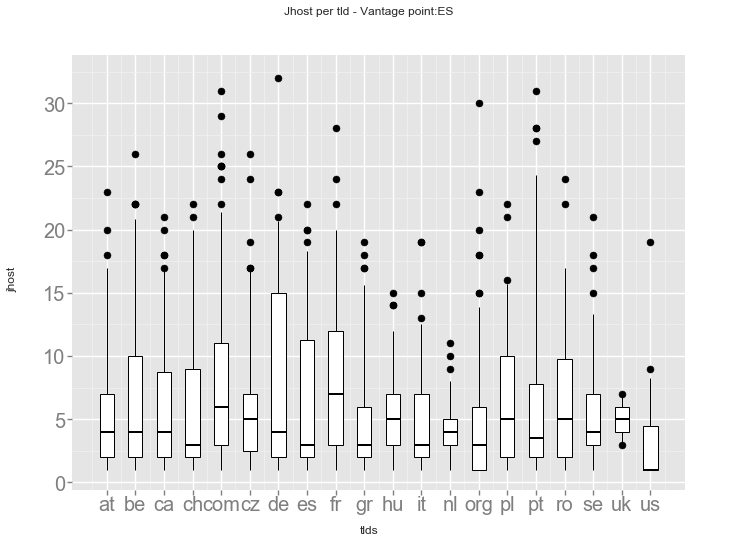

<ggplot: (-9223371995614946111)>


KruskalResult(statistic=62.757930075859349, pvalue=1.4060656852766368e-06)

In [166]:
js_ES_boxplot=pd.concat([js_be_ES,js_ca_ES, js_ch_ES,js_org_ES,js_com_ES,js_de_ES,js_es_ES,js_fr_ES,js_it_ES,js_nl_ES,js_pl_ES,js_pt_ES,js_ro_ES,js_uk_ES,js_us_ES,js_at_ES,js_cz_ES,js_gr_ES,js_hu_ES,js_se_ES])
js_es=js_BE_boxplot.groupby('tld').median()
print(js_es)
js_ES_boxplot2= pd.DataFrame(data=js_ES_boxplot)
print(ggplot(js_ES_boxplot2,aes(x='js_ES_boxplot2.tld',y='js_ES_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:ES"))

scipy.stats.kruskal(js_be_ES.jhost,js_ca_ES.jhost, js_ch_ES.jhost,js_org_ES.jhost,js_com_ES.jhost,js_de_ES.jhost,js_es_ES.jhost,js_fr_ES.jhost,js_it_ES.jhost,js_nl_ES.jhost,js_pl_ES.jhost,js_pt_ES.jhost,js_ro_ES.jhost,js_uk_ES.jhost,js_us_ES.jhost,js_at_ES.jhost,js_cz_ES.jhost,js_gr_ES.jhost,js_hu_ES.jhost,js_se_ES.jhost)


     jhost
tld       
at     3.5
be     4.0
ca     4.0
ch     3.0
com    6.0
cz     5.0
de     4.0
es     3.0
fr     6.0
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     3.5
ro     5.0
se     4.0
uk     5.0
us     1.0


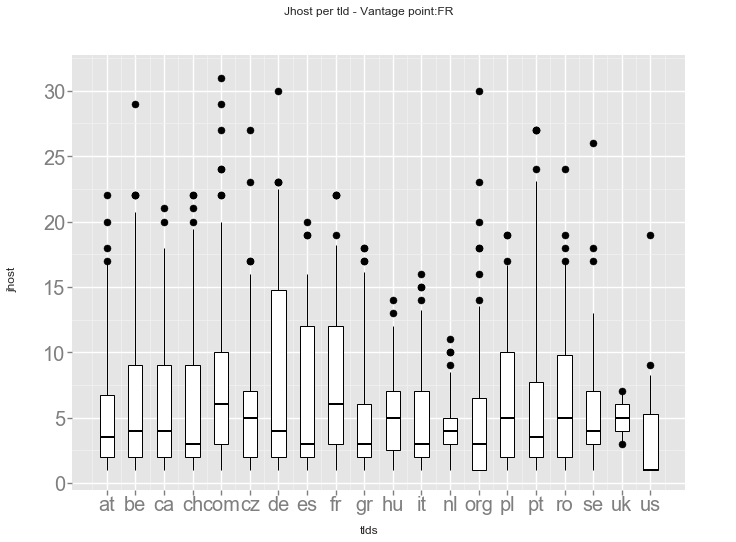

<ggplot: (-9223371995612641101)>


KruskalResult(statistic=57.62439896470886, pvalue=9.1362101209923035e-06)

In [167]:
js_FR_boxplot=pd.concat([js_be_FR,js_ca_FR, js_ch_FR,js_org_FR,js_com_FR,js_de_FR,js_es_FR,js_fr_FR,js_it_FR,js_nl_FR,js_pl_FR,js_pt_FR,js_ro_FR,js_uk_FR,js_us_FR,js_at_FR,js_cz_FR,js_gr_FR,js_hu_FR,js_se_FR])
js_fr=js_FR_boxplot.groupby('tld').median()
print(js_fr)
js_FR_boxplot2= pd.DataFrame(data=js_FR_boxplot)
print(ggplot(js_FR_boxplot2,aes(x='js_FR_boxplot2.tld',y='js_FR_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:FR"))

scipy.stats.kruskal(js_be_FR.jhost,js_ca_FR.jhost, js_ch_FR.jhost,js_org_FR.jhost,js_com_FR.jhost,js_de_FR.jhost,js_es_FR.jhost,js_fr_FR.jhost,js_it_FR.jhost,js_nl_FR.jhost,js_pl_FR.jhost,js_pt_FR.jhost,js_ro_FR.jhost,js_uk_FR.jhost,js_us_FR.jhost,js_at_FR.jhost,js_cz_FR.jhost,js_gr_FR.jhost,js_hu_FR.jhost,js_se_FR.jhost)


     jhost
tld       
at     4.0
be     4.5
ca     4.0
ch     3.0
com    6.0
cz     5.0
de     5.0
es     3.0
fr     7.0
gr     3.0
hu     5.0
it     4.0
nl     4.0
org    3.0
pl     5.0
pt     4.0
ro     5.0
se     4.0
uk     5.0
us     1.0


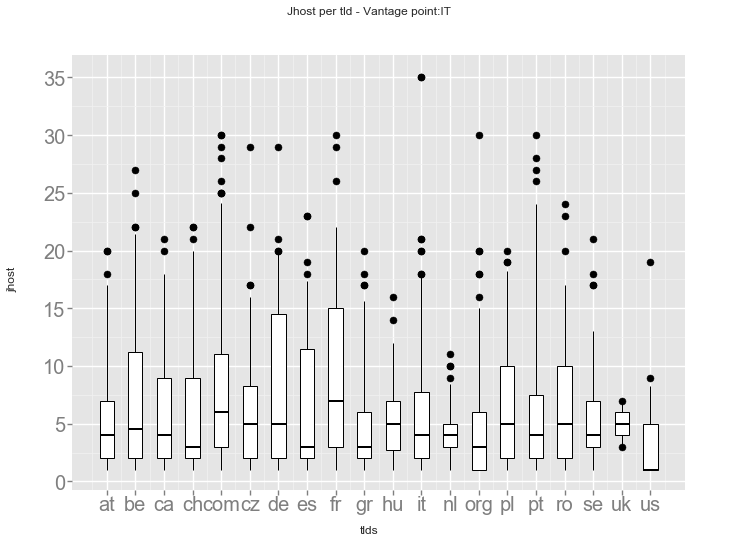

<ggplot: (-9223371995594310684)>


KruskalResult(statistic=66.35712893439306, pvalue=7.0812430068261623e-07)

In [168]:
js_IT_boxplot=pd.concat([js_be_IT,js_ca_IT, js_ch_IT,js_org_IT,js_com_IT,js_de_IT,js_es_IT,js_fr_IT,js_it_IT,js_it_IT,js_nl_IT,js_pl_IT,js_pt_IT,js_ro_IT,js_uk_IT,js_us_IT,js_at_IT,js_cz_IT,js_gr_IT,js_hu_IT,js_se_IT])
js_it=js_IT_boxplot.groupby('tld').median()
print(js_it)
js_IT_boxplot2= pd.DataFrame(data=js_IT_boxplot)
print(ggplot(js_IT_boxplot2,aes(x='js_IT_boxplot2.tld',y='js_IT_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:IT"))

scipy.stats.kruskal(js_be_IT.jhost,js_ca_IT.jhost, js_ch_IT.jhost,js_org_IT.jhost,js_com_IT.jhost,js_de_IT.jhost,js_es_IT.jhost,js_fr_IT.jhost,js_it_IT.jhost,js_it_IT.jhost,js_nl_IT.jhost,js_pl_IT.jhost,js_pt_IT.jhost,js_ro_IT.jhost,js_uk_IT.jhost,js_us_IT.jhost,js_at_IT.jhost,js_cz_IT.jhost,js_gr_IT.jhost,js_hu_IT.jhost,js_se_IT.jhost)


     jhost
tld       
at     4.0
be     4.5
ca     4.0
ch     3.0
com    5.0
cz     5.0
de     4.0
es     3.0
fr     5.5
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     3.0
ro     4.5
se     4.0
uk     5.0
us     1.0


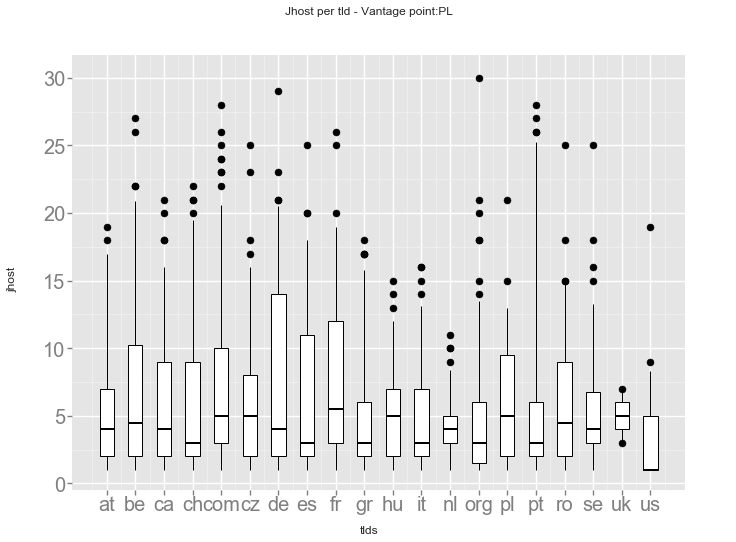

<ggplot: (-9223371995615165054)>


KruskalResult(statistic=55.896438456257968, pvalue=1.6927664751924285e-05)

In [169]:
js_PL_boxplot=pd.concat([js_be_PL,js_ca_PL, js_ch_PL,js_org_PL,js_com_PL,js_de_PL,js_es_PL,js_fr_PL,js_it_PL,js_nl_PL,js_pl_PL,js_pt_PL,js_ro_PL,js_uk_PL,js_us_PL,js_at_PL,js_cz_PL,js_gr_PL,js_hu_PL,js_se_PL])
js_pl=js_PL_boxplot.groupby('tld').median()
print(js_pl)
js_PL_boxplot2= pd.DataFrame(data=js_PL_boxplot)
print(ggplot(js_PL_boxplot2,aes(x='js_PL_boxplot2.tld',y='js_PL_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:PL"))

scipy.stats.kruskal(js_be_PL.jhost,js_ca_PL.jhost, js_ch_PL.jhost,js_org_PL.jhost,js_com_PL.jhost,js_de_PL.jhost,js_es_PL.jhost,js_fr_PL.jhost,js_it_PL.jhost,js_nl_PL.jhost,js_pl_PL.jhost,js_pt_PL.jhost,js_ro_PL.jhost,js_uk_PL.jhost,js_us_PL.jhost,js_at_PL.jhost,js_cz_PL.jhost,js_gr_PL.jhost,js_hu_PL.jhost,js_se_PL.jhost)


     jhost
tld       
at     4.0
be     4.5
ca     4.0
ch     3.0
com    5.0
cz     5.0
de     4.0
es     3.0
fr     5.5
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     3.0
ro     4.5
se     4.0
uk     5.0
us     1.0


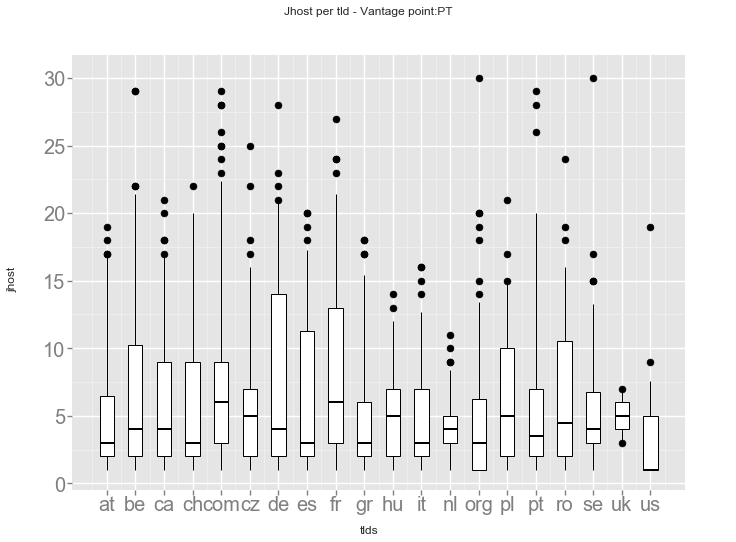

<ggplot: (-9223371995607815350)>


KruskalResult(statistic=60.940109657531224, pvalue=2.7452343874808757e-06)

In [170]:
js_PT_boxplot=pd.concat([js_be_PT,js_ca_PT, js_ch_PT,js_org_PT,js_com_PT,js_de_PT,js_es_PT,js_fr_PT,js_it_PT,js_nl_PT,js_pl_PT,js_pt_PT,js_ro_PT,js_uk_PT,js_us_PT,js_at_PT,js_cz_PT,js_gr_PT,js_hu_PT,js_se_PT])
js_pt=js_PL_boxplot.groupby('tld').median()
print(js_pt)
js_PT_boxplot2= pd.DataFrame(data=js_PT_boxplot)
print(ggplot(js_PT_boxplot2,aes(x='js_PT_boxplot2.tld',y='js_PT_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:PT"))

scipy.stats.kruskal(js_be_PT.jhost,js_ca_PT.jhost, js_ch_PT.jhost,js_org_PT.jhost,js_com_PT.jhost,js_de_PT.jhost,js_es_PT.jhost,js_fr_PT.jhost,js_it_PT.jhost,js_nl_PT.jhost,js_pl_PT.jhost,js_pt_PT.jhost,js_ro_PT.jhost,js_uk_PT.jhost,js_us_PT.jhost,js_at_PT.jhost,js_cz_PT.jhost,js_gr_PT.jhost,js_hu_PT.jhost,js_se_PT.jhost)


     jhost
tld       
at       3
be       4
ca       4
ch       3
com      5
cz       5
de       4
es       3
fr       5
gr       3
hu       5
it       3
nl       4
org      3
pl       5
pt       3
ro       5
se       4
uk       5
us       1


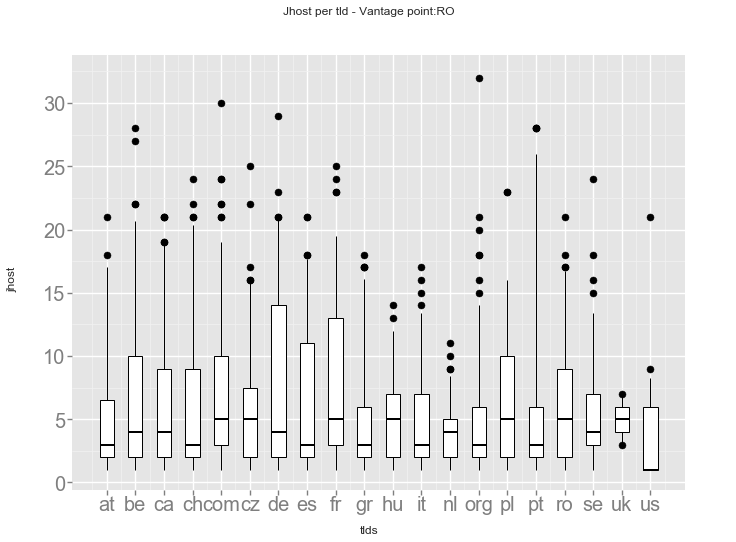

<ggplot: (41244856840)>


KruskalResult(statistic=54.952422373397447, pvalue=2.3636868397983217e-05)

In [171]:
js_RO_boxplot=pd.concat([js_be_RO,js_ca_RO, js_ch_RO,js_org_RO,js_com_RO,js_de_RO,js_es_RO,js_fr_RO,js_it_RO,js_nl_RO,js_pl_RO,js_pt_RO,js_ro_RO,js_uk_RO,js_us_RO,js_at_RO,js_cz_RO,js_gr_RO,js_hu_RO,js_se_RO])
js_ro=js_RO_boxplot.groupby('tld').median()
print(js_ro)
js_RO_boxplot2= pd.DataFrame(data=js_RO_boxplot)
print(ggplot(js_RO_boxplot2,aes(x='js_RO_boxplot2.tld',y='js_RO_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:RO"))

scipy.stats.kruskal(js_be_RO.jhost,js_ca_RO.jhost, js_ch_RO.jhost,js_org_RO.jhost,js_com_RO.jhost,js_de_RO.jhost,js_es_RO.jhost,js_fr_RO.jhost,js_it_RO.jhost,js_nl_RO.jhost,js_pl_RO.jhost,js_pt_RO.jhost,js_ro_RO.jhost,js_uk_RO.jhost,js_us_RO.jhost,js_at_RO.jhost,js_cz_RO.jhost,js_gr_RO.jhost,js_hu_RO.jhost,js_se_RO.jhost)


     jhost
tld       
at     3.5
be     4.0
ca     4.0
ch     3.5
com    6.0
cz     5.0
de     4.5
es     3.0
fr     5.0
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     3.0
ro     5.0
se     4.0
uk     5.0
us     1.0


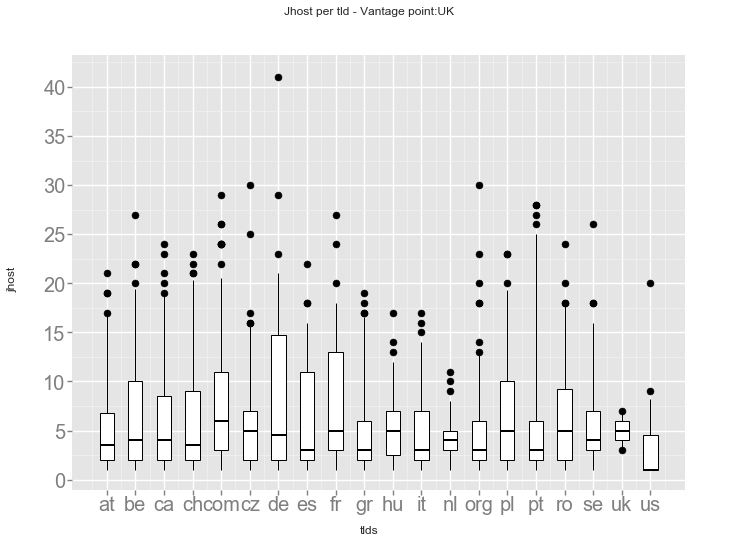

<ggplot: (41249090410)>


KruskalResult(statistic=59.423313997053185, pvalue=4.7725972245230182e-06)

In [172]:
js_UK_boxplot=pd.concat([js_be_UK,js_ca_UK, js_ch_UK,js_org_UK,js_com_UK,js_de_UK,js_es_UK,js_fr_UK,js_it_UK,js_nl_UK,js_pl_UK,js_pt_UK,js_ro_UK,js_uk_UK,js_us_UK,js_at_UK,js_cz_UK,js_gr_UK,js_hu_UK,js_se_UK])
js_uk=js_UK_boxplot.groupby('tld').median()
print(js_uk)
js_UK_boxplot2= pd.DataFrame(data=js_UK_boxplot)
print(ggplot(js_UK_boxplot2,aes(x='js_UK_boxplot2.tld',y='js_UK_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:UK"))

scipy.stats.kruskal(js_be_UK.jhost,js_ca_UK.jhost, js_ch_UK.jhost,js_org_UK.jhost,js_com_UK.jhost,js_de_UK.jhost,js_es_UK.jhost,js_fr_UK.jhost,js_it_UK.jhost,js_nl_UK.jhost,js_pl_UK.jhost,js_pt_UK.jhost,js_ro_UK.jhost,js_uk_UK.jhost,js_us_UK.jhost,js_at_UK.jhost,js_cz_UK.jhost,js_gr_UK.jhost,js_hu_UK.jhost,js_se_UK.jhost)


     jhost
tld       
at     3.5
be     4.0
ca     4.0
ch     4.0
com    5.5
cz     5.0
de     3.5
es     3.0
fr     7.0
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     3.0
ro     5.0
se     4.0
uk     5.0
us     1.0


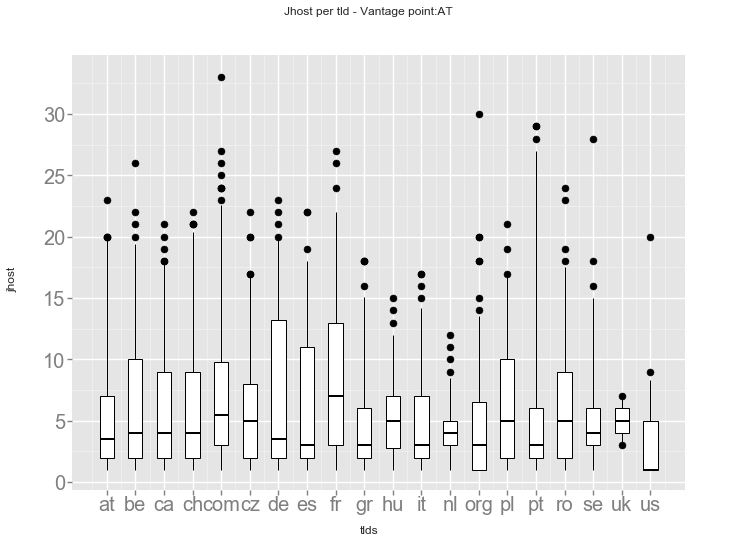

<ggplot: (-9223371995609934844)>


KruskalResult(statistic=58.506214173306653, pvalue=6.6515149847397688e-06)

In [173]:
js_AT_boxplot=pd.concat([js_be_AT,js_ca_AT, js_ch_AT,js_org_AT,js_com_AT,js_de_AT,js_es_AT,js_fr_AT,js_it_AT,js_nl_AT,js_pl_AT,js_pt_AT,js_ro_AT,js_uk_AT,js_us_AT,js_at_AT,js_cz_AT,js_gr_AT,js_hu_AT,js_se_AT])
js_at=js_AT_boxplot.groupby('tld').median()
print(js_at)
js_AT_boxplot2= pd.DataFrame(data=js_AT_boxplot)
print(ggplot(js_AT_boxplot2,aes(x='js_AT_boxplot2.tld',y='js_AT_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:AT"))

scipy.stats.kruskal(js_be_AT.jhost,js_ca_AT.jhost, js_ch_AT.jhost,js_org_AT.jhost,js_com_AT.jhost,js_de_AT.jhost,js_es_AT.jhost,js_fr_AT.jhost,js_it_AT.jhost,js_nl_AT.jhost,js_pl_AT.jhost,js_pt_AT.jhost,js_ro_AT.jhost,js_uk_AT.jhost,js_us_AT.jhost,js_at_AT.jhost,js_cz_AT.jhost,js_gr_AT.jhost,js_hu_AT.jhost,js_se_AT.jhost)


     jhost
tld       
at     3.5
be     4.0
ca     4.0
ch     3.0
com    6.0
cz     5.0
de     4.0
es     3.0
fr     5.0
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     3.0
ro     5.0
se     4.0
uk     5.0
us     1.0


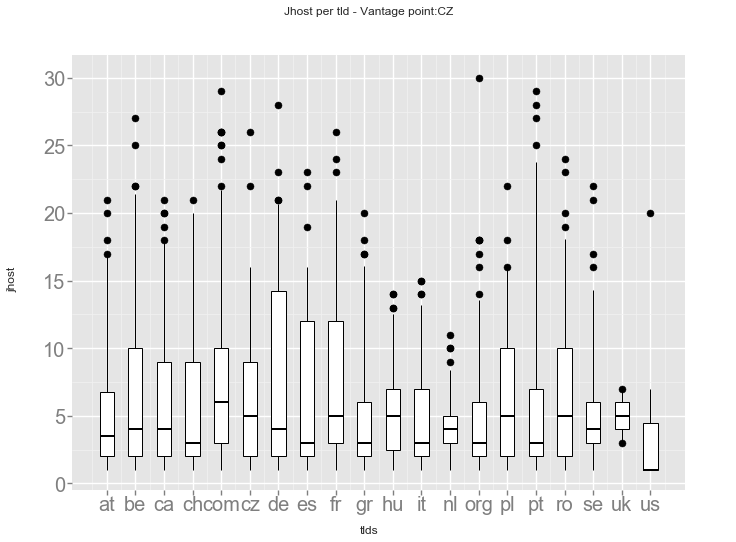

<ggplot: (41257715881)>


KruskalResult(statistic=63.356580182440609, pvalue=1.1263834616866599e-06)

In [174]:
js_CZ_boxplot=pd.concat([js_be_CZ,js_ca_CZ, js_ch_CZ,js_org_CZ,js_com_CZ,js_de_CZ,js_es_CZ,js_fr_CZ,js_it_CZ,js_nl_CZ,js_pl_CZ,js_pt_CZ,js_ro_CZ,js_uk_CZ,js_us_CZ,js_at_CZ,js_cz_CZ,js_gr_CZ,js_hu_CZ,js_se_CZ])
js_cz=js_CZ_boxplot.groupby('tld').median()
print(js_cz)
js_CZ_boxplot2= pd.DataFrame(data=js_CZ_boxplot)
print(ggplot(js_CZ_boxplot2,aes(x='js_CZ_boxplot2.tld',y='js_CZ_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:CZ"))

scipy.stats.kruskal(js_be_CZ.jhost,js_ca_CZ.jhost, js_ch_CZ.jhost,js_org_CZ.jhost,js_com_CZ.jhost,js_de_CZ.jhost,js_es_CZ.jhost,js_fr_CZ.jhost,js_it_CZ.jhost,js_nl_CZ.jhost,js_pl_CZ.jhost,js_pt_CZ.jhost,js_ro_CZ.jhost,js_uk_CZ.jhost,js_us_CZ.jhost,js_at_CZ.jhost,js_cz_CZ.jhost,js_gr_CZ.jhost,js_hu_CZ.jhost,js_se_CZ.jhost)


     jhost
tld       
at     3.0
be     4.0
ca     4.0
ch     3.0
com    5.0
cz     5.0
de     3.5
es     3.0
fr     5.5
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     3.0
ro     5.0
se     4.0
uk     5.0
us     1.0


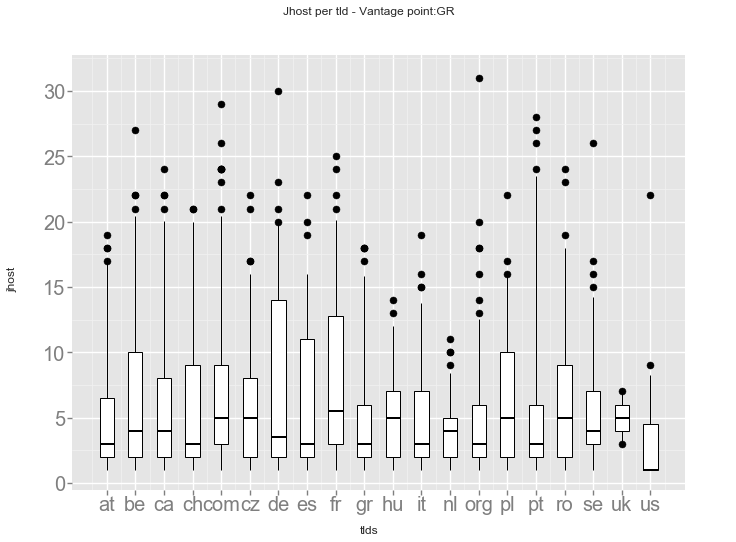

<ggplot: (-9223371995607867332)>


KruskalResult(statistic=61.719140806888305, pvalue=2.0625748553139683e-06)

In [175]:
js_GR_boxplot=pd.concat([js_be_GR,js_ca_GR, js_ch_GR,js_org_GR,js_com_GR,js_de_GR,js_es_GR,js_fr_GR,js_it_GR,js_nl_GR,js_pl_GR,js_pt_GR,js_ro_GR,js_uk_GR,js_us_GR,js_at_GR,js_cz_GR,js_gr_GR,js_hu_GR,js_se_GR])
js_gr=js_GR_boxplot.groupby('tld').median()
print(js_gr)
js_GR_boxplot2= pd.DataFrame(data=js_GR_boxplot)
print(ggplot(js_GR_boxplot2,aes(x='js_GR_boxplot2.tld',y='js_GR_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:GR"))

scipy.stats.kruskal(js_be_GR.jhost,js_ca_GR.jhost, js_ch_GR.jhost,js_org_GR.jhost,js_com_GR.jhost,js_de_GR.jhost,js_es_GR.jhost,js_fr_GR.jhost,js_it_GR.jhost,js_nl_GR.jhost,js_pl_GR.jhost,js_pt_GR.jhost,js_ro_GR.jhost,js_uk_GR.jhost,js_us_GR.jhost,js_at_GR.jhost,js_cz_GR.jhost,js_gr_GR.jhost,js_hu_GR.jhost,js_se_GR.jhost)


     jhost
tld       
at     3.0
be     4.5
ca     4.0
ch     3.0
com    5.0
cz     5.0
de     5.0
es     3.0
fr     5.0
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     5.0
pt     3.0
ro     5.0
se     4.0
uk     5.0
us     1.0


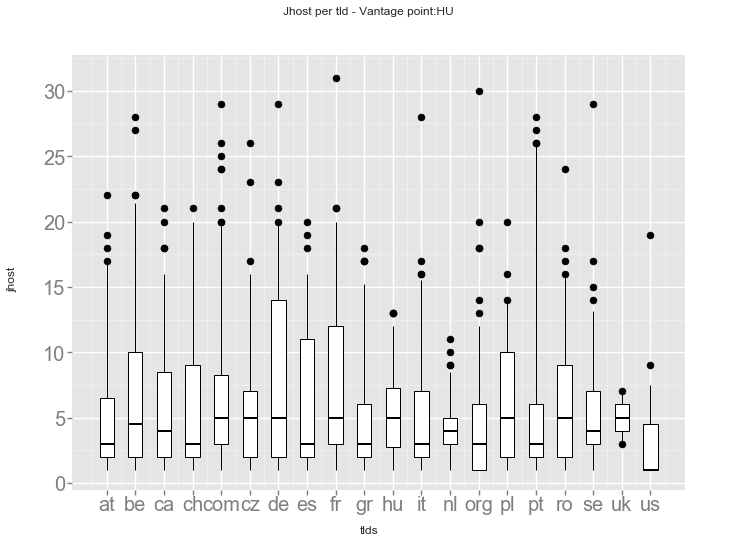

<ggplot: (41242208874)>


KruskalResult(statistic=53.733785822322091, pvalue=3.6250461733500135e-05)

In [176]:
js_HU_boxplot=pd.concat([js_be_HU,js_ca_HU, js_ch_HU,js_org_HU,js_com_HU,js_de_HU,js_es_HU,js_fr_HU,js_it_HU,js_nl_HU,js_pl_HU,js_pt_HU,js_ro_HU,js_uk_HU,js_us_HU,js_at_HU,js_cz_HU,js_gr_HU,js_hu_HU,js_se_HU])
js_hu=js_HU_boxplot.groupby('tld').median()
print(js_hu)
js_HU_boxplot2= pd.DataFrame(data=js_HU_boxplot)
print(ggplot(js_HU_boxplot2,aes(x='js_HU_boxplot2.tld',y='js_HU_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:HU"))

scipy.stats.kruskal(js_be_HU.jhost,js_ca_HU.jhost, js_ch_HU.jhost,js_org_HU.jhost,js_com_HU.jhost,js_de_HU.jhost,js_es_HU.jhost,js_fr_HU.jhost,js_it_HU.jhost,js_nl_HU.jhost,js_pl_HU.jhost,js_pt_HU.jhost,js_ro_HU.jhost,js_uk_HU.jhost,js_us_HU.jhost,js_at_HU.jhost,js_cz_HU.jhost,js_gr_HU.jhost,js_hu_HU.jhost,js_se_HU.jhost)


     jhost
tld       
at     3.0
be     4.0
ca     4.0
ch     3.0
com    5.0
cz     5.0
de     5.0
es     3.0
fr     7.0
gr     3.0
hu     5.0
it     3.0
nl     4.0
org    3.0
pl     4.5
pt     3.0
ro     5.0
se     4.0
uk     5.0
us     1.0


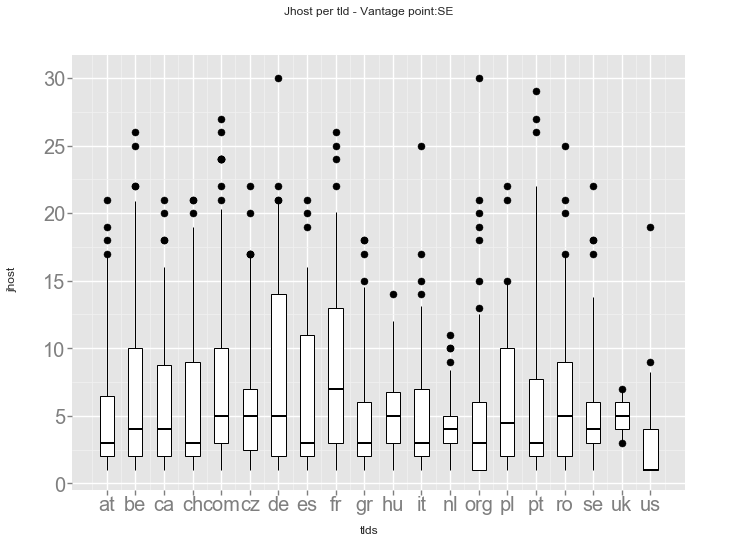

<ggplot: (41242584801)>


KruskalResult(statistic=63.93934655742617, pvalue=9.070538453253743e-07)

In [177]:
js_SE_boxplot=pd.concat([js_be_SE,js_ca_SE, js_ch_SE,js_org_SE,js_com_SE,js_de_SE,js_es_SE,js_fr_SE,js_it_SE,js_nl_SE,js_pl_SE,js_pt_SE,js_ro_SE,js_uk_SE,js_us_SE,js_at_SE,js_cz_SE,js_gr_SE,js_hu_SE,js_se_SE])
js_se=js_SE_boxplot.groupby('tld').median()
print(js_se)
js_SE_boxplot2= pd.DataFrame(data=js_SE_boxplot)
print(ggplot(js_SE_boxplot2,aes(x='js_SE_boxplot2.tld',y='js_SE_boxplot2.jhost'))+geom_boxplot()+labs('tlds', 'jhost')+ggtitle("Jhost per tld - Vantage point:SE"))

scipy.stats.kruskal(js_be_SE.jhost,js_ca_SE.jhost, js_ch_SE.jhost,js_org_SE.jhost,js_com_SE.jhost,js_de_SE.jhost,js_es_SE.jhost,js_fr_SE.jhost,js_it_SE.jhost,js_nl_SE.jhost,js_pl_SE.jhost,js_pt_SE.jhost,js_ro_SE.jhost,js_uk_SE.jhost,js_us_SE.jhost,js_at_SE.jhost,js_cz_SE.jhost,js_gr_SE.jhost,js_hu_SE.jhost,js_se_SE.jhost)


In [210]:
tld_vp_uniquejs_calls_media=pd.concat([js_us,js_nl, js_de,js_be,js_ca,js_ch,js_es,js_fr,js_it,js_pl,js_pt,js_ro,js_uk,js_at,js_cz,js_gr,js_hu,js_se],axis=1)
tld_vp_uniquejs_calls_media.head()
tld_vp_uniquejs_calls_media.to_csv('media_uniquejs_calls_tld.csv', sep=',')

In [178]:
map_domain_company = {"google-analytics.com": "GOOGLE",  
                     # TODO: perhaps separate google-static & not? -- STEVE paper
                    "googleapis.com": "GOOGLE",        
                    "gstatic.com": "GOOGLE",
                    "doubleclick.net": "GOOGLE",
                    "google.com": "GOOGLE",
                    "google.nl": "GOOGLE",
                    "googlesyndication.com": "GOOGLE",
                    "googletagmanager.com": "GOOGLE",
                    "googleadservices.com": "GOOGLE",  # Q: why so many google domains??
                    "youtube.com": "GOOGLE",
                    "google.de": "GOOGLE",
                    "google.cz": "GOOGLE",
                    "google.ch": "GOOGLE",
                    "ytimg.com": "GOOGLE",  # TODO: i could script WHOIS on all of these :)
                    "google.es": "GOOGLE",
                    "google.co.jp": "GOOGLE",
                    "google.it": "GOOGLE",
                    "google.fr": "GOOGLE",
                    "google.pl": "GOOGLE",
                    "googletagservices.com": "GOOGLE",
                     "facebook.com": "FACEBOOK",
                    "facebook.net": "FACEBOOK",
                    "fbcdn.net": "FACEBOOK",                    
                    "instagram.com": "FACEBOOK",
                    "twimg.com": "twitter.com",
                    "dummy file": None,  # for js-urls                    
                    # cloudflare.com, scorecardresearch.com, bidswitch.net...
                    # cloudfront.net=amazon?
                    } 
#---------------------------------------------------
#****I NEED TO USE A DATA FRAME BEFORE I DO THE MATCHING WITH GHOSTERY IF I WANT TO MAP THE DOMAINS#****
#***OR INSTEAD MAP THE NAMES OF THE COMPANIES***

JS_nd['rcompany'] = JS_nd['jhost']
for h, c in map_domain_company.items():
    JS_nd.loc[JS_nd.jhost==h, 'rcompany'] = c
    
print(JS_nd.head())
JS_nd.groupby('rcompany').site_url.nunique().sort_values(ascending=False)[:15]  # has g-analytics, etc

     VP                  jhost  \
742  CH   google-analytics.com   
740  CZ  googlesyndication.com   
739  CZ  googlesyndication.com   
738  CZ  googlesyndication.com   
737  CZ            addthis.com   

                                                js_url site_url     rcompany  
742      https://www.google-analytics.com/analytics.js  121w.at       GOOGLE  
740  https://tpc.googlesyndication.com/pagead/js/r2...  121w.at       GOOGLE  
739  https://tpc.googlesyndication.com/pagead/js/r2...  121w.at       GOOGLE  
738  https://tpc.googlesyndication.com/pagead/js/r2...  121w.at       GOOGLE  
737  https://s7.addthis.com/static/sh.1836a2a6d9443...  121w.at  addthis.com  


rcompany
GOOGLE                   1539
FACEBOOK                  352
2mdn.net                  228
twitter.com               188
scorecardresearch.com     177
adsafeprotected.com       174
cloudfront.net            163
cloudflare.com            154
chartbeat.com             149
newrelic.com              139
hotjar.com                133
moatads.com               131
rubiconproject.com        130
criteo.net                126
demdex.net                125
Name: site_url, dtype: int64